# Model#6
<img src="Model6.png">

## Cell OCV curve

In [0]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from scipy import special
import time
import matplotlib.cm as cm
from sklearn.linear_model import LinearRegression
#import sympy
from scipy.optimize import fsolve
import math


In [0]:
%config InlineBackend.figure_formats = {'png', 'retina'}
pd.set_option("display.max_rows", 10)

In [0]:
new_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
              '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
              '#bcbd22', '#17becf']

In [0]:
def DOD_norm(df, dod_s, dod_e):
    df = df - np.min(df)
    b = (dod_e - dod_s)/np.max(df)
    df = df*b
    df = df + dod_s
    return df

In [0]:
def DOD_norm2(df, x_s, x_e):
    return (df - x_s) * 100/(x_e - x_s)

In [0]:
def re_DOD_norm2(df, x_s, x_e):
    return df*(x_e - x_s)/100 +  x_s

In [0]:
def dQdV(df_x, df_y, delta):
    dQ = abs(np.roll(df_x, delta) - np.roll(df_x, -delta))
    dV = abs(np.roll(df_y, delta) - np.roll(df_y, -delta))
    dQ = np.where(dQ <=0, np.nan, dQ)
    df_dQdV = dV/dQ
    df_dQdV[:delta] = np.nan
    df_dQdV[-delta:] = np.nan
    return df_dQdV

In [0]:
def smooth(df, delta):
    df_tmp = np.zeros((2*delta, len(df)))
    for i in range(delta):
        df_tmp[(i-1),:] = np.roll(df, i)
        df_tmp[(i-1+delta),:] = np.roll(df, -i)
    df_tmp2 = np.median(df_tmp, axis=0)
    df_tmp2[:delta] = np.nan
    df_tmp2[-delta:] = np.nan
    
    return df_tmp2

# OCV curve

In [0]:
df_LCO_OCV = pd.read_csv('LCO_OCV1.csv')
df_LCO_OCV.columns = ['x', 'Potential(V)']
df_LCO_OCV = df_LCO_OCV.sort_values(by=['x'], ascending=False)
df_LCO_OCV = df_LCO_OCV.reset_index(drop=True)
df_LCO_OCV['x'] = 1-df_LCO_OCV['x']

df_LCO_OCV['x'] = smooth(df_LCO_OCV['x'],20)
df_LCO_OCV['Potential(V)'] = smooth(df_LCO_OCV['Potential(V)'], 20)
df_LCO_OCV = df_LCO_OCV.dropna()
df_LCO_OCV = df_LCO_OCV.sort_values(by=['x'], ascending=True)

In [0]:
df_LiC6_OCV = pd.read_csv('LiC6_OCV1.csv')
df_LiC6_OCV.columns = ['x', 'Potential(V)']
df_LiC6_OCV = df_LiC6_OCV.sort_values(by=['x'], ascending=False)
df_LiC6_OCV = df_LiC6_OCV.reset_index(drop=True)
df_LiC6_OCV['x'] = 1-df_LiC6_OCV['x']
df_LiC6_OCV['x'] = smooth(df_LiC6_OCV['x'],10)
df_LiC6_OCV['Potential(V)'] = smooth(df_LiC6_OCV['Potential(V)'], 10)
df_LiC6_OCV = df_LiC6_OCV.dropna()
df_LiC6_OCV = df_LiC6_OCV.sort_values(by=['x'], ascending=True)

In [0]:
x_p_s = 0.2
x_p_e = 0.99
x_n_s = 0.17
x_n_e = 0.94

df_LCO_OCV['DOD']  = DOD_norm2(df_LCO_OCV['x'], x_p_s, x_p_e)
df_LiC6_OCV['DOD']  = DOD_norm2(df_LiC6_OCV['x'], x_n_s, x_n_e)

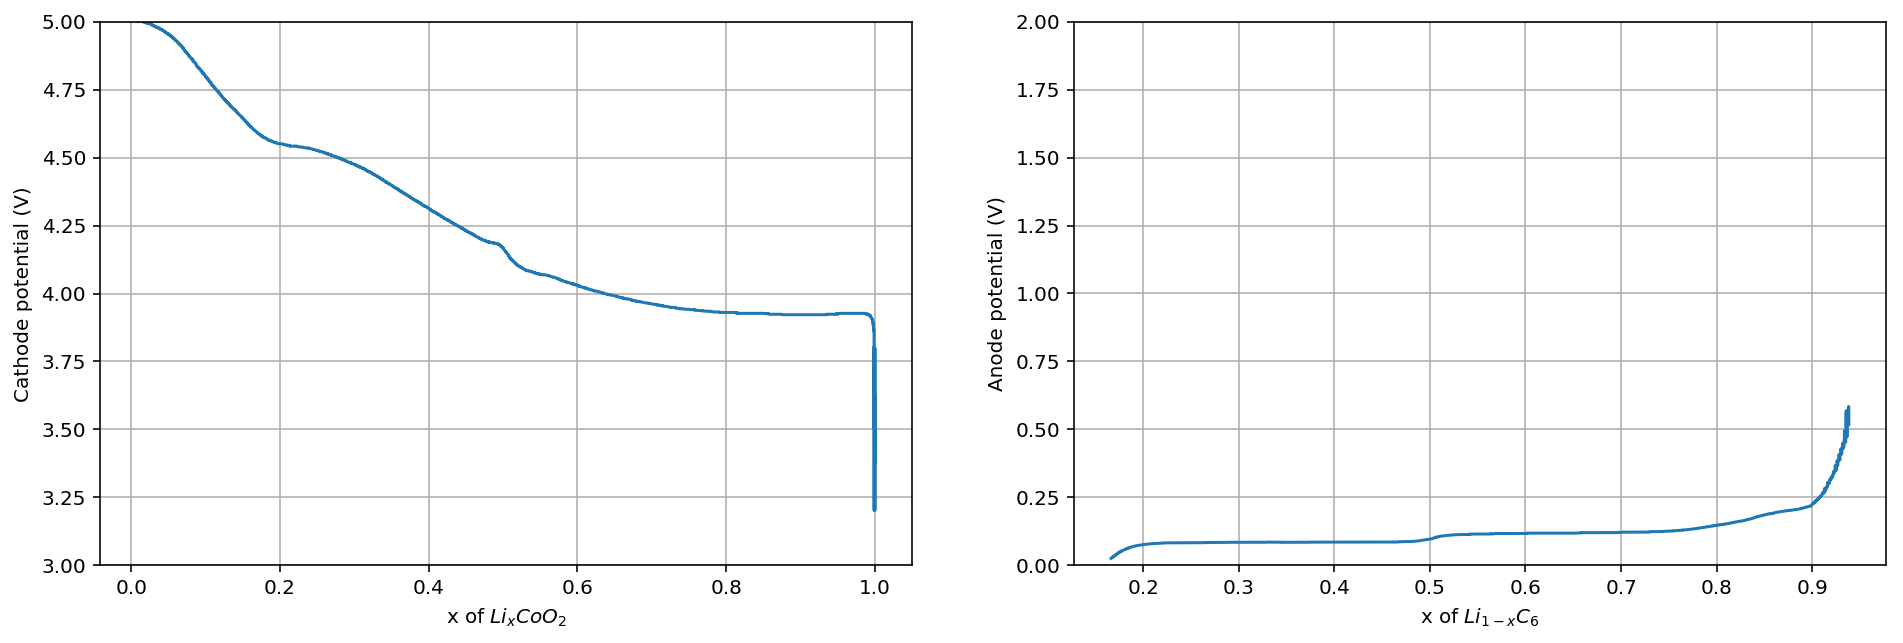

In [12]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16, 5))

ax1.plot(df_LCO_OCV['x'], df_LCO_OCV['Potential(V)'])
ax1.set_ylim([3, 5])
ax1.set_ylabel('Cathode potential (V)')
ax1.set_xlabel('x of $Li_{x}CoO_2$')
ax1.grid()

ax2.plot(df_LiC6_OCV['x'], df_LiC6_OCV['Potential(V)'])
ax2.set_ylim([0, 2])
ax2.set_ylabel('Anode potential (V)')
ax2.set_xlabel('x of $Li_{1-x}C_6$')
ax2.grid()
plt.show()

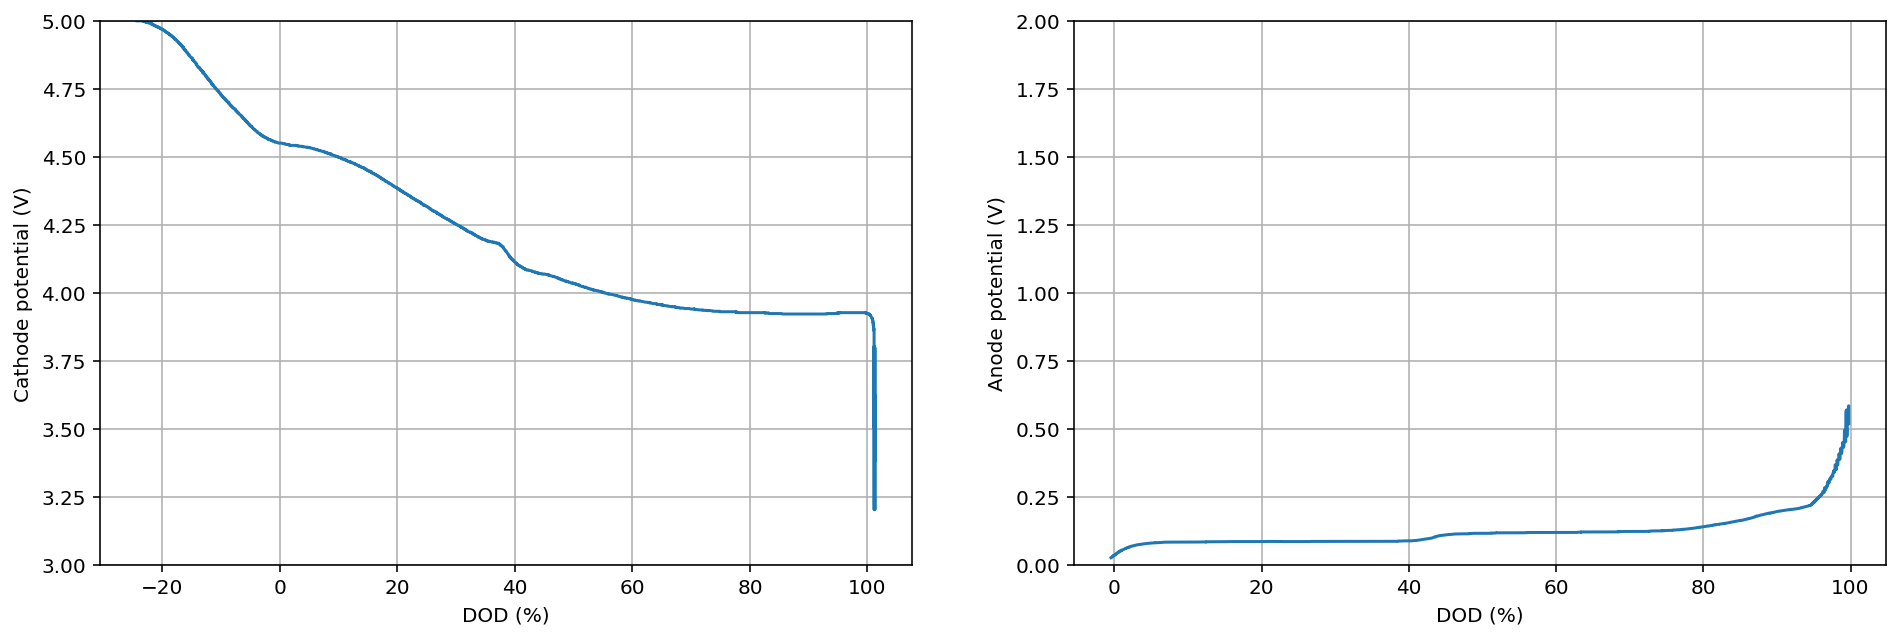

In [13]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16, 5))

ax1.plot(df_LCO_OCV['DOD'], df_LCO_OCV['Potential(V)'])
ax1.set_ylim([3, 5])
ax1.set_ylabel('Cathode potential (V)')
ax1.set_xlabel('DOD (%)')
ax1.grid()

ax2.plot(df_LiC6_OCV['DOD'], df_LiC6_OCV['Potential(V)'])
ax2.set_ylim([0, 2])
ax2.set_ylabel('Anode potential (V)')
ax2.set_xlabel('DOD (%)')
ax2.grid()
plt.show()

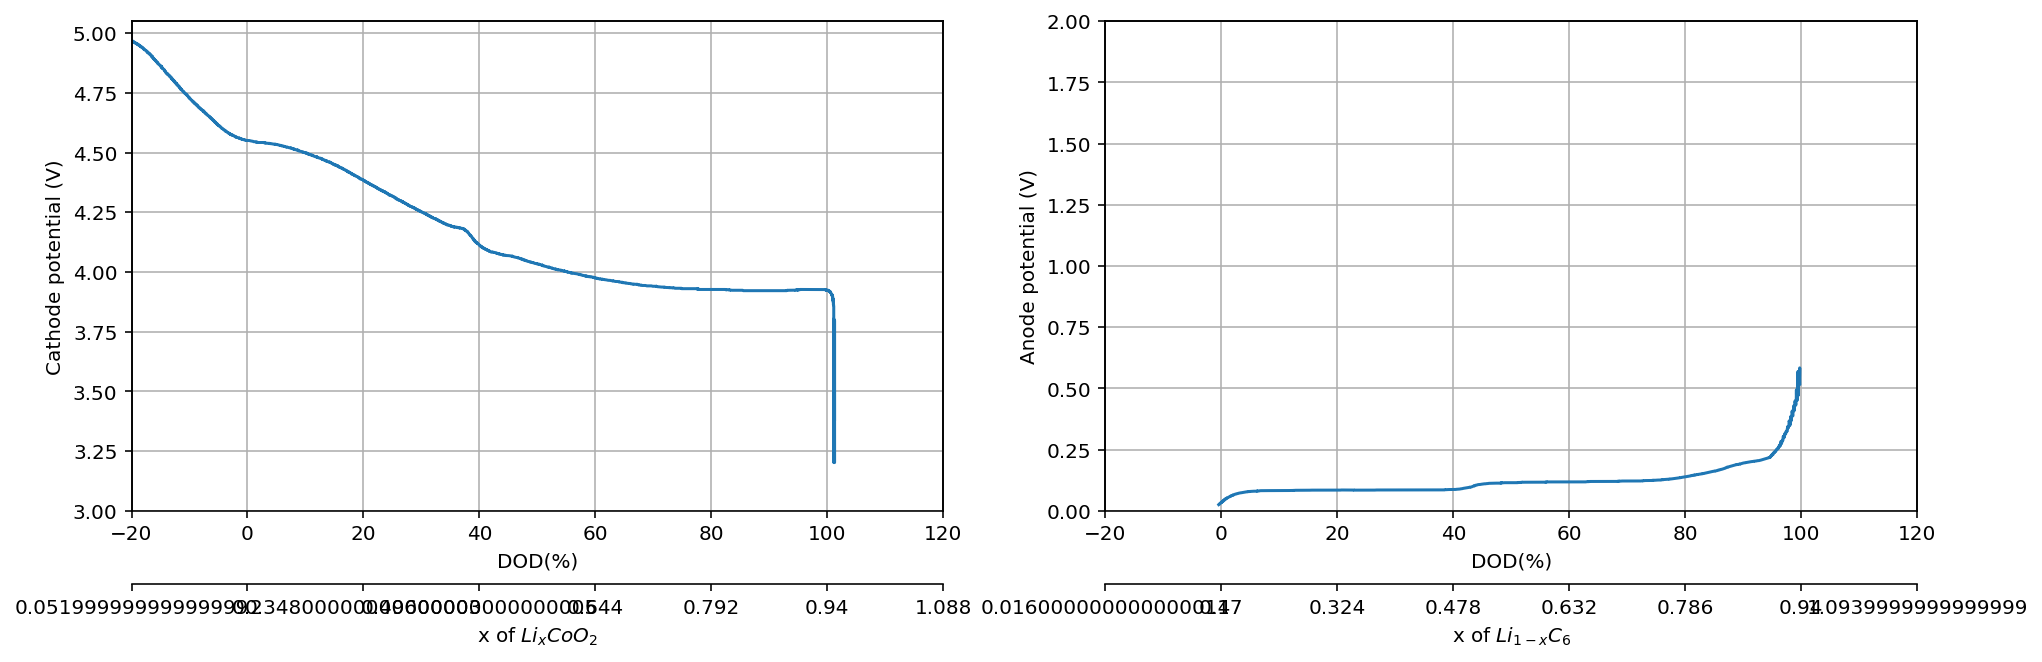

In [14]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16, 5))

fig.subplots_adjust(bottom=0.2)
ax1.plot(df_LCO_OCV['DOD'], df_LCO_OCV['Potential(V)'])
ax1.set_ylim([3, 5.05])
ax1.set_xlim([-20,120])
ax1.set_ylabel('Cathode potential (V)')
ax1.set_xlabel('DOD(%)')
ax1.grid()

ax3 = ax1.twiny()
ax3.xaxis.set_ticks_position("bottom")
ax3.xaxis.set_label_position("bottom")
ax3.spines["bottom"].set_position(("axes", -0.15))

ax3.set_frame_on(True)
ax3.patch.set_visible(False)
ax3.spines["bottom"].set_visible(True)
ax3.set_xticks([-20,0,20,40,60,80,100,120])
ax3.set_xticklabels(re_DOD_norm2(np.array([-20,0,20,40,60,80,100,120]), x_p_s, x_n_e))
ax3.set_xlabel("x of $Li_{x}CoO_2$")


ax2.plot(df_LiC6_OCV['DOD'], df_LiC6_OCV['Potential(V)'])
ax2.set_ylim([0, 2])
ax2.set_xlim([-20,120])
ax2.set_ylabel('Anode potential (V)')
ax2.set_xlabel('DOD(%)')
ax2.grid()

ax4 = ax2.twiny()
ax4.xaxis.set_ticks_position("bottom")
ax4.xaxis.set_label_position("bottom")
ax4.spines["bottom"].set_position(("axes", -0.15))
ax4.set_frame_on(True)
ax4.patch.set_visible(False)
ax4.spines["bottom"].set_visible(True)
ax4.set_xticks([-20,0,20,40,60,80,100,120])
ax4.set_xticklabels(re_DOD_norm2(np.array([-20,0,20,40,60,80,100,120]), x_n_s, x_n_e))
ax4.set_xlabel("x of $Li_{1-x}C_6$")



plt.show()

In [15]:
df_cell = pd.DataFrame(np.arange(1001))/10
df_cell.columns = ['DOD']
df_cell = pd.merge_asof(df_cell, df_LCO_OCV, on='DOD', direction='nearest')
df_cell = pd.merge_asof(df_cell, df_LiC6_OCV, on='DOD', direction='nearest')
df_cell.columns = ['DOD', 'Cathode x (-)', 'Cathode OCV (V)', 'Anode x (-)', 'Anode OCV (V)']
df_cell['Cell OCV (V)'] = (df_cell['Cathode OCV (V)']  - df_cell['Anode OCV (V)'] )
df_cell

,DOD,Cathode x (-),Cathode OCV (V),Anode x (-),Anode OCV (V),Cell OCV (V)
0,0.0,0.20032,4.55072,0.169631,0.034329,4.516391
1,0.1,0.20040,4.55072,0.170686,0.036918,4.513802
2,0.2,0.20132,4.55072,0.171753,0.039765,4.510955
3,0.3,0.20241,4.55072,0.172365,0.039610,4.511110
4,0.4,0.20341,4.54988,0.173068,0.042250,4.507630
...,...,...,...,...,...,...
996,99.6,0.98697,3.92698,0.936868,0.515807,3.411173
997,99.7,0.98797,3.92656,0.937583,0.515807,3.410753
998,99.8,0.98797,3.92656,0.938267,0.518913,3.407647
999,99.9,0.98897,3.92447,0.938267,0.518913,3.405557


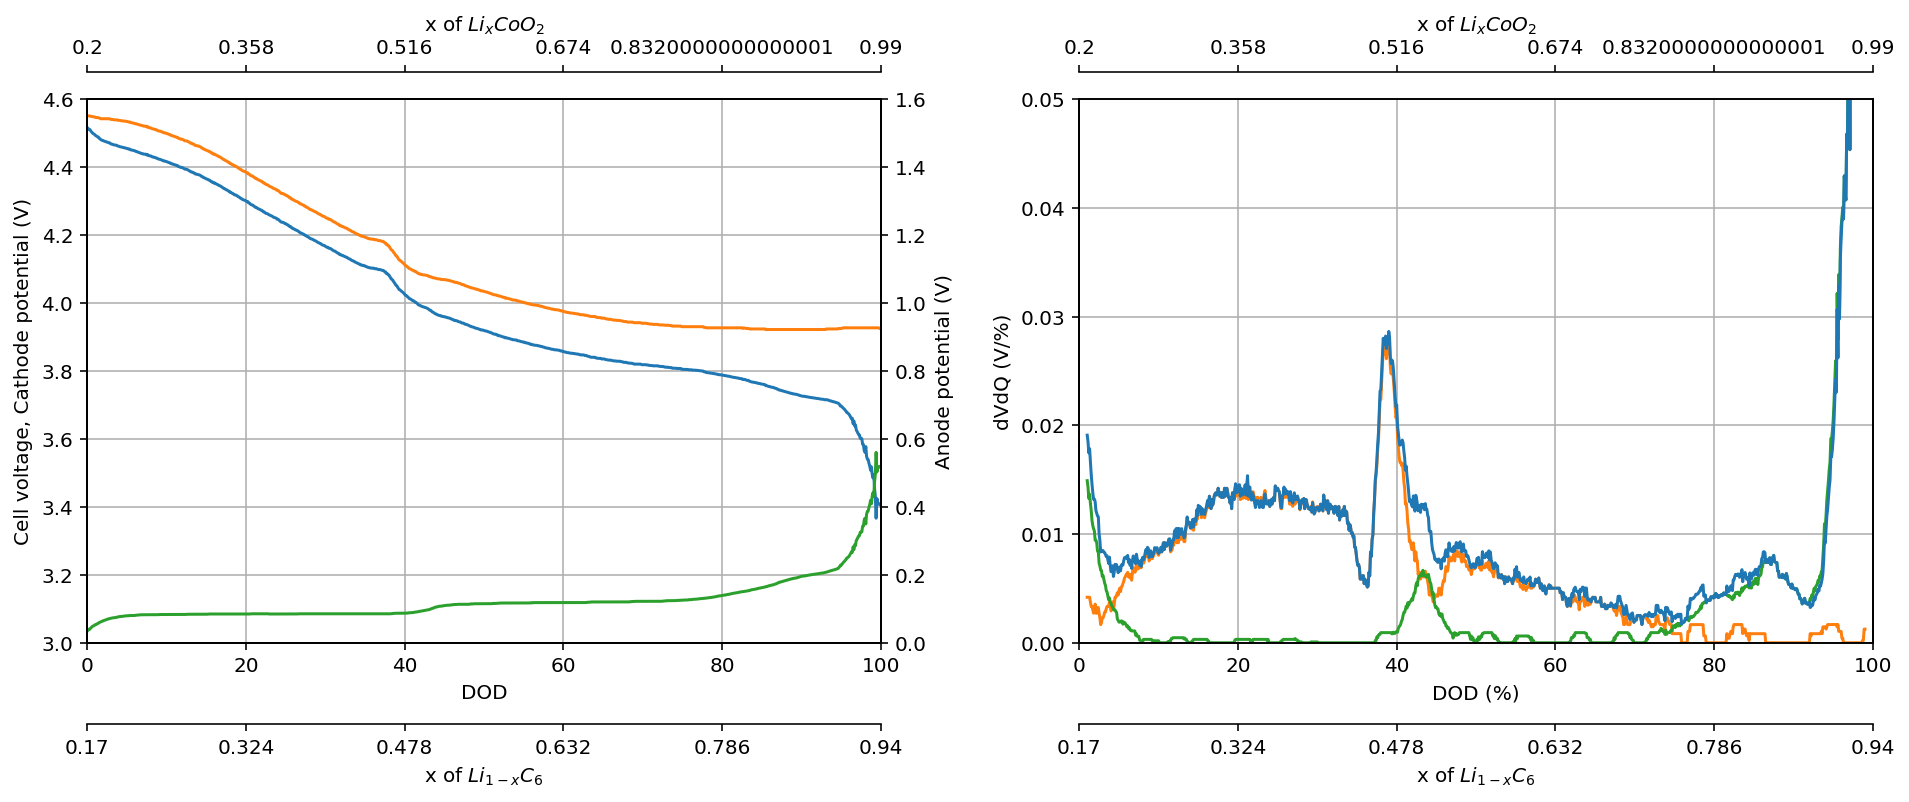

In [16]:
fig, (ax1,ax3) = plt.subplots(1,2,figsize=(16, 5))
plt.subplots_adjust(wspace=0.25)
ax2 = ax1.twinx()
ax1.plot(df_cell['DOD'], df_cell['Cathode OCV (V)'], color = new_colors[1])
ax1.plot(df_cell['DOD'], df_cell['Cell OCV (V)'], color = new_colors[0])
ax1.set_ylabel('Cell voltage, Cathode potential (V)')
ax2.plot(df_cell['DOD'], df_cell['Anode OCV (V)'], color = new_colors[2])
ax2.set_ylabel('Anode potential (V)')
ax1.set_xlabel('DOD')

ax1.set_ylim([3, 4.6])
ax2.set_ylim([0, 1.6])
ax1.grid()

ax1.set_xlim([0,100])
ax4 = ax1.twiny()
ax4.xaxis.set_ticks_position("bottom")
ax4.xaxis.set_label_position("bottom")
ax4.spines["bottom"].set_position(("axes", -0.15))

ax4.set_frame_on(True)
ax4.patch.set_visible(False)
ax4.spines["bottom"].set_visible(True)
ax4.set_xticks([0,20,40,60,80,100])
ax4.set_xticklabels(re_DOD_norm2(np.array([0,20,40,60,80,100]), x_n_s, x_n_e))
ax4.set_xlabel("x of $Li_{1-x}C_6$")

ax5 = ax1.twiny()
ax5.xaxis.set_ticks_position("top")
ax5.xaxis.set_label_position("top")
ax5.spines["top"].set_position(("axes", +1.05))

ax5.set_frame_on(True)
ax5.patch.set_visible(False)
ax5.spines["top"].set_visible(True)
ax5.set_xticks([0,20,40,60,80,100])
ax5.set_xticklabels(re_DOD_norm2(np.array([0,20,40,60,80,100]), x_p_s, x_p_e))
ax5.set_xlabel("x of $Li_{x}CoO_2$")

ax3.plot(df_cell['DOD'], dQdV(df_cell['DOD'], df_cell['Cathode OCV (V)'], 10), color = new_colors[1])
ax3.plot(df_cell['DOD'], dQdV(df_cell['DOD'], df_cell['Anode OCV (V)'], 10), color = new_colors[2])
ax3.plot(df_cell['DOD'], dQdV(df_cell['DOD'], df_cell['Cell OCV (V)'], 10), color = new_colors[0])

ax3.set_ylabel('dVdQ (V/%)')
ax3.set_xlabel('DOD (%)')

ax3.set_ylim([0, 0.05])
ax3.grid(which='both')

ax3.set_xlim([0,100])
ax6 = ax3.twiny()
ax6.xaxis.set_ticks_position("bottom")
ax6.xaxis.set_label_position("bottom")
ax6.spines["bottom"].set_position(("axes", -0.15))

ax6.set_frame_on(True)
ax6.patch.set_visible(False)
ax6.spines["bottom"].set_visible(True)
ax6.set_xticks([0,20,40,60,80,100])
ax6.set_xticklabels(re_DOD_norm2(np.array([0,20,40,60,80,100]), x_n_s, x_n_e))
ax6.set_xlabel("x of $Li_{1-x}C_6$")

ax7 = ax3.twiny()
ax7.xaxis.set_ticks_position("top")
ax7.xaxis.set_label_position("top")
ax7.spines["top"].set_position(("axes", +1.05))

ax7.set_frame_on(True)
ax7.patch.set_visible(False)
ax7.spines["top"].set_visible(True)
ax7.set_xticks([0,20,40,60,80,100])
ax7.set_xticklabels(re_DOD_norm2(np.array([0,20,40,60,80,100]), x_p_s, x_p_e))
ax7.set_xlabel("x of $Li_{x}CoO_2$")

plt.show()

## Diffuion in solid phase

Fick'S second law
\begin{eqnarray*}
\frac{\partial C_s(x,r,t)}{\partial t} = D_s \left( \frac{2}{r}\frac{\partial C_s(x,r,t)}{\partial r} + \frac{\partial^2 C_s(x,r,t)}{\partial r^2}\right)
\end{eqnarray*}
Boundary condition and initial condition
\begin{eqnarray*}
\frac{\partial C_s(x,r=0,t)}{\partial t} = 0\\
\frac{\partial C_s(x,r=L_s,t)}{\partial t} = j(x,t)\\
C_s(x,r,t=0)=C_{s,0}
\end{eqnarray*}

In [0]:
#Temperature
T = 298#[K]
temp_0 = 23 + 273.15#[K]


#Constant
R = 8.3144598 #[J/(mol K)]
F = 96485.33289 #[C/mol]
z = 1
alpha=0.5

k_o_p = 2.344E-11#7.13E-8
k_o_n = 5.0307E-11#1.47E-7
C_e_0 = 1000#[mol/m3]
C_s_max_p = 2.39E4 #[mol/m3]
C_s_max_n = 1.61E4 #[mol/m3]
C_s_p_0 = C_s_max_p*df_cell['Cathode x (-)'][0]
C_s_n_0 = C_s_max_n*(1 - df_cell['Anode x (-)'][0])

epsilon_e = 0.724
brugg_e = 4



#Area Dimension
S_Al = 100E-6*150E-6 #[m2]
S_Cu = 100E-6*200E-6 #[m2]
S_el = 150E-6*150E-6 #[m2]
S_p = 10*100E-6*100E-6  #[m2]
S_n = 10*100E-6*100E-6  #[m2]


#Cathode Dimension
L_Al = 100E-6 #[m]
L_p = 50E-6 #[m]
V_p = 3/4*np.pi*L_p**3  #[m3]

#Electrolyte Dimension
L_el = 10E-6 #[m]

#Anode Dimension
V_n = ((max(df_cell['Cathode x (-)']) - min(df_cell['Cathode x (-)']))*C_s_max_p*V_p*F)/((max(df_cell['Anode x (-)']) - min(df_cell['Anode x (-)']))*C_s_max_n*F)
L_Cu = 100E-6  #[m]

L_n = (V_n*4/3/np.pi)**(1/3) #[m]


#1C Current per one particle
I_1C = abs((max(df_cell['Cathode x (-)']) - min(df_cell['Cathode x (-)']))*C_s_max_p*V_p*F/60/60) #[A = C/sec]


#0.2C Current density
I = 0.2*I_1C

# Charge or Discharge
Condition = 'Discharge'
if Condition == 'Charge':
    I = abs(I)*(-1)

#j_Al = I/S_Al  #[A/m2 = C/sec m2]
#j_Cu = I/S_Cu  #[A/m2 = C/sec m2]
#j_p = I/S_p    #[A/m2 = C/sec m2]
#j_n = I/S_n    #[A/m2 = C/sec m2]
#j_el = I/S_el  #[A/m2 = C/sec m2]

#Diffusion coefficient
D_p = 0.5E-11 #[m2/s]
D_n = 1.0E-11 #[m2/s]

def kappa_e(C_el,epsilon_e,brugg_e):
    return epsilon_e**brugg_e*(4.1253*1E-2 + 5.007*1E-4*C_el -4.7212*1E-7*C_el**2
                               + 1.5094*1E-10*C_el**3 - 1.6018*1E-14*C_el**4)

# Li ion concentration in Liquid phase (Electrolyte)
epsilon = 1
Deff = 7.5E-12*0.5 #[m2/sec]
t_plus = 0.363

#resistivity at 294.15K (20deg.C)
rho_0_Al = 2.82E-8#[ohm m]
rho_0_Cu = 1.68E-8#[ohm m]
alpha_Al = 0.0039#[/K]
alpha_Cu = 0.003862#[/K]

#electronic resistance of conductive agent per 1m
R_s_p = 1E10 #[ohm m] Temporary number
R_s_n = 1E4 #[ohm m] Temporary number

# Memo
# C = C/sec sec = A sec
# C*60*60 = Ah



In [18]:

# Cathode capacity per one particle
print((max(df_cell['Cathode x (-)']) - min(df_cell['Cathode x (-)']))*C_s_max_p*V_p*F) # [C]
print((max(df_cell['Cathode x (-)']) - min(df_cell['Cathode x (-)']))*C_s_max_p*V_p*F/3600) # [C/sec * sec /36000 = A sec /36000 =Ah ]
Full_cap = (max(df_cell['Cathode x (-)']) - min(df_cell['Cathode x (-)']))*C_s_max_p*V_p*F/3600 #Ah

# Anode capacity per one particle
print((max(df_cell['Anode x (-)']) - min(df_cell['Anode x (-)']))*C_s_max_n*V_n*F) # [C]
print((max(df_cell['Anode x (-)']) - min(df_cell['Anode x (-)']))*C_s_max_n*V_n*F/3600) # [C/sec * sec /36000 = A sec /36000 =Ah ]

0.0005363088817465682
1.4897468937404674e-07
0.0005363088817465682
1.4897468937404674e-07


In [0]:
from scipy.optimize import fsolve
import math
C_el_pn1 = C_e_0
C_el_pn2 = C_e_0
C_el_pn3 = C_e_0
C_s_max_pn1 = C_s_max_p
C_s_max_pn2 = C_s_max_p
C_s_max_pn3 = C_s_max_p
C_s_pn1_surface = C_s_p_0
C_s_pn2_surface = C_s_p_0
C_s_pn3_surface = C_s_p_0
U_pn1 = df_cell['Cathode OCV (V)'][0]
U_pn2 = df_cell['Cathode OCV (V)'][0]
U_pn3 = df_cell['Cathode OCV (V)'][0]
R_s_pn=R_s_p

def equations(p,I=3*I, S_pn = S_p, k_o_pn = k_o_p, dx = L_p/3,
              C_el_pn1 = C_el_pn1, C_el_pn2 = C_el_pn2,C_el_pn3 = C_el_pn3,
              C_s_max_pn1 = C_s_max_pn1,C_s_max_pn2 = C_s_max_pn2,C_s_max_pn3 = C_s_max_pn3,
              C_s_pn1_surface = C_s_pn1_surface, C_s_pn2_surface = C_s_pn2_surface, C_s_pn3_surface = C_s_pn3_surface,
              R_s_pn = R_s_pn,
              df_cell=df_cell,U_pn1=U_pn1,U_pn2=U_pn2,U_pn3=U_pn3,
              z=z, F=F,R=R,T=T, alpha=alpha,
              epsilon_e=epsilon_e, brugg_e=brugg_e,
              t_plus=t_plus):
  
  I_pn1, I_pn2, I_pn3, Dphi_elpn = p
  
  j_pn1 = (I_pn1)/S_pn
  j_pn2 = (I_pn2)/S_pn
  j_pn3 = (I_pn3)/S_pn
  
  j_0_pn1 = z*F*k_o_pn*C_el_pn1**alpha*(C_s_max_pn1 - C_s_pn1_surface)**alpha*(C_s_pn1_surface)**alpha#[A/m2]
  j_0_pn2 = z*F*k_o_pn*C_el_pn2**alpha*(C_s_max_pn2 - C_s_pn2_surface)**alpha*(C_s_pn2_surface)**alpha#[A/m2]
  j_0_pn3 = z*F*k_o_pn*C_el_pn3**alpha*(C_s_max_pn3 - C_s_pn3_surface)**alpha*(C_s_pn3_surface)**alpha#[A/m2]
  
  DV_eta_pn1 = (R*T)/(alpha*z*F)*math.log(j_pn1/(2*j_0_pn1) + ((j_pn1/(2*j_0_pn1))**2 + 1)**0.5)
  DV_eta_pn2 = (R*T)/(alpha*z*F)*math.log(j_pn2/(2*j_0_pn2) + ((j_pn2/(2*j_0_pn2))**2 + 1)**0.5)
  DV_eta_pn3 = (R*T)/(alpha*z*F)*math.log(j_pn3/(2*j_0_pn3) + ((j_pn3/(2*j_0_pn3))**2 + 1)**0.5)
  
  Dphi_spn32 = R_s_pn * dx * (I_pn2 + I_pn3)
  Dphi_spn21 = R_s_pn * dx * (I_pn2)
  
  Dphi_elpn32 = -(I_pn1 + I_pn2)*dx/kappa_e((C_el_pn3+C_el_pn2)/2, epsilon_e, brugg_e) + 2*R*T/F*(0.5 - t_plus)*(np.log(C_el_pn3) - np.log(C_el_pn2))
  Dphi_elpn21 = -(I_pn1)*dx/kappa_e((C_el_pn2+C_el_pn1)/2, epsilon_e, brugg_e) + 2*R*T/F*(0.5 - t_plus)*(np.log(C_el_pn3) - np.log(C_el_pn2))
  
  f1 = Dphi_spn21 + Dphi_spn32 - U_pn3 + DV_eta_pn3 - Dphi_elpn
  f2 = Dphi_spn21 - U_pn2 + DV_eta_pn2 + Dphi_elpn32- Dphi_elpn
  f3 = -U_pn1 + DV_eta_pn1 + Dphi_elpn32 + Dphi_elpn21- Dphi_elpn
  f4 = I_pn1 + I_pn2 + I_pn3 - I
 
  return (f1, f2, f3, f4)


In [20]:
I_1, I_2, I_3, Dphi_elpn= fsolve(equations, (I/3, I/3, I/3, 0))
print(equations((I_1, I_2, I_3, Dphi_elpn)))
print(I_1)
print(I_2)
print(I_3)
print(Dphi_elpn)

(-2.631672657571471e-11, 4.242828310907498e-11, 2.6899371619037993e-10, 1.9852334701272664e-22)
4.598569831254233e-08
3.146235583719195e-08
1.1936759474693955e-08
-4.533768129774643


In [0]:
# Set simulation total time and delta time
t_total=60*60*5
dt=0.5
t = np.arange(0,t_total+dt,dt)

#Preparation of dataframe to store result of simulation.
df_sim = pd.DataFrame(t)
df_sim.columns = ['Time (sec)']
df_sim = df_sim.assign(U_p1 = np.nan)
df_sim = df_sim.assign(U_p2 = np.nan)
df_sim = df_sim.assign(U_p3 = np.nan)
df_sim = df_sim.assign(C_el_p1 = np.nan)
df_sim = df_sim.assign(C_el_p2 = np.nan)
df_sim = df_sim.assign(C_el_p3 = np.nan)
df_sim = df_sim.assign(C_s_p1_surface = np.nan)
df_sim = df_sim.assign(C_s_p2_surface = np.nan)
df_sim = df_sim.assign(C_s_p3_surface = np.nan)
df_sim = df_sim.assign(I_p1 = np.nan)
df_sim = df_sim.assign(I_p2 = np.nan)
df_sim = df_sim.assign(I_p3 = np.nan)
df_sim = df_sim.assign(Dphi_elp = np.nan)

In [22]:
tt=0
df_sim["U_p1"][tt] = df_cell['Cathode OCV (V)'][0]
df_sim["U_p2"][tt] = df_cell['Cathode OCV (V)'][0]
df_sim["U_p3"][tt] = df_cell['Cathode OCV (V)'][0]
df_sim["C_el_p1"][tt] = C_e_0
df_sim["C_el_p2"][tt] = C_e_0
df_sim["C_el_p3"][tt] = C_e_0
df_sim["C_s_p1_surface"][tt] = C_s_p_0
df_sim["C_s_p2_surface"][tt] = C_s_p_0
df_sim["C_s_p3_surface"][tt] = C_s_p_0
df_sim["I_p1"][tt] = 0
df_sim["I_p2"][tt] = 0
df_sim["I_p3"][tt] = 0
df_sim["Dphi_elp"][tt] = 0
df_sim

,Time (sec),U_p1,U_p2,U_p3,C_el_p1,C_el_p2,C_el_p3,C_s_p1_surface,C_s_p2_surface,C_s_p3_surface,I_p1,I_p2,I_p3,Dphi_elp
0,0.0,4.55072,4.55072,4.55072,1000.0,1000.0,1000.0,4787.648,4787.648,4787.648,0.0,0.0,0.0,0.0
1,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35996,17998.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35997,17998.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35998,17999.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35999,17999.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# Calculate I1, I2, I3
tt = 0 #time step (not [sec])

C_el_pn1 = df_sim["C_el_p1"][tt]
C_el_pn2 = df_sim["C_el_p2"][tt]
C_el_pn3 = df_sim["C_el_p3"][tt]
C_s_max_pn1 = C_s_max_p
C_s_max_pn2 = C_s_max_p
C_s_max_pn3 = C_s_max_p
C_s_pn1_surface = df_sim["C_s_p1_surface"][tt]
C_s_pn2_surface = df_sim["C_s_p2_surface"][tt]
C_s_pn3_surface = df_sim["C_s_p3_surface"][tt]
U_pn1 = df_sim["U_p1"][tt]
U_pn2 = df_sim["U_p2"][tt]
U_pn3 = df_sim["U_p3"][tt]


tt=1 #time step (not [sec])
def equations(p,I=3*I, S_pn = S_p, k_o_pn = k_o_p, dx = L_p/3,
              C_el_pn1 = C_el_pn1, C_el_pn2 = C_el_pn2,C_el_pn3 = C_el_pn3,
              C_s_max_pn1 = C_s_max_pn1,C_s_max_pn2 = C_s_max_pn2,C_s_max_pn3 = C_s_max_pn3,
              C_s_pn1_surface = C_s_pn1_surface, C_s_pn2_surface = C_s_pn2_surface, C_s_pn3_surface = C_s_pn3_surface,
              R_s_pn = R_s_pn,
              df_cell=df_cell,U_pn1=U_pn1,U_pn2=U_pn2,U_pn3=U_pn3,
              z=z, F=F,R=R,T=T, alpha=alpha,
              epsilon_e=epsilon_e, brugg_e=brugg_e,
              t_plus=t_plus):
  
  I_pn1, I_pn2, I_pn3, Dphi_elpn = p
  
  j_pn1 = (I_pn1)/S_pn
  j_pn2 = (I_pn2)/S_pn
  j_pn3 = (I_pn3)/S_pn
  
  j_0_pn1 = z*F*k_o_pn*C_el_pn1**alpha*(C_s_max_pn1 - C_s_pn1_surface)**alpha*(C_s_pn1_surface)**alpha#[A/m2]
  j_0_pn2 = z*F*k_o_pn*C_el_pn2**alpha*(C_s_max_pn2 - C_s_pn2_surface)**alpha*(C_s_pn2_surface)**alpha#[A/m2]
  j_0_pn3 = z*F*k_o_pn*C_el_pn3**alpha*(C_s_max_pn3 - C_s_pn3_surface)**alpha*(C_s_pn3_surface)**alpha#[A/m2]
  
  DV_eta_pn1 = (R*T)/(alpha*z*F)*math.log(j_pn1/(2*j_0_pn1) + ((j_pn1/(2*j_0_pn1))**2 + 1)**0.5)
  DV_eta_pn2 = (R*T)/(alpha*z*F)*math.log(j_pn2/(2*j_0_pn2) + ((j_pn2/(2*j_0_pn2))**2 + 1)**0.5)
  DV_eta_pn3 = (R*T)/(alpha*z*F)*math.log(j_pn3/(2*j_0_pn3) + ((j_pn3/(2*j_0_pn3))**2 + 1)**0.5)
  
  Dphi_spn32 = R_s_pn * dx * (I_pn2 + I_pn3)
  Dphi_spn21 = R_s_pn * dx * (I_pn2)
  
  Dphi_elpn32 = -(I_pn1 + I_pn2)*dx/kappa_e((C_el_pn3+C_el_pn2)/2, epsilon_e, brugg_e) + 2*R*T/F*(0.5 - t_plus)*(np.log(C_el_pn3) - np.log(C_el_pn2))
  Dphi_elpn21 = -(I_pn1)*dx/kappa_e((C_el_pn2+C_el_pn1)/2, epsilon_e, brugg_e) + 2*R*T/F*(0.5 - t_plus)*(np.log(C_el_pn3) - np.log(C_el_pn2))
  
  f1 = Dphi_spn21 + Dphi_spn32 - U_pn3 + DV_eta_pn3 - Dphi_elpn
  f2 = Dphi_spn21 - U_pn2 + DV_eta_pn2 + Dphi_elpn32- Dphi_elpn
  f3 = -U_pn1 + DV_eta_pn1 + Dphi_elpn32 + Dphi_elpn21- Dphi_elpn
  f4 = I_pn1 + I_pn2 + I_pn3 - I
 
  return (f1, f2, f3, f4)
I_p1, I_p2, I_p3, Dphi_elp= fsolve(equations, (I/3, I/3, I/3, 0))
df_sim["I_p1"][tt] = I_p1
df_sim["I_p2"][tt] = I_p2
df_sim["I_p3"][tt] = I_p3
df_sim["Dphi_elp"][tt] = Dphi_elp

df_sim

,Time (sec),U_p1,U_p2,U_p3,C_el_p1,C_el_p2,C_el_p3,C_s_p1_surface,C_s_p2_surface,C_s_p3_surface,I_p1,I_p2,I_p3,Dphi_elp
0,0.0,4.55072,4.55072,4.55072,1000.0,1000.0,1000.0,4787.648,4787.648,4787.648,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
1,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.598570e-08,3.146236e-08,1.193676e-08,-4.533768
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35996,17998.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35997,17998.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35998,17999.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35999,17999.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
# Calculation of Li concentration inside active material particle.
#n=10 # Number of grid insed particle

def initial_df_s_pn(L_pn,V_pn, C_s_pn_0,t, tt=0, n=10):
  dx = L_pn/n
  df_pn_sim = pd.DataFrame(t)
  df_pn_sim.columns = ['Time (sec)']

  for ii in range(n):
    kwargs = {"L_%d" %ii : lambda x: np.nan}
    df_pn_sim = df_pn_sim.assign(**kwargs)
    
  x = np.linspace(dx/2, L_pn - dx/2,n)
  C = np.ones(len(x))*C_s_pn_0*V_pn/L_pn
  t = np.arange(0,t_total+dt,dt)
  x_rlt = np.zeros((1,len(x)))
  C_rlt = np.zeros((len(t)+1,len(C)))

  #tt=01st raw
  x_rlt[tt] = x
  C_rlt[tt] = C
  return df_pn_sim, t, x_rlt, C_rlt

In [0]:
# Calculation of initial Li concentration insed active material particle
tt=0
df_p1_sim, t_s_p1, x_rlt_s_p1, C_rlt_s_p1 =initial_df_s_pn(L_pn=L_p, V_pn=V_p, C_s_pn_0=C_s_p_0,t=np.array(df_sim["Time (sec)"]), tt=0, n=10)
df_p1_sim.iloc[tt,1:] = C_rlt_s_p1[tt]

df_p2_sim, t_s_p2, x_rlt_s_p2, C_rlt_s_p2 =initial_df_s_pn(L_pn=L_p, V_pn=V_p, C_s_pn_0=C_s_p_0,t=np.array(df_sim["Time (sec)"]), tt=0, n=10)
df_p2_sim.iloc[tt,1:] = C_rlt_s_p2[tt]

df_p3_sim, t_s_p3, x_rlt_s_p3, C_rlt_s_p3 =initial_df_s_pn(L_pn=L_p, V_pn=V_p, C_s_pn_0=C_s_p_0,t=np.array(df_sim["Time (sec)"]), tt=0, n=10)
df_p3_sim.iloc[tt,1:] = C_rlt_s_p3[tt]

In [26]:
df_p1_sim

,Time (sec),L_0,L_1,L_2,L_3,L_4,L_5,L_6,L_7,L_8,L_9
0,0.0,0.000028,0.000028,0.000028,0.000028,0.000028,0.000028,0.000028,0.000028,0.000028,0.000028
1,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
35996,17998.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35997,17998.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35998,17999.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35999,17999.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
#j_p1=df_sim["I_p1"][tt]/S_p

def update_df_s_pn(C_rlt, D_pn, j_pn, L_pn,S_pn, F=F, tt=tt, n=10):
  dx = L_pn/n
  dCdt = np.empty(n)
  C = C_rlt[tt-1]
  
  for i in range(1,n-1):
    # Applying discrete definition of second derivative
    dCdt[i] = D_pn*((C[i+1] - C[i])/dx - (C[i] - C[i-1])/dx)/dx
        
  # Taking into account boundary condition. ie. T[0-1] DNE
  dCdt[0] = D_pn*((C[1] - C[0])/dx)/dx
  dCdt[n-1] = D_pn*(j_pn*S_pn/F/D_pn - (C[n-1] - C[n-2])/dx)/dx
    
  # Update temperature data for rod
  C = C + dCdt * dt

  #time_rlt[tt] = (tt)*dt
  #x_rlt[tt] = x #
  C_rlt[tt] = C #concentration per dx
  return C_rlt

In [0]:
tt = 1
j_p1=df_sim["I_p1"][tt]/S_p
C_rlt_s_p1 = update_df_s_pn(C_rlt=C_rlt_s_p1, D_pn=D_p, j_pn=j_p1, L_pn=L_p,S_pn=S_p, F=F, tt=tt, n=10)

j_p2=df_sim["I_p2"][tt]/S_p
C_rlt_s_p2 = update_df_s_pn(C_rlt=C_rlt_s_p2, D_pn=D_p, j_pn=j_p2, L_pn=L_p,S_pn=S_p, F=F, tt=tt, n=10)

j_p3=df_sim["I_p3"][tt]/S_p
C_rlt_s_p3 = update_df_s_pn(C_rlt=C_rlt_s_p3, D_pn=D_p, j_pn=j_p3, L_pn=L_p,S_pn=S_p, F=F, tt=tt, n=10)

In [0]:
df_p1_sim.iloc[tt,1:] = C_rlt_s_p1[tt]
df_p2_sim.iloc[tt,1:] = C_rlt_s_p2[tt]
df_p3_sim.iloc[tt,1:] = C_rlt_s_p3[tt]

In [34]:
df_p1_sim

,Time (sec),L_0,L_1,L_2,L_3,L_4,L_5,L_6,L_7,L_8,L_9
0,0.0,0.000028,0.000028,0.000028,0.000028,0.000028,0.000028,0.000028,0.000028,0.000028,0.000028
1,0.5,0.000028,0.000028,0.000028,0.000028,0.000028,0.000028,0.000028,0.000028,0.000028,0.000028
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
35996,17998.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35997,17998.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35998,17999.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35999,17999.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
# Surface Li concentration
df_sim["C_s_p1_surface"][tt] = C_rlt_s_p1[tt][-1]/V_p*L_p #(mol/m3)
df_sim["C_s_p2_surface"][tt] = C_rlt_s_p2[tt][-1]/V_p*L_p #(mol/m3)
df_sim["C_s_p3_surface"][tt] = C_rlt_s_p3[tt][-1]/V_p*L_p #(mol/m3)

In [36]:
df_sim

,Time (sec),U_p1,U_p2,U_p3,C_el_p1,C_el_p2,C_el_p3,C_s_p1_surface,C_s_p2_surface,C_s_p3_surface,I_p1,I_p2,I_p3,Dphi_elp
0,0.0,4.55072,4.55072,4.55072,1000.0,1000.0,1000.0,4787.648000,4787.64800,4787.648000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
1,0.5,NaN,NaN,NaN,NaN,NaN,NaN,4795.739152,4793.18378,4789.748265,4.598570e-08,3.146236e-08,1.193676e-08,-4.533768
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35996,17998.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35997,17998.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35998,17999.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35999,17999.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
# Calcutation of U using surface Li concentration
df_sim["U_p1"][tt] = df_cell['Cathode OCV (V)'][abs(df_cell['Cathode x (-)'] - df_sim["C_s_p1_surface"][tt]/C_s_max_p).idxmin()]
df_sim["U_p2"][tt] = df_cell['Cathode OCV (V)'][abs(df_cell['Cathode x (-)'] - df_sim["C_s_p2_surface"][tt]/C_s_max_p).idxmin()]
df_sim["U_p3"][tt] = df_cell['Cathode OCV (V)'][abs(df_cell['Cathode x (-)'] - df_sim["C_s_p3_surface"][tt]/C_s_max_p).idxmin()]

In [38]:
df_sim

,Time (sec),U_p1,U_p2,U_p3,C_el_p1,C_el_p2,C_el_p3,C_s_p1_surface,C_s_p2_surface,C_s_p3_surface,I_p1,I_p2,I_p3,Dphi_elp
0,0.0,4.55072,4.55072,4.55072,1000.0,1000.0,1000.0,4787.648000,4787.64800,4787.648000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
1,0.5,4.55072,4.55072,4.55072,NaN,NaN,NaN,4795.739152,4793.18378,4789.748265,4.598570e-08,3.146236e-08,1.193676e-08,-4.533768
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35996,17998.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35997,17998.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35998,17999.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35999,17999.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
def initial_df_el_pn(L_pn, S_el, C_e_0,t, tt=0, n=3):
  dx = L_pn/n
  V_pn=S_el*L_pn
  df_el_pn_sim = pd.DataFrame(t)
  df_el_pn_sim.columns = ['Time (sec)']
  
  
  for ii in range(n):
    kwargs = {"X_%d" %ii : lambda x: np.nan}
    df_el_pn_sim = df_el_pn_sim.assign(**kwargs)
    
  x = np.linspace(dx/2, L_pn - dx/2,n)
  C = np.ones(len(x))*C_e_0*S_el
  
  t = np.arange(0,t_total+dt,dt)
  x_rlt = np.zeros((1,len(x)))
  C_rlt = np.zeros((len(t)+1,len(C)))

  #tt=01st raw
  x_rlt[tt] = x
  C_rlt[tt] = C
  return df_el_pn_sim, t, x_rlt, C_rlt

In [0]:
df_el_p_sim, t_el_p, x_rlt_el_p, C_rlt_el_p = initial_df_el_pn(L_pn=L_p, S_el=S_el, C_e_0=C_e_0,t=np.array(df_sim["Time (sec)"]), tt=0, n=3)
df_el_p_sim.iloc[0,1:] = C_rlt_el_p[0]

In [41]:
df_el_p_sim 

,Time (sec),X_0,X_1,X_2
0,0.0,0.000022,0.000022,0.000022
1,0.5,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN
3,1.5,NaN,NaN,NaN
4,2.0,NaN,NaN,NaN
...,...,...,...,...
35996,17998.0,NaN,NaN,NaN
35997,17998.5,NaN,NaN,NaN
35998,17999.0,NaN,NaN,NaN
35999,17999.5,NaN,NaN,NaN


In [0]:
def update_df_el_pn(C_rlt, I_pn123, L_pn, Deff=Deff, C_e_blk=C_e_0, F=F, tt=tt, t_plus=t_plus, n=3, epsilon=epsilon):#Temporarily assume C_e_blk := C[i+1] = C_e_0
  dx = L_pn/n
  dCdt = np.empty(n)
  C = C_rlt[tt-1]
  
  dCdt[0] = 1/epsilon*(Deff*((C[1] - C[0])/dx)/dx - 1/dx*(1-t_plus)/F*I_p123[0])
  
  for i in range(1,n-1):
        dCdt[i] = 1/epsilon*(Deff*((C[i+1] - C[i])/dx - (C[i] - C[i-1])/dx)/dx)- 1/dx*(1-t_plus)/F*I_p123[i]
  i=n-1
  dCdt[n-1] = 1/epsilon*(Deff*((C_e_blk*S_el - C[i])/dx - (C[i] - C[i-1])/dx)/dx)- 1/dx*(1-t_plus)/F*I_p123[i] 
    
  # Update temperature data for rod
  C = C + dCdt * dt

  C_rlt[tt] = C #concentration per dx
  
  return C_rlt

In [0]:
I_p1=df_sim["I_p1"][tt]
I_p2=df_sim["I_p2"][tt]
I_p3=df_sim["I_p3"][tt]
I_p123 = np.array([I_p1,I_p2,I_p3])

C_rlt_el_p = update_df_el_pn(C_rlt=C_rlt_el_p, I_pn123=I_p123, L_pn=L_p, Deff=Deff, C_e_blk=C_e_0, F=F, tt=tt, t_plus=t_plus, n=3, epsilon=epsilon)

In [0]:
df_el_p_sim.iloc[tt,1:] = C_rlt_el_p[tt]

In [0]:
df_sim["C_el_p1"][tt] = df_el_p_sim["X_0"].loc[tt]/S_el
df_sim["C_el_p2"][tt] = df_el_p_sim["X_1"].loc[tt]/S_el
df_sim["C_el_p3"][tt] = df_el_p_sim["X_2"].loc[tt]/S_el

In [46]:
df_sim

,Time (sec),U_p1,U_p2,U_p3,C_el_p1,C_el_p2,C_el_p3,C_s_p1_surface,C_s_p2_surface,C_s_p3_surface,I_p1,I_p2,I_p3,Dphi_elp
0,0.0,4.55072,4.55072,4.55072,1000.000000,1000.000000,1000.000000,4787.648000,4787.64800,4787.648000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
1,0.5,4.55072,4.55072,4.55072,999.595201,999.723046,999.894924,4795.739152,4793.18378,4789.748265,4.598570e-08,3.146236e-08,1.193676e-08,-4.533768
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35996,17998.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35997,17998.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35998,17999.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35999,17999.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
U_pn1 = df_sim["U_p1"][tt-1]
U_pn2 = df_sim["U_p2"][tt-1]
U_pn3 = df_sim["U_p3"][tt-1]
I_p1, I_p2, I_p3, Dphi_elp= fsolve(equations, (1, 1, 1, Dphi_elp))

print(I_p1)
print(I_p3)

4.5985698029062675e-08
1.1936759664429193e-08


In [48]:
tt=2
C_el_pn1 = df_sim["C_el_p1"][tt-1]
C_el_pn2 = df_sim["C_el_p2"][tt-1]
C_el_pn3 = df_sim["C_el_p3"][tt-1]
C_s_max_pn1 = C_s_max_p
C_s_max_pn2 = C_s_max_p
C_s_max_pn3 = C_s_max_p
C_s_pn1_surface = df_sim["C_s_p1_surface"][tt-1]
C_s_pn2_surface = df_sim["C_s_p2_surface"][tt-1]
C_s_pn3_surface = df_sim["C_s_p3_surface"][tt-1]
U_pn1 = df_sim["U_p1"][tt-1]
U_pn2 = df_sim["U_p2"][tt-1]
U_pn3 = df_sim["U_p3"][tt-1]

def equations(p,I=3*I, S_pn = S_p, k_o_pn = k_o_p, dx = L_p/3,
              C_el_pn1 = C_el_pn1, C_el_pn2 = C_el_pn2,C_el_pn3 = C_el_pn3,
              C_s_max_pn1 = C_s_max_pn1,C_s_max_pn2 = C_s_max_pn2,C_s_max_pn3 = C_s_max_pn3,
              C_s_pn1_surface = C_s_pn1_surface, C_s_pn2_surface = C_s_pn2_surface, C_s_pn3_surface = C_s_pn3_surface,
              R_s_pn = R_s_pn,
              df_cell=df_cell,U_pn1=U_pn1,U_pn2=U_pn2,U_pn3=U_pn3,
              z=z, F=F,R=R,T=T, alpha=alpha,
              epsilon_e=epsilon_e, brugg_e=brugg_e,
              t_plus=t_plus):
  
  I_pn1, I_pn2, I_pn3, Dphi_elpn = p
  
  j_pn1 = (I_pn1)/S_pn
  j_pn2 = (I_pn2)/S_pn
  j_pn3 = (I_pn3)/S_pn
  
  j_0_pn1 = z*F*k_o_pn*C_el_pn1**alpha*(C_s_max_pn1 - C_s_pn1_surface)**alpha*(C_s_pn1_surface)**alpha#[A/m2]
  j_0_pn2 = z*F*k_o_pn*C_el_pn2**alpha*(C_s_max_pn2 - C_s_pn2_surface)**alpha*(C_s_pn2_surface)**alpha#[A/m2]
  j_0_pn3 = z*F*k_o_pn*C_el_pn3**alpha*(C_s_max_pn3 - C_s_pn3_surface)**alpha*(C_s_pn3_surface)**alpha#[A/m2]
  
  DV_eta_pn1 = (R*T)/(alpha*z*F)*math.log(j_pn1/(2*j_0_pn1) + ((j_pn1/(2*j_0_pn1))**2 + 1)**0.5)
  DV_eta_pn2 = (R*T)/(alpha*z*F)*math.log(j_pn2/(2*j_0_pn2) + ((j_pn2/(2*j_0_pn2))**2 + 1)**0.5)
  DV_eta_pn3 = (R*T)/(alpha*z*F)*math.log(j_pn3/(2*j_0_pn3) + ((j_pn3/(2*j_0_pn3))**2 + 1)**0.5)
  
  Dphi_spn32 = R_s_pn * dx * (I_pn2 + I_pn3)
  Dphi_spn21 = R_s_pn * dx * (I_pn2)
  
  Dphi_elpn32 = -(I_pn1 + I_pn2)*dx/kappa_e((C_el_pn3+C_el_pn2)/2, epsilon_e, brugg_e) + 2*R*T/F*(0.5 - t_plus)*(np.log(C_el_pn3) - np.log(C_el_pn2))
  Dphi_elpn21 = -(I_pn1)*dx/kappa_e((C_el_pn2+C_el_pn1)/2, epsilon_e, brugg_e) + 2*R*T/F*(0.5 - t_plus)*(np.log(C_el_pn3) - np.log(C_el_pn2))
  
  f1 = Dphi_spn21 + Dphi_spn32 - U_pn3 + DV_eta_pn3 - Dphi_elpn
  f2 = Dphi_spn21 - U_pn2 + DV_eta_pn2 + Dphi_elpn32- Dphi_elpn
  f3 = -U_pn1 + DV_eta_pn1 + Dphi_elpn32 + Dphi_elpn21- Dphi_elpn
  f4 = I_pn1 + I_pn2 + I_pn3 - I
 
  return (f1, f2, f3, f4)


I_p1, I_p2, I_p3, Dphi_elp= fsolve(equations, (df_sim["I_p1"][tt-1], df_sim["I_p2"][tt-1], df_sim["I_p3"][tt-1], Dphi_elp))
df_sim["I_p1"][tt] = I_p1
df_sim["I_p2"][tt] = I_p2
df_sim["I_p3"][tt] = I_p3
df_sim["Dphi_elp"][tt] = Dphi_elp


j_p1=df_sim["I_p1"][tt]/S_p
C_rlt_s_p1 = update_df_s_pn(C_rlt=C_rlt_s_p1, D_pn=D_p, j_pn=j_p1, L_pn=L_p,S_pn=S_p, F=F, tt=tt, n=10)
j_p2=df_sim["I_p2"][tt]/S_p
C_rlt_s_p2 = update_df_s_pn(C_rlt=C_rlt_s_p2, D_pn=D_p, j_pn=j_p2, L_pn=L_p,S_pn=S_p, F=F, tt=tt, n=10)
j_p3=df_sim["I_p3"][tt]/S_p
C_rlt_s_p3 = update_df_s_pn(C_rlt=C_rlt_s_p3, D_pn=D_p, j_pn=j_p3, L_pn=L_p,S_pn=S_p, F=F, tt=tt, n=10)

df_p1_sim.iloc[tt,1:] = C_rlt_s_p1[tt]
df_p2_sim.iloc[tt,1:] = C_rlt_s_p2[tt]
df_p3_sim.iloc[tt,1:] = C_rlt_s_p3[tt]

df_sim["C_s_p1_surface"][tt] = C_rlt_s_p1[tt][-1]/V_p*L_p #(mol/m3)
df_sim["C_s_p2_surface"][tt] = C_rlt_s_p2[tt][-1]/V_p*L_p #(mol/m3)
df_sim["C_s_p3_surface"][tt] = C_rlt_s_p3[tt][-1]/V_p*L_p #(mol/m3)

df_sim["U_p1"][tt] = df_cell['Cathode OCV (V)'][abs(df_cell['Cathode x (-)'] - df_sim["C_s_p1_surface"][tt]/C_s_max_p).idxmin()]
df_sim["U_p2"][tt] = df_cell['Cathode OCV (V)'][abs(df_cell['Cathode x (-)'] - df_sim["C_s_p2_surface"][tt]/C_s_max_p).idxmin()]
df_sim["U_p3"][tt] = df_cell['Cathode OCV (V)'][abs(df_cell['Cathode x (-)'] - df_sim["C_s_p3_surface"][tt]/C_s_max_p).idxmin()]

I_p1=df_sim["I_p1"][tt]
I_p2=df_sim["I_p2"][tt]
I_p3=df_sim["I_p3"][tt]
I_p123 = np.array([I_p1,I_p2,I_p3])

C_rlt_el_p = update_df_el_pn(C_rlt=C_rlt_el_p, I_pn123=I_p123, L_pn=L_p, Deff=Deff, C_e_blk=C_e_0, F=F, tt=tt, t_plus=t_plus, n=3, epsilon=epsilon)

df_el_p_sim.iloc[tt,1:] = C_rlt_el_p[tt]
df_sim["C_el_p1"][tt] = df_el_p_sim["X_0"].loc[tt]/S_el
df_sim["C_el_p2"][tt] = df_el_p_sim["X_1"].loc[tt]/S_el
df_sim["C_el_p3"][tt] = df_el_p_sim["X_2"].loc[tt]/S_el

df_sim

,Time (sec),U_p1,U_p2,U_p3,C_el_p1,C_el_p2,C_el_p3,C_s_p1_surface,C_s_p2_surface,C_s_p3_surface,I_p1,I_p2,I_p3,Dphi_elp
0,0.0,4.55072,4.55072,4.55072,1000.000000,1000.000000,1000.000000,4787.648000,4787.648000,4787.648000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
1,0.5,4.55072,4.55072,4.55072,999.595201,999.723046,999.894924,4795.739152,4793.183780,4789.748265,4.598570e-08,3.146236e-08,1.193676e-08,-4.533768
2,1.0,4.55072,4.55072,4.55072,999.191221,999.446400,999.789429,4803.022050,4798.165751,4791.637871,4.599060e-08,3.146105e-08,1.193317e-08,-4.533771
3,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35996,17998.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35997,17998.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35998,17999.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35999,17999.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
t1 = time.time()
for tt in range(3,len(t)):
  C_el_pn1 = df_sim["C_el_p1"][tt-1]
  C_el_pn2 = df_sim["C_el_p2"][tt-1]
  C_el_pn3 = df_sim["C_el_p3"][tt-1]
  C_s_max_pn1 = C_s_max_p
  C_s_max_pn2 = C_s_max_p
  C_s_max_pn3 = C_s_max_p
  C_s_pn1_surface = df_sim["C_s_p1_surface"][tt-1]
  C_s_pn2_surface = df_sim["C_s_p2_surface"][tt-1]
  C_s_pn3_surface = df_sim["C_s_p3_surface"][tt-1]
  U_pn1 = df_sim["U_p1"][tt-1]
  U_pn2 = df_sim["U_p2"][tt-1]
  U_pn3 = df_sim["U_p3"][tt-1]
  
  
  def equations(p,I=3*I, S_pn = S_p, k_o_pn = k_o_p, dx = L_p/3,
              C_el_pn1 = C_el_pn1, C_el_pn2 = C_el_pn2,C_el_pn3 = C_el_pn3,
              C_s_max_pn1 = C_s_max_pn1,C_s_max_pn2 = C_s_max_pn2,C_s_max_pn3 = C_s_max_pn3,
              C_s_pn1_surface = C_s_pn1_surface, C_s_pn2_surface = C_s_pn2_surface, C_s_pn3_surface = C_s_pn3_surface,
              R_s_pn = R_s_pn,
              df_cell=df_cell,U_pn1=U_pn1,U_pn2=U_pn2,U_pn3=U_pn3,
              z=z, F=F,R=R,T=T, alpha=alpha,
              epsilon_e=epsilon_e, brugg_e=brugg_e,
              t_plus=t_plus):
    I_pn1, I_pn2, I_pn3, Dphi_elpn = p
  
    j_pn1 = (I_pn1)/S_pn
    j_pn2 = (I_pn2)/S_pn
    j_pn3 = (I_pn3)/S_pn
  
    j_0_pn1 = z*F*k_o_pn*C_el_pn1**alpha*(C_s_max_pn1 - C_s_pn1_surface)**alpha*(C_s_pn1_surface)**alpha#[A/m2]
    j_0_pn2 = z*F*k_o_pn*C_el_pn2**alpha*(C_s_max_pn2 - C_s_pn2_surface)**alpha*(C_s_pn2_surface)**alpha#[A/m2]
    j_0_pn3 = z*F*k_o_pn*C_el_pn3**alpha*(C_s_max_pn3 - C_s_pn3_surface)**alpha*(C_s_pn3_surface)**alpha#[A/m2]
  
    DV_eta_pn1 = (R*T)/(alpha*z*F)*math.log(j_pn1/(2*j_0_pn1) + ((j_pn1/(2*j_0_pn1))**2 + 1)**0.5)
    DV_eta_pn2 = (R*T)/(alpha*z*F)*math.log(j_pn2/(2*j_0_pn2) + ((j_pn2/(2*j_0_pn2))**2 + 1)**0.5)
    DV_eta_pn3 = (R*T)/(alpha*z*F)*math.log(j_pn3/(2*j_0_pn3) + ((j_pn3/(2*j_0_pn3))**2 + 1)**0.5)
  
    Dphi_spn32 = R_s_pn * dx * (I_pn2 + I_pn3)
    Dphi_spn21 = R_s_pn * dx * (I_pn2)
  
    Dphi_elpn32 = -(I_pn1 + I_pn2)*dx/kappa_e((C_el_pn3+C_el_pn2)/2, epsilon_e, brugg_e) + 2*R*T/F*(0.5 - t_plus)*(np.log(C_el_pn3) - np.log(C_el_pn2))
    Dphi_elpn21 = -(I_pn1)*dx/kappa_e((C_el_pn2+C_el_pn1)/2, epsilon_e, brugg_e) + 2*R*T/F*(0.5 - t_plus)*(np.log(C_el_pn3) - np.log(C_el_pn2))
  
    f1 = Dphi_spn21 + Dphi_spn32 - U_pn3 + DV_eta_pn3 - Dphi_elpn
    f2 = Dphi_spn21 - U_pn2 + DV_eta_pn2 + Dphi_elpn32- Dphi_elpn
    f3 = -U_pn1 + DV_eta_pn1 + Dphi_elpn32 + Dphi_elpn21- Dphi_elpn
    f4 = I_pn1 + I_pn2 + I_pn3 - I
 
    return (f1, f2, f3, f4)

  I_p1, I_p2, I_p3, Dphi_elp= fsolve(equations, (df_sim["I_p1"][tt-1], df_sim["I_p2"][tt-1], df_sim["I_p3"][tt-1], Dphi_elp))
  df_sim["I_p1"][tt] = I_p1
  df_sim["I_p2"][tt] = I_p2
  df_sim["I_p3"][tt] = I_p3
  df_sim["Dphi_elp"][tt] = Dphi_elp


  j_p1=df_sim["I_p1"][tt]/S_p
  C_rlt_s_p1 = update_df_s_pn(C_rlt=C_rlt_s_p1, D_pn=D_p, j_pn=j_p1, L_pn=L_p,S_pn=S_p, F=F, tt=tt, n=10)
  j_p2=df_sim["I_p2"][tt]/S_p
  C_rlt_s_p2 = update_df_s_pn(C_rlt=C_rlt_s_p2, D_pn=D_p, j_pn=j_p2, L_pn=L_p,S_pn=S_p, F=F, tt=tt, n=10)
  j_p3=df_sim["I_p3"][tt]/S_p
  C_rlt_s_p3 = update_df_s_pn(C_rlt=C_rlt_s_p3, D_pn=D_p, j_pn=j_p3, L_pn=L_p,S_pn=S_p, F=F, tt=tt, n=10)

  df_p1_sim.iloc[tt,1:] = C_rlt_s_p1[tt]
  df_p2_sim.iloc[tt,1:] = C_rlt_s_p2[tt]
  df_p3_sim.iloc[tt,1:] = C_rlt_s_p3[tt]

  df_sim["C_s_p1_surface"][tt] = C_rlt_s_p1[tt][-1]/V_p*L_p #(mol/m3)
  df_sim["C_s_p2_surface"][tt] = C_rlt_s_p2[tt][-1]/V_p*L_p #(mol/m3)
  df_sim["C_s_p3_surface"][tt] = C_rlt_s_p3[tt][-1]/V_p*L_p #(mol/m3)

  df_sim["U_p1"][tt] = df_cell['Cathode OCV (V)'][abs(df_cell['Cathode x (-)'] - df_sim["C_s_p1_surface"][tt]/C_s_max_p).idxmin()]
  df_sim["U_p2"][tt] = df_cell['Cathode OCV (V)'][abs(df_cell['Cathode x (-)'] - df_sim["C_s_p2_surface"][tt]/C_s_max_p).idxmin()]
  df_sim["U_p3"][tt] = df_cell['Cathode OCV (V)'][abs(df_cell['Cathode x (-)'] - df_sim["C_s_p3_surface"][tt]/C_s_max_p).idxmin()]

  I_p1=df_sim["I_p1"][tt]
  I_p2=df_sim["I_p2"][tt]
  I_p3=df_sim["I_p3"][tt]
  I_p123 = np.array([I_p1,I_p2,I_p3])

  C_rlt_el_p = update_df_el_pn(C_rlt=C_rlt_el_p, I_pn123=I_p123, L_pn=L_p, Deff=Deff, C_e_blk=C_e_0, F=F, tt=tt, t_plus=t_plus, n=3, epsilon=epsilon)

  df_el_p_sim.iloc[tt,1:] = C_rlt_el_p[tt]
  df_sim["C_el_p1"][tt] = df_el_p_sim["X_0"].loc[tt]/S_el
  df_sim["C_el_p2"][tt] = df_el_p_sim["X_1"].loc[tt]/S_el
  df_sim["C_el_p3"][tt] = df_el_p_sim["X_2"].loc[tt]/S_el
  
  
  if tt % divmod(len(t), 10)[0] == 0:
    print('{}'.format(tt/(len(t)-1)*100),'% processed ')
    t2 = time.time()
    print('{:.1}'.format(t2-t1),'sec')

  

10.0 % processed 
1e+01 sec
20.0 % processed 
3e+01 sec
30.0 % processed 
4e+01 sec
40.0 % processed 
5e+01 sec
50.0 % processed 
7e+01 sec
60.0 % processed 
8e+01 sec
70.0 % processed 
9e+01 sec
80.0 % processed 
1e+02 sec
90.0 % processed 
1e+02 sec
100.0 % processed 
1e+02 sec


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [50]:
df_sim

,Time (sec),U_p1,U_p2,U_p3,C_el_p1,C_el_p2,C_el_p3,C_s_p1_surface,C_s_p2_surface,C_s_p3_surface,I_p1,I_p2,I_p3,Dphi_elp
0,0.0,4.55072,4.55072,4.55072,1000.000000,1000.000000,1000.000000,4787.648000,4787.648000,4787.648000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
1,0.5,4.55072,4.55072,4.55072,999.595201,999.723046,999.894924,4795.739152,4793.183780,4789.748265,4.598570e-08,3.146236e-08,1.193676e-08,-4.533768
2,1.0,4.55072,4.55072,4.55072,999.191221,999.446400,999.789429,4803.022050,4798.165751,4791.637871,4.599060e-08,3.146105e-08,1.193317e-08,-4.533771
3,1.5,4.55072,4.55072,4.55072,998.788068,999.170060,999.683514,4809.658231,4802.704698,4793.359043,4.599436e-08,3.146000e-08,1.193046e-08,-4.533773
4,2.0,4.55072,4.55072,4.55072,998.385746,998.894021,999.577182,4815.768855,4806.883708,4794.943443,4.599721e-08,3.145915e-08,1.192845e-08,-4.533775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35996,17998.0,3.92447,3.92447,3.92656,838.265140,846.495202,870.455573,23900.323150,23898.517717,23623.942336,1.505286e-09,7.684622e-09,8.019491e-08,-3.829649
35997,17998.5,3.92447,3.92447,3.92447,838.307442,846.533736,870.462332,23900.373232,23898.546380,23625.436311,1.505286e-09,7.684622e-09,8.019491e-08,-3.829649
35998,17999.0,3.92447,3.92447,3.92447,838.349719,846.572081,870.469260,23900.421057,23898.577430,23626.930155,1.505286e-09,7.684622e-09,8.019491e-08,-3.829649
35999,17999.5,3.92447,3.92447,3.92447,838.391969,846.610241,870.476354,23900.466958,23898.610697,23628.423706,1.505286e-09,7.684622e-09,8.019491e-08,-3.829649


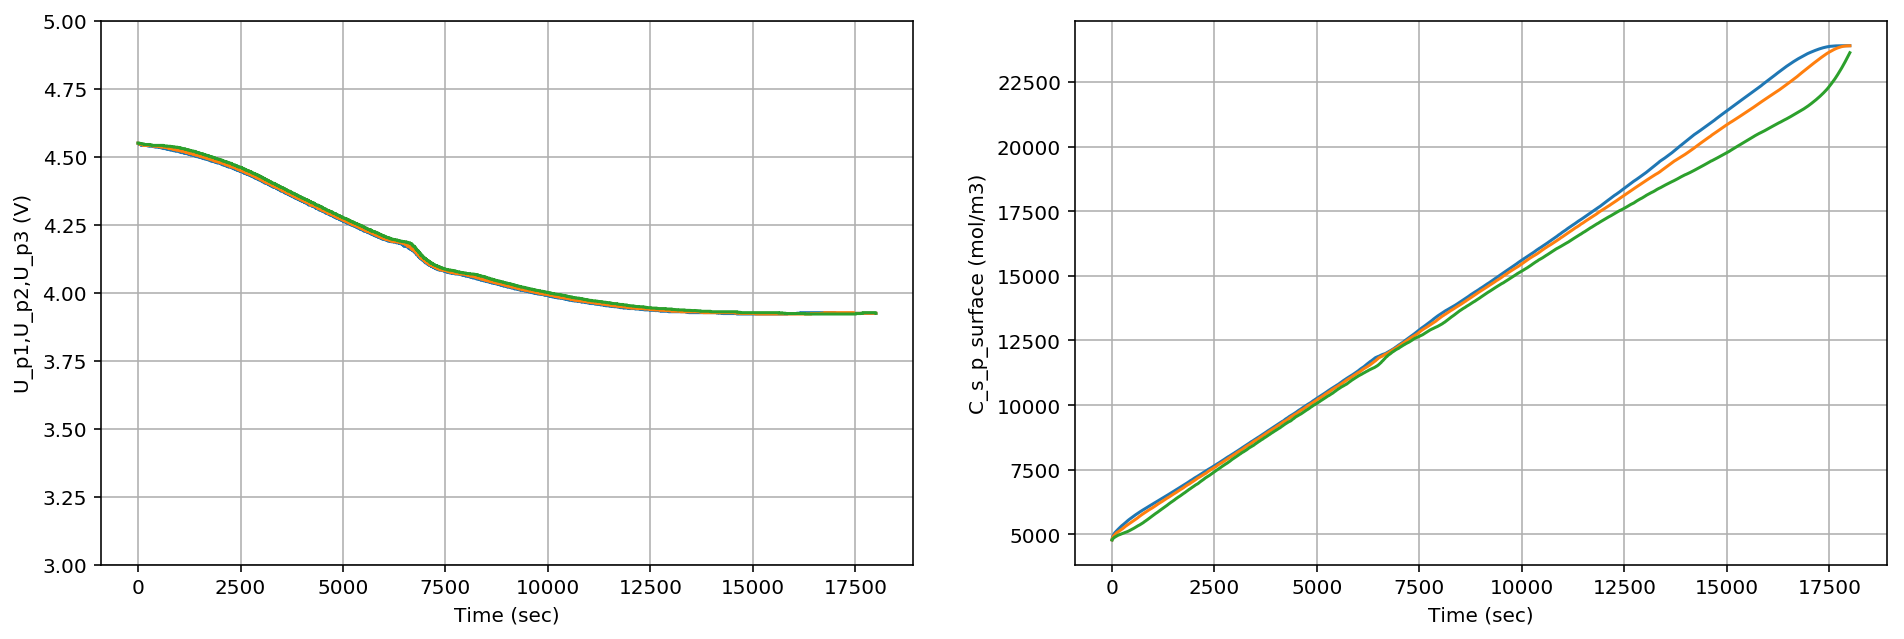

In [56]:

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16, 5))

ax1.plot(df_sim['Time (sec)'], df_sim['U_p1'],color=new_colors[0])
ax1.plot(df_sim['Time (sec)'], df_sim['U_p2'],color=new_colors[1])
ax1.plot(df_sim['Time (sec)'], df_sim['U_p3'],color=new_colors[2])
ax1.set_ylim([3, 5])
ax1.set_ylabel('U_p1,U_p2,U_p3 (V)')
ax1.set_xlabel('Time (sec)')
ax1.grid()

ax2.plot(df_sim['Time (sec)'], df_sim['C_s_p1_surface'],color=new_colors[0])
ax2.plot(df_sim['Time (sec)'], df_sim['C_s_p2_surface'],color=new_colors[1])
ax2.plot(df_sim['Time (sec)'], df_sim['C_s_p3_surface'],color=new_colors[2])


#ax2.set_ylim([0, 2])
ax2.set_ylabel('C_s_p_surface (mol/m3)')
ax2.set_xlabel('Time (sec)')
ax2.grid()
plt.show()

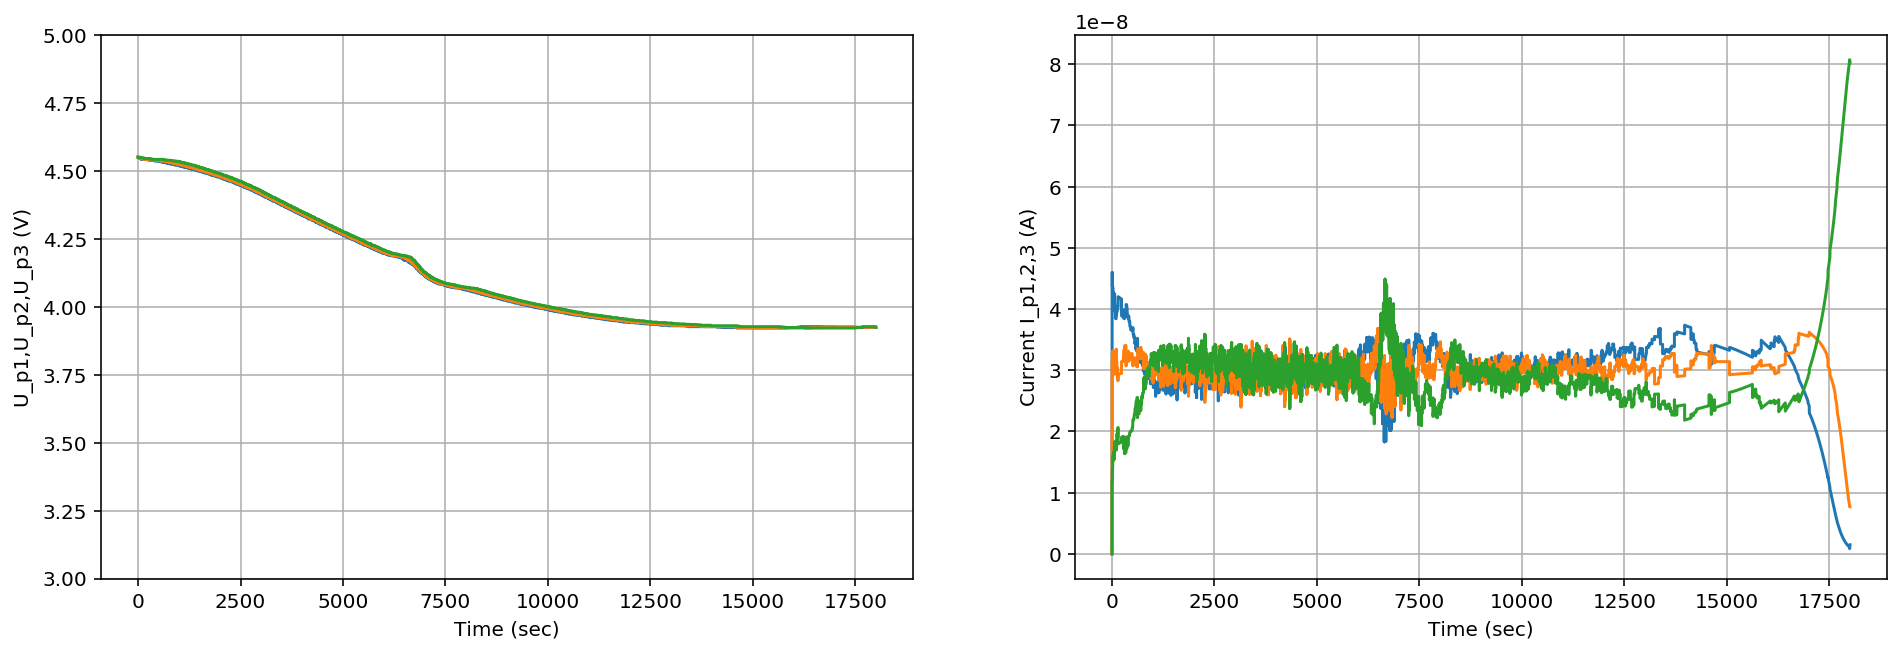

In [57]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16, 5))

ax1.plot(df_sim['Time (sec)'], df_sim['U_p1'],color=new_colors[0])
ax1.plot(df_sim['Time (sec)'], df_sim['U_p2'],color=new_colors[1])
ax1.plot(df_sim['Time (sec)'], df_sim['U_p3'],color=new_colors[2])
ax1.set_ylim([3, 5])
ax1.set_ylabel('U_p1,U_p2,U_p3 (V)')
ax1.set_xlabel('Time (sec)')
ax1.grid()

ax2.plot(df_sim['Time (sec)'], df_sim['I_p1'],color=new_colors[0])
ax2.plot(df_sim['Time (sec)'], df_sim['I_p2'],color=new_colors[1])
ax2.plot(df_sim['Time (sec)'], df_sim['I_p3'],color=new_colors[2])


#ax2.set_ylim([0, 2])
ax2.set_ylabel('Current I_p1,2,3 (A)')
ax2.set_xlabel('Time (sec)')
ax2.grid()
plt.show()

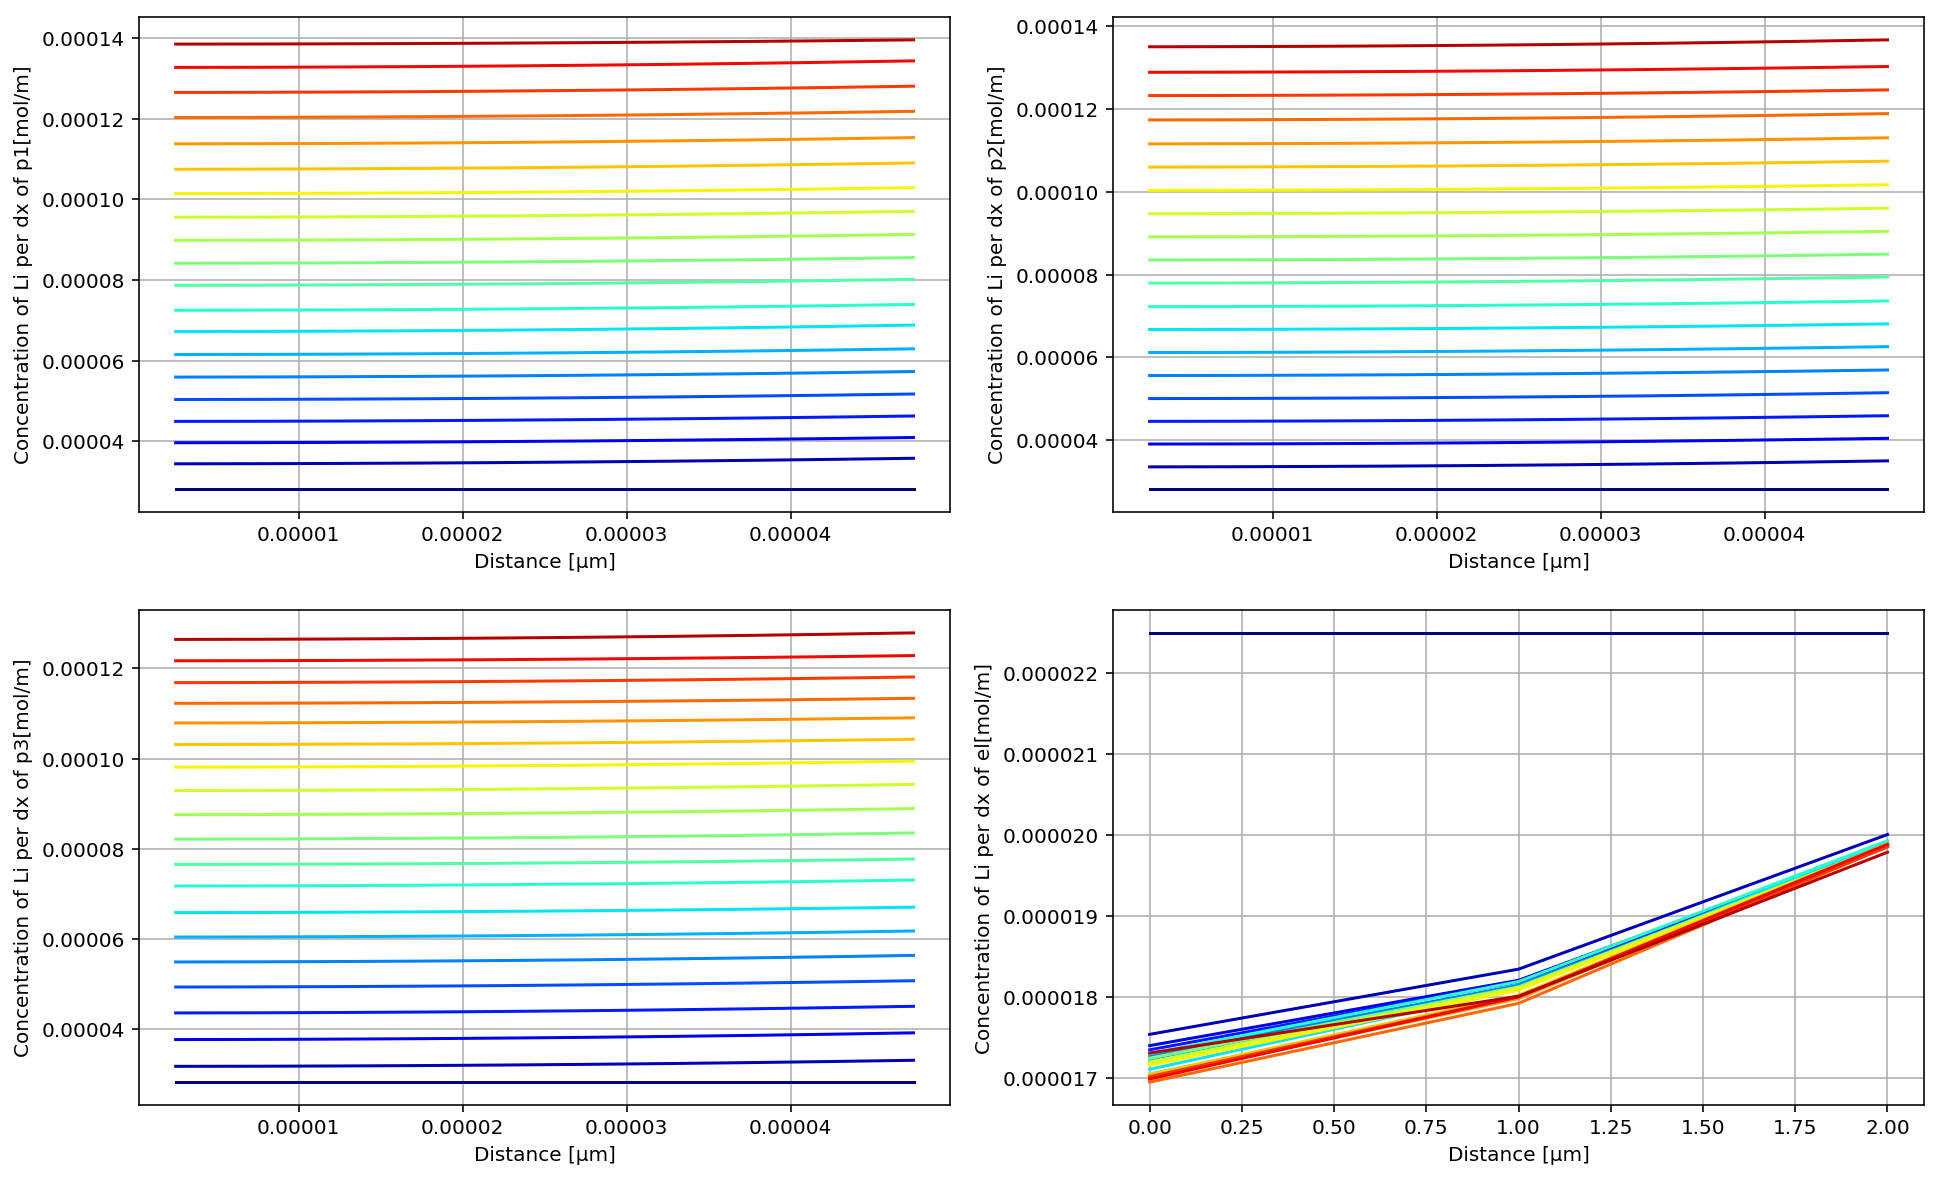

In [53]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(16, 10))

for ii in range(20):
  ax1.plot(x_rlt_s_p1[0], C_rlt_s_p1[0+ii*int(len(t)/20)],color=cm.jet(ii/20))
  ax2.plot(x_rlt_s_p2[0], C_rlt_s_p2[0+ii*int(len(t)/20)],color=cm.jet(ii/20))
  ax3.plot(x_rlt_s_p3[0], C_rlt_s_p3[0+ii*int(len(t)/20)],color=cm.jet(ii/20))
  #ax1.set_ylim([3, 5])
  #ax1.set_ylabel('Concentration of Li per dx of p1[mol/m]')
  #ax1.set_xlabel('Distance [μm]')
  #ax1.grid()

  ax4.plot(np.arange(3), C_rlt_el_p[0+ii*int(len(t)/20)],color=cm.jet(ii/20))

ax1.set_ylabel('Concentration of Li per dx of p1[mol/m]')
ax1.set_xlabel('Distance [μm]')
ax1.grid()
ax2.set_ylabel('Concentration of Li per dx of p2[mol/m]')
ax2.set_xlabel('Distance [μm]')
ax2.grid()
ax3.set_ylabel('Concentration of Li per dx of p3[mol/m]')
ax3.set_xlabel('Distance [μm]')
ax3.grid()
ax4.set_ylabel('Concentration of Li per dx of el[mol/m]')
ax4.set_xlabel('Distance [μm]')
ax4.grid()
plt.show()

## Appendix, Memo

In [160]:
n = 10
dx = L_p/n

j_p=df_sim["I_p1"][tt]/S_p


#t_total = 60*60*5 #[sec] run time
#dt = 0.05 #[sec] Time partitions
#t_total +=dt
# Make an array with positions of middle of each partition
x = np.linspace(dx/2, L_p - dx/2,n)

# Initialize rod to initial temperature distribution.
C = np.ones(len(x))*C_s_p_0*V_p/L_p
dCdt = np.empty(n)

t = np.arange(0,t_total+dt,dt)

#time_rlt = np.zeros((len(t)+1))
x_rlt = np.zeros((1,len(x)))
C_rlt = np.zeros((len(t)+1,len(C)))


tt=0
x_rlt[tt] = x
C_rlt[tt] = C

tt=1
for i in range(1,n-1):

    # Applying discrete definition of second derivative
    dCdt[i] = D_p*((C[i+1] - C[i])/dx - (C[i] - C[i-1])/dx)/dx
        
# Taking into account boundary condition. ie. T[0-1] DNE
dCdt[0] = D_p*((C[1] - C[0])/dx)/dx
dCdt[n-1] = D_p*(j_p*S_p/F/D_p - (C[n-1] - C[n-2])/dx)/dx
    
# Update temperature data for rod
C = C + dCdt * dt

time_rlt[tt] = (tt)*dt
#x_rlt[tt] = x #
C_rlt[tt] = C #concentration per dx

print(time_rlt)
print(x_rlt)
print(C_rlt)

[0.   0.05 0.   ... 0.   0.   0.  ]
[[2.50e-06 7.50e-06 1.25e-05 1.75e-05 2.25e-05 2.75e-05 3.25e-05 3.75e-05
  4.25e-05 4.75e-05]]
[[2.82015746e-05 2.82015746e-05 2.82015746e-05 ... 2.82015746e-05
  2.82015746e-05 2.82015746e-05]
 [2.82015746e-05 2.82015746e-05 2.82015746e-05 ... 2.82015746e-05
  2.82015746e-05 2.82046626e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [166]:
x_rlt[0]*1E6

array([ 2.5,  7.5, 12.5, 17.5, 22.5, 27.5, 32.5, 37.5, 42.5, 47.5])

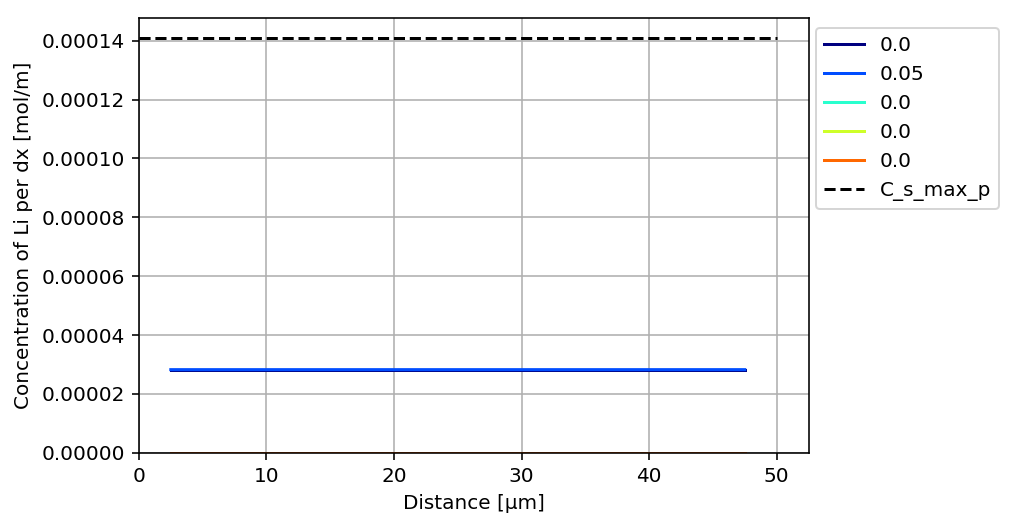

In [170]:
for ii in range(5):
    plt.plot(x_rlt[0]*1E6,C_rlt[ii], label = time_rlt[ii],color=cm.jet(ii/5))
plt.plot(([0,50]),([C_s_max_p*V_p/L_p,C_s_max_p*V_p/L_p]),'--',label='C_s_max_p',color='black')
plt.legend(loc='upper right',
           bbox_to_anchor=(0.9, 0.9, 0.4, .100))
plt.ylabel('Concentration of Li per dx [mol/m]')
plt.xlabel('Distance [μm]')
plt.gca().set_xlim(left=0)
plt.gca().set_ylim(bottom=0)#.xlim(0,100)
plt.grid()
plt.show()

In [0]:
from scipy.optimize import fsolve
import math

#Number of particles of positive active material
n_particle_p = 3
#Number of particles of negative active material
n_particle_n = 3

p0 = I_1, I_2, I_3 
p0 = np.append(p0,Dphi_elpn)

def equations(p,p0=p0,
              I_=n_particle_p*I,
              S_pn = S_p,
              k_o_pn = k_o_p,
              dx = L_p/n_particle_p,
              C_el_pn1 = C_e_0,
              C_el_pn2 = C_e_0,
              C_el_pn3 = C_e_0,
             C_s_max_pn1 = C_s_max_p,C_s_max_pn2 = C_s_max_p,C_s_max_pn3 = C_s_max_p,
             C_s_pn1_surface = C_s_p_0, C_s_pn2_surface = C_s_p_0, C_s_pn3_surface = C_s_p_0,
             R_s_pn = R_s_p,df_cell=df_cell,
             z=z, F=F,R=R,T=T, alpha=alpha,
             epsilon_e=epsilon_e, brugg_e=brugg_e,
             t_plus=t_plus):
  #ii=9
  #if ii==0:
  #  p0 = I_1, I_2, I_3 
  #  p0 = np.append(p0,Dphi_elpn)
  #ii+=1
  p0 = p
  
  
  U_pn1 = df_cell['Cathode OCV (V)'][0]
  j_pn1 = (I_1)/S_pn  
  j_0_pn1 = z*F*k_o_pn*C_el_pn1**alpha*(C_s_max_pn1 - C_s_pn1_surface)**alpha*(C_s_pn1_surface)**alpha#[A/m2]  
  DV_eta_pn1 = (R*T)/(alpha*z*F)*math.log(j_pn1/(2*j_0_pn1) + ((j_pn1/(2*j_0_pn1))**2 + 1)**0.5)  
  
  
  
  U_pn2 = df_cell['Cathode OCV (V)'][0]
  U_pn3 = df_cell['Cathode OCV (V)'][0]

  j_pn2 = (I_2)/S_pn
  j_pn3 = (I_3)/S_pn
  

  j_0_pn2 = z*F*k_o_pn*C_el_pn2**alpha*(C_s_max_pn2 - C_s_pn2_surface)**alpha*(C_s_pn2_surface)**alpha#[A/m2]
  j_0_pn3 = z*F*k_o_pn*C_el_pn3**alpha*(C_s_max_pn3 - C_s_pn3_surface)**alpha*(C_s_pn3_surface)**alpha#[A/m2]
  

  DV_eta_pn2 = (R*T)/(alpha*z*F)*math.log(j_pn2/(2*j_0_pn2) + ((j_pn2/(2*j_0_pn2))**2 + 1)**0.5)
  DV_eta_pn3 = (R*T)/(alpha*z*F)*math.log(j_pn3/(2*j_0_pn3) + ((j_pn3/(2*j_0_pn3))**2 + 1)**0.5)
  
  Dphi_spn32 = R_s_pn * dx * (I_2 + I_3)
  Dphi_spn21 = R_s_pn * dx * (I_2)
  
  Dphi_elpn32 = -(I_1 + I_2)*dx/kappa_e((C_el_pn3+C_el_pn2)/2, epsilon_e, brugg_e) + 2*R*T/F*(0.5 - t_plus)*(np.log(C_el_pn3) - np.log(C_el_pn2))
  Dphi_elpn21 = -(I_1)*dx/kappa_e((C_el_pn2+C_el_pn1)/2, epsilon_e, brugg_e) + 2*R*T/F*(0.5 - t_plus)*(np.log(C_el_pn3) - np.log(C_el_pn2))
  
  f1 = Dphi_spn21 + Dphi_spn32 - U_pn3 + DV_eta_pn3 - Dphi_elpn
  f2 = Dphi_spn21 - U_pn2 + DV_eta_pn2 + Dphi_elpn32- Dphi_elpn
  f3 = -U_pn1 + DV_eta_pn1 + Dphi_elpn32 + Dphi_elpn21- Dphi_elpn
  f4 = I_1 + I_2 + I_3 - I_
 
  return (f1, f2, f3, f4)


In [115]:
p0

array([9.93164596e-09, 9.93164596e-09, 9.93164596e-09, 0.00000000e+00])

In [116]:
n_particle_p*I

8.938481362442803e-08

In [114]:
I_1, I_2, I_3, Dphi_elpn= fsolve(equations, (I/3, I/3, I/3, 0))
print(equations((I_1, I_2, I_3, Dphi_elpn)))
print(I_1)
print(I_2)
print(I_3)
print(Dphi_elpn)

(-4.546995289476592, -4.546995289515581, -4.546995289535077, -5.958987574961869e-08)
9.931645958269781e-09
9.931645958269781e-09
9.931645958269781e-09
0.0


/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [0]:
#sympyではeta を2つ以上logにするとうごかない

I_1 = sympy.Symbol('I_1',positive=True)
I_2 = sympy.Symbol('I_2',positive=True)
I_3 = sympy.Symbol('I_3',positive=True)
Dphi_elpn = sympy.Symbol('Dphi_elpn')

I_ = I
S_pn = S_p
k_o_pn = k_o_p
dx = L_p/3

C_el_pn1 = C_e_0
C_el_pn2 = C_e_0
C_el_pn3 = C_e_0

C_s_max_pn1 = C_s_max_p
C_s_max_pn2 = C_s_max_p
C_s_max_pn3 = C_s_max_p

C_s_pn1_surface = C_s_p_0 
C_s_pn2_surface = C_s_p_0 
C_s_pn3_surface = C_s_p_0 

R_s_pn = R_s_p 

U_pn1 = df_cell['Cathode OCV (V)'][0]
U_pn2 = df_cell['Cathode OCV (V)'][0]
U_pn3 = df_cell['Cathode OCV (V)'][0]



#I = I_1 + I_2 + I_3

j_pn1 = (I_1)/S_pn
j_pn2 = (I_2)/S_pn
j_pn3 = (I_3)/S_pn


j_0_pn1 = z*F*k_o_pn*C_el_pn1**alpha*(C_s_max_pn1 - C_s_pn1_surface)**alpha*(C_s_pn1_surface)**alpha#[A/m2]
j_0_pn2 = z*F*k_o_pn*C_el_pn2**alpha*(C_s_max_pn2 - C_s_pn2_surface)**alpha*(C_s_pn2_surface)**alpha#[A/m2]
j_0_pn3 = z*F*k_o_pn*C_el_pn3**alpha*(C_s_max_pn3 - C_s_pn3_surface)**alpha*(C_s_pn3_surface)**alpha#[A/m2]


DV_eta_pn1 = (R*T)/(alpha*z*F)*sympy.log(j_pn1/(2*j_0_pn1) + ((j_pn1/(2*j_0_pn1))**2 + 1)**0.5)
DV_eta_pn2 = (R*T)/(alpha*z*F)*sympy.log(j_pn2/(2*j_0_pn2) + ((j_pn2/(2*j_0_pn2))**2 + 1)**0.5)
DV_eta_pn3 = (R*T)/(alpha*z*F)*sympy.log(j_pn3/(2*j_0_pn3) + ((j_pn3/(2*j_0_pn3))**2 + 1)**0.5)

Dphi_elpn32 = -(I_1 + I_2)*dx/kappa_e((C_el_pn3+C_el_pn2)/2, epsilon_e, brugg_e) + 2*R*T/F*(0.5 - t_plus)*(np.log(C_el_pn3) - np.log(C_el_pn2))
Dphi_elpn21 = -(I_1)*dx/kappa_e((C_el_pn2+C_el_pn1)/2, epsilon_e, brugg_e) + 2*R*T/F*(0.5 - t_plus)*(np.log(C_el_pn3) - np.log(C_el_pn2))

Dphi_spn32 = R_s_pn * dx * (I_2 + I_3)
Dphi_spn21 = R_s_pn * dx * (I_2)
    

t1=time.time()
circuit2(U_pn1=U_pn1*1000,U_pn2=U_pn2*1000,U_pn3=U_pn3*1000,
         Dphi_spn21=Dphi_spn21,Dphi_spn32=Dphi_spn32,
         Dphi_elpn21=Dphi_elpn21, Dphi_elpn32=Dphi_elpn32,
         DV_eta_pn1=(10*I_1),DV_eta_pn2=(10*I_2),DV_eta_pn3=(10*I_3),
         I_1=I_1, I_2=I_2, I_3=I_3, Dphi_elpn=Dphi_elpn,I=I_*1e9)
print(f"{int(time.time()-t1)}sec")  

In [0]:
def diffusion_in_solid_initial(L, V, C_s_0, n=10, t_total=60*60*5, dt=0.05):
    dr = L/n
    # Make an array with positions of middle of each partition
    r = np.linspace(dr/2, L - dr/2,n)
    # Initialize rod to initial temperature distribution.
    C = np.ones(len(r))*C_s_0#*4*np.pi*r**2    #[mol/m3]
    dCdt = np.empty(n)
    
    t = np.arange(0,t_total,dt)
    time_rlt = np.zeros((len(t)+1))
    r_rlt = np.zeros((len(t)+1,len(r)))
    C_rlt = np.zeros((len(t)+1,len(C)))
 
    r_rlt[0] = r
    C_rlt[0] = C
    
    return dr, r, C, dCdt, time_rlt, r_rlt, C_rlt

In [0]:
def diffusion_in_solid_update(L, S, D, j, time_rlt, C_rlt, dCdt, time_before, n=10, t_total=60*60*5, dt=0.05):
    
    #L: Radius of particle
    #V: Volume of particle
    #S: Surface area of particle
    #D: Diffusion coefficient of particle
    #C_s_0: Li concentration at t=0[sec]
    #j: Current density at particle surface
    #n: Number of partitions of rod.
    #t_total: Total charge/discharge time
    #dt: delta time
    #time_before: time one step before [sec] 
    
    dr = L/n
    t_total +=dt
    
    jj = int(time_before/dt + 1)
    
    time_now = round(time_before + dt,5)
    C = C_rlt[int(round(time_before/dt,0))]
    for i in range(1,n-1):

        # Applying discrete definition of second derivative
#        dCdt[i] = D*(2/((i+1)*dr)*(C[i+1] - C[i])/dr) + D*((C[i+1] - C[i])/dr - (C[i] - C[i-1])/dr)/dr
        dCdt[i] = D*((C[i+1] - C[i])/dr - (C[i] - C[i-1])/dr)/dr
      
    # Taking into account boundary condition. ie. T[0-1] DNE
    #dCdt[0] = D*(2/(1*dr)*(C[1] - C[0])/dr) + D*((C[1] - C[0])/dr)/dr
    #dCdt[n-1] = D*(2/(n*dr)*(j/F/D)) + D*(j/F/D - (C[n-1] - C[n-2])/dr)/dr
    dCdt[0] = D*((C[1] - C[0])/dr)/dr
    dCdt[n-1] = D*(j*S/F/D - (C[n-1] - C[n-2])/dr)/dr
    
    C = C + dCdt * dt
    #print(C)

    time_rlt[jj] = time_now 
    C_rlt[jj] = C #concentration per dx
    
    return time_rlt, C_rlt, time_now 
    

In [0]:
t_total=60*60*5
dt=0.05
dr_p1, r_p1, C_p1, dCdt_p1, time_rlt_p1, r_rlt_p1, C_rlt_p1 = diffusion_in_solid_initial(
    L=L_p, V=V_p, C_s_0=C_s_p_0, n=10, t_total=t_total, dt=dt)
print(dr_p1)
print(r_p1)
print(dCdt_p1)
print(time_rlt_p1)
print(r_rlt_p1)
print(C_rlt_p1)

5e-06
[  2.50000000e-06   7.50000000e-06   1.25000000e-05   1.75000000e-05
   2.25000000e-05   2.75000000e-05   3.25000000e-05   3.75000000e-05
   4.25000000e-05   4.75000000e-05]
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
[ 0.  0.  0. ...,  0.  0.  0.]
[[  2.50000000e-06   7.50000000e-06   1.25000000e-05 ...,   3.75000000e-05
    4.25000000e-05   4.75000000e-05]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 ..., 
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]]
[[ 4787.648  4787.648  4787.648 ...,  4787.648  4787.648  4787.648]

In [0]:
time_rlt_p1, C_rlt_p1, time_now_p1 = diffusion_in_solid_update(
    L=L_p, S=S_p, D=D_p, j=j_p, time_rlt=time_rlt_p1, C_rlt=C_rlt_p1,
    dCdt=dCdt_p1, time_before=0, n=10, t_total=60*60*5, dt=0.05)

In [0]:
time_now_p1
time_rlt_p1

array([ 0.  ,  0.05,  0.1 , ...,  0.  ,  0.  ,  0.  ])

In [0]:
time_rlt_p1, C_rlt_p1, time_now_p1 = diffusion_in_solid_update(
    L=L_p, S=S_p, D=D_p, j=j_p, time_rlt=time_rlt_p1, C_rlt=C_rlt_p1,
    dCdt=dCdt_p1, time_before=time_now_p1, n=10, t_total=60*60*5, dt=0.05)

In [0]:
C_rlt

array([[  4.78764800e+03,   4.78764800e+03,   4.78764800e+03, ...,
          4.78764800e+03,   4.78764800e+03,   4.78764800e+03],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   3.08802768e-09],
       ..., 
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00]])

In [0]:
time_now_p1=0.05
for kk in range(15):
    time_rlt_p1, C_rlt_p1, time_now_p1 = diffusion_in_solid_update(L=L_p, S=S_p, D=D_p, j=j_p, time_rlt=time_rlt_p1, C_rlt=C_rlt_p1, dCdt=dCdt_p1, time_before=time_now_p1, n=10, t_total=60*60*5, dt=0.05)

time_before
0.05
0.1
[ 4787.648  4787.648  4787.648  4787.648  4787.648  4787.648  4787.648
  4787.648  4787.648  4787.648]
1
time_before
0.1
0.15
[ 4787.648       4787.648       4787.648       4787.648       4787.648
  4787.648       4787.648       4787.648       4787.648       4787.64800001]
2
time_before
0.15
0.2
[ 4787.648       4787.648       4787.648       4787.648       4787.648
  4787.648       4787.648       4787.648       4787.648       4787.64800001]
3
time_before
0.2
0.25
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
4
time_before
0.25
0.3
[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   3.08802768e-09]
5
time_before
0.3
0.35
[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   3.08802768e-11   6.14517508e-09]
6
time_before
0.35
0.4
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
7
time_bef

Fick'S second law
\begin{eqnarray*}
\frac{\partial C_s(x,r,t)}{\partial t} = D_s \left( \frac{2}{r}\frac{\partial C_s(x,r,t)}{\partial r} + \frac{\partial^2 C_s(x,r,t)}{\partial r^2}\right)
\end{eqnarray*}
Boundary condition and initial condition
\begin{eqnarray*}
\frac{\partial C_s(x,r=0,t)}{\partial t} = 0\\
\frac{\partial C_s(x,r=L_s,t)}{\partial t} = j(x,t)\\
C_s(x,r,t=0)=C_{s,0}
\end{eqnarray*}

Fick'S second law
\begin{eqnarray*}
\frac{\partial C_s(x,t)}{\partial t} = D_s\frac{\partial^2 C_s(x,t)}{\partial x^2}
\end{eqnarray*}
Boundary condition and initial condition
\begin{eqnarray*}
\frac{\partial C_s(x=0,t)}{\partial t} = 0\\
\frac{\partial C_s(x=R_s,t)}{\partial t} = j(t)\\
C_s(x,t=0)=C_{s,0}
\end{eqnarray*}

In [0]:
C_rlt_p1[8]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

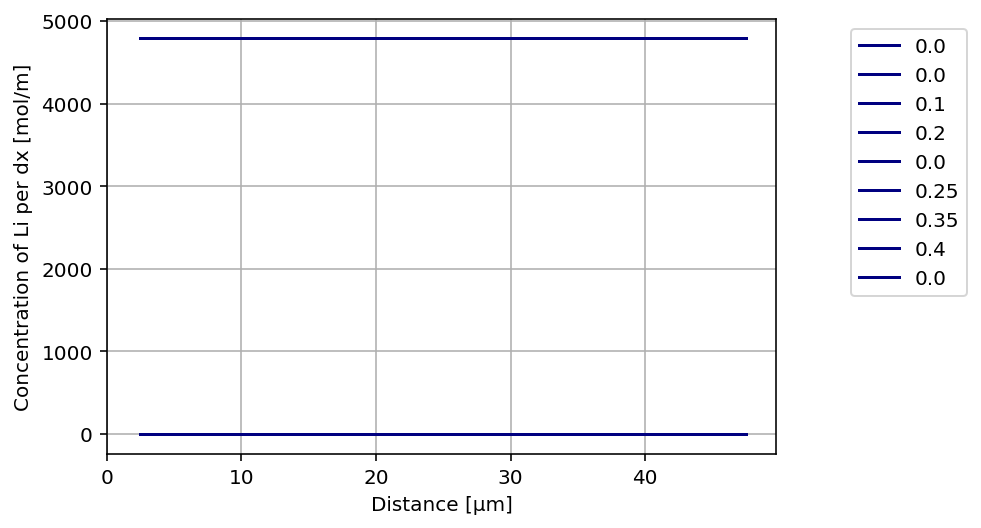

In [0]:
tt=(t_total-dt)/10000#[sec] delta time for plot
time_rlt=time_rlt_p1
x_rlt=r_rlt_p1
C_rlt=C_rlt_p1

for ii in range(9):
    plt.plot(x_rlt[0]*1E6,C_rlt[ii], label = time_rlt[ii],color=cm.jet(ii/len(time_rlt)))


#for ii in range(len(time_rlt[time_rlt % tt == 0])):
#    plt.plot(x_rlt[time_rlt % tt == 0][ii]*1E6,C_rlt[time_rlt % tt == 0][ii], label = time_rlt[time_rlt % tt == 0][ii],color=cm.jet(ii/len(time_rlt[time_rlt % tt == 0])))
#plt.plot(([0,100]),([C_s_max_p*V_p/L_p,C_s_max_p*V_p/L_p]),'--',label='C_s_max_p',color='black')
plt.legend(loc='upper right',
           bbox_to_anchor=(0.9, 0.9, 0.4, .100))
plt.ylabel('Concentration of Li per dx [mol/m]')
plt.xlabel('Distance [μm]')
plt.gca().set_xlim(left=0)
#plt.gca().set_ylim(bottom=0)#.xlim(0,100)
plt.grid()
plt.show()

In [0]:
x_rlt[time_rlt % tt == 0]

array([[  2.50000000e-06,   7.50000000e-06,   1.25000000e-05, ...,
          3.75000000e-05,   4.25000000e-05,   4.75000000e-05],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       ..., 
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00]])

In [0]:
t1 = time.time()
# Number of partitions of rod (finite elements)
n = 10
dx = L_p/n

t_total = 60*60*5 #[sec] run time
dt = 0.05 #[sec] Time partitions
t_total +=dt
# Make an array with positions of middle of each partition
x = np.linspace(dx/2, L_p - dx/2,n)

# Initialize rod to initial temperature distribution.
C = np.ones(len(x))*C_s_p_0*V_p/L_p
dCdt = np.empty(n)

t = np.arange(0,t_total,dt)

time_rlt = np.zeros((len(t)+1))
x_rlt = np.zeros((len(t)+1,len(x)))
C_rlt = np.zeros((len(t)+1,len(C)))
x_rlt[0] = x
C_rlt[0] = C

for jj in range(1,len(t)+1):
    for i in range(1,n-1):

        # Applying discrete definition of second derivative
        dCdt[i] = D_p*((C[i+1] - C[i])/dx - (C[i] - C[i-1])/dx)/dx
        
    # Taking into account boundary condition. ie. T[0-1] DNE
    dCdt[0] = D_p*((C[1] - C[0])/dx)/dx
    dCdt[n-1] = D_p*(j_p*S_p/F/D_p - (C[n-1] - C[n-2])/dx)/dx
    
    # Update temperature data for rod
    C = C + dCdt * dt

    time_rlt[jj] = (jj)*dt
    x_rlt[jj] = x #
    C_rlt[jj] = C #concentration per dx
    if jj % divmod(len(t), 10)[0] == 0:
        print('{}'.format(jj/(len(t)-1)*100),'% processed ')

t2 = time.time()
print('{:.2}'.format(t2-t1),'sec')

10.0 % processed 
20.0 % processed 
30.0 % processed 
40.0 % processed 
50.0 % processed 
60.0 % processed 
70.0 % processed 
80.0 % processed 
90.0 % processed 
100.0 % processed 
4.7 sec


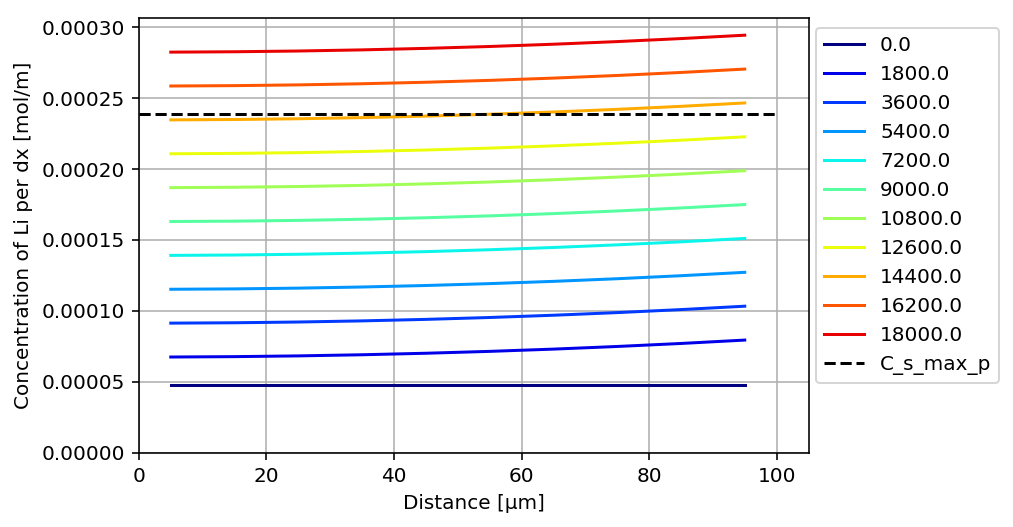

In [0]:
tt=(t_total-dt)/10#[sec] delta time for plot
for ii in range(len(time_rlt[time_rlt % tt == 0])):
    plt.plot(x_rlt[time_rlt % tt == 0][ii]*1E6,C_rlt[time_rlt % tt == 0][ii], label = time_rlt[time_rlt % tt == 0][ii],color=cm.jet(ii/len(time_rlt[time_rlt % tt == 0])))
plt.plot(([0,100]),([C_s_max_p*V_p/L_p,C_s_max_p*V_p/L_p]),'--',label='C_s_max_p',color='black')
plt.legend(loc='upper right',
           bbox_to_anchor=(0.9, 0.9, 0.4, .100))
plt.ylabel('Concentration of Li per dx [mol/m]')
plt.xlabel('Distance [μm]')
plt.gca().set_xlim(left=0)
plt.gca().set_ylim(bottom=0)#.xlim(0,100)
plt.grid()
plt.show()

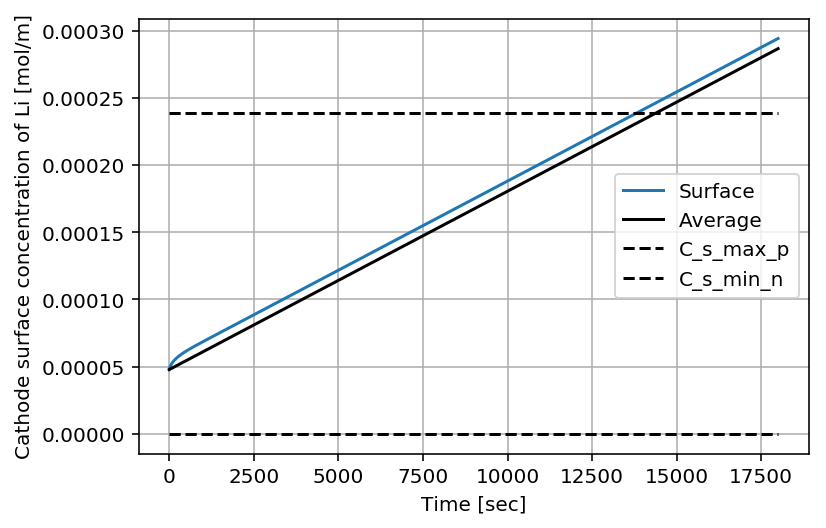

In [0]:
plt.plot(time_rlt,C_rlt[:,-1], label='Surface')
plt.plot(([0,t_total]), ([sum(C_rlt[0,:])/n, sum(C_rlt[-1,:])/n]), color = 'black', label='Average')
plt.plot(([0,t_total]),([C_s_max_p*V_p/L_p,C_s_max_p*V_p/L_p]),'--',label='C_s_max_p',color='black')
plt.plot(([0,t_total]),([0, 0]),'--',label='C_s_min_n',color='black')
plt.ylabel('Cathode surface concentration of Li [mol/m]')
plt.xlabel('Time [sec]')
plt.legend()
plt.grid()
plt.show()

In [0]:
# Convert concentration to x stoichiometric ratio of cathode.
slr_p = LinearRegression()
X_p = np.array([sum(C_rlt[0,:])/n/(V_p/L_p), 0])
y_p = np.array([min(df_cell['Cathode x (-)']), 0])
X_p = X_p.reshape(-1, 1)
y_p = y_p.reshape(-1, 1)
slr_p.fit(X_p, y_p)

/Users/takumkawahara/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [0]:
t1 = time.time()
# Number of partitions of rod (finite elements)
n = 16
dx = L_n/n

t_total = 60*60*5 #[sec] run time
dt = 0.05 #[sec] Time partitions
t_total +=dt
# Make an array with positions of middle of each partition
x = np.linspace(dx/2, L_n - dx/2,n)

# Initialize rod to initial temperature distribution.
C = np.ones(len(x))*C_s_n_0*V_n/L_n
dCdt = np.empty(n)

t = np.arange(0,t_total,dt)

time_rlt_n = np.zeros(len(t)+1)
x_rlt_n = np.zeros((len(t)+1,len(x)))
C_rlt_n = np.zeros((len(t)+1,len(C)))

x_rlt_n[0] = x
C_rlt_n[0] = C

for jj in range(1,len(t)+1):
    for i in range(1,n-1):

        # Applying discrete definition of second derivative
        dCdt[i] = D_n*((C[i+1] - C[i])/dx - (C[i] - C[i-1])/dx)/dx
        
    # Taking into account boundary condition. ie. T[0-1] DNE
    dCdt[0] = D_n*((C[1] - C[0])/dx)/dx
    dCdt[n-1] = D_n*(-j_n*S_n/F/D_n - (C[n-1] - C[n-2])/dx)/dx
    
    # Update temperature data for rod
    C = C + dCdt * dt

    time_rlt_n[jj] = (jj)*dt
    x_rlt_n[jj] = x #
    C_rlt_n[jj] = C #concentration per dx
    if jj % divmod(len(t), 10)[0] == 0:
        print('{}'.format(jj/(len(t)-1)*100),'% processed ')

t2 = time.time()
print('{:.2}'.format(t2-t1),'sec')

10.0 % processed 
20.0 % processed 
30.0 % processed 
40.0 % processed 
50.0 % processed 
60.0 % processed 
70.0 % processed 
80.0 % processed 
90.0 % processed 
100.0 % processed 
7.5 sec


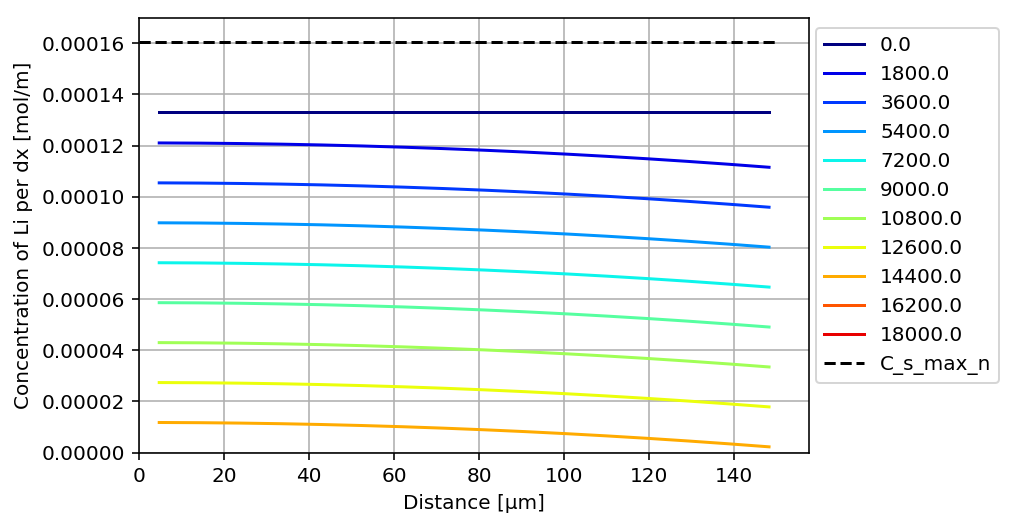

In [0]:
tt=(t_total-dt)/10#[sec] delta time for plot
for ii in range(len(time_rlt_n[time_rlt_n % tt == 0])):
    plt.plot(x_rlt_n[time_rlt_n % tt == 0][ii]*1E6,C_rlt_n[time_rlt_n % tt == 0][ii], label = time_rlt_n[time_rlt_n % tt == 0][ii],color=cm.jet(ii/len(time_rlt_n[time_rlt_n % tt == 0])))
plt.plot(([0,150]),([C_s_max_n*V_n/L_n,C_s_max_n*V_n/L_n]),'--',label='C_s_max_n',color='black')
plt.legend(loc='upper right',
           bbox_to_anchor=(0.9, 0.9, 0.4, .100))
plt.ylabel('Concentration of Li per dx [mol/m]')
plt.xlabel('Distance [μm]')
plt.gca().set_ylim(bottom=0)
plt.gca().set_xlim(left=0)
plt.grid()
plt.show()

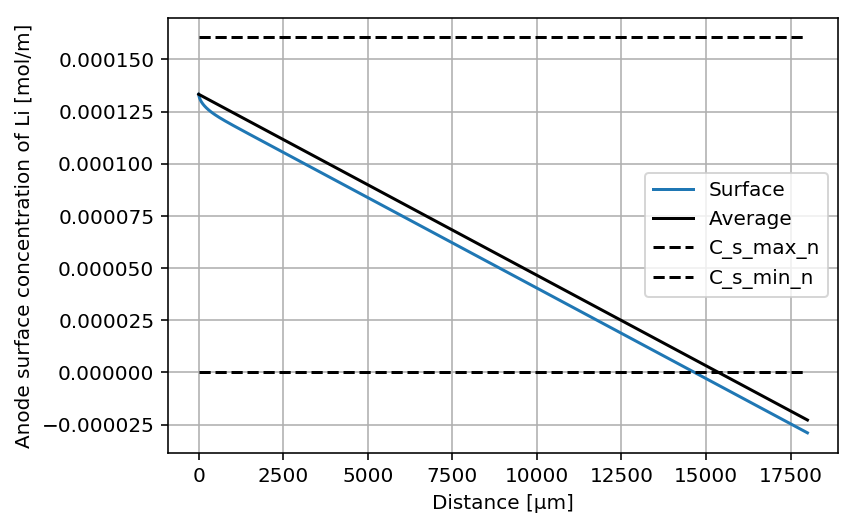

In [0]:
plt.plot(time_rlt_n,C_rlt_n[:,-1], label='Surface')
plt.plot(([0,t_total]), ([sum(C_rlt_n[0,:])/n, sum(C_rlt_n[-1,:])/n]), color = 'black', label='Average')
plt.plot(([0,t_total]),([C_s_max_n*V_n/L_n,C_s_max_n*V_n/L_n]),'--',label='C_s_max_n',color='black')
plt.plot(([0,t_total]),([0, 0]),'--',label='C_s_min_n',color='black')
plt.ylabel('Anode surface concentration of Li [mol/m]')
plt.xlabel('Distance [μm]')
plt.legend()
plt.grid()
plt.show()

In [0]:
# Convert concentration to x stoichiometric ratio of anode.
slr_n = LinearRegression()
X_n = np.array([sum(C_rlt_n[0,:])/n/(V_n/L_n), 0])
y_n = np.array([min(df_cell['Anode x (-)']), 1])
X_n = X_n.reshape(-1, 1)
y_n = y_n.reshape(-1, 1)
slr_n.fit(X_n, y_n)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [0]:
df_sim = pd.DataFrame(time_rlt)
df_sim.columns = ['Time (sec)']
df_sim['C_s_p_surface (mol/m3)'] = C_rlt[:,-1]/(V_p/L_p) # Li concentration at the surface of positive electrode material
df_sim['C_s_n_surface (mol/m3)'] = C_rlt_n[:,-1]/(V_n/L_n) # Li concentration at the surface of positive electrode material

df_sim['Cathode x of surface (-)'] = slr_p.predict(np.array(df_sim['C_s_p_surface (mol/m3)']).reshape(-1, 1))
df_sim['Anode x of surface (-)'] = slr_n.predict(np.array(df_sim['C_s_n_surface (mol/m3)']).reshape(-1, 1))
df_sim['Cathode current density (A/m2)'] = j_p
df_sim['Anode current density (A/m2)'] = j_n
df_sim['Cathode capacity (Ah)'] = df_sim['Time (sec)'] * df_sim['Cathode current density (A/m2)']*S_p/(60*60)
df_sim['Anode capacity (Ah)'] = df_sim['Time (sec)'] * df_sim['Anode current density (A/m2)']*S_n/(60*60)

if max((df_sim['Cathode capacity (Ah)'] - df_sim['Anode capacity (Ah)'])**2) == 0:
    print('OK')
else:
    raise Exception('Error!, Capacity calculated from cathode and that from anode is not coincident.')

df_sim['DOD'] = df_sim['Cathode capacity (Ah)']/Full_cap*100


df_sim = pd.merge_asof(df_sim, df_LCO_OCV, on='DOD', direction='nearest')
df_sim = pd.merge_asof(df_sim, df_LiC6_OCV, on='DOD', direction='nearest')
df_sim.columns = ['Time (sec)', 'C_s_p_surface (mol/m3)', 'C_s_n_surface (mol/m3)','Cathode x of surface (-)','Anode x of surface (-)', 'Cathode current density (A/m2)', 'Anode current density (A/m2)', 'Cathode capacity (Ah)', 'Anode capacity (Ah)', 'DOD (%)', 'Cathode x (-)', 'Cathode OCV (V)', 'Anode x (-)', 'Anode OCV (V)']
df_sim['Cell OCV (V)'] = (df_sim['Cathode OCV (V)']  - df_sim['Anode OCV (V)'])

df_tmp = df_LCO_OCV[['x', 'Potential(V)']]
df_tmp.columns = ['Cathode x of surface (-)','Cathode surface OCV (V)']
df_sim = pd.merge_asof(df_sim, df_tmp, on='Cathode x of surface (-)', direction='nearest')
df_tmp = df_LiC6_OCV[['x', 'Potential(V)']]
df_tmp.columns = ['Anode x of surface (-)','Anode surface OCV (V)']
df_sim = pd.merge_asof(df_sim.sort_values('Anode x of surface (-)') , df_tmp, on='Anode x of surface (-)', direction='nearest')
df_sim = df_sim.sort_values('Time (sec)').reset_index(drop=True)
df_sim = df_sim[df_sim['C_s_p_surface (mol/m3)'] <= C_s_max_p]
df_sim = df_sim[df_sim['Anode x of surface (-)'] <= max(df_LiC6_OCV['x'])]
df_sim


OK


,Time (sec),C_s_p_surface (mol/m3),C_s_n_surface (mol/m3),Cathode x of surface (-),Anode x of surface (-),Cathode current density (A/m2),Anode current density (A/m2),Cathode capacity (Ah),Anode capacity (Ah),DOD (%),Cathode x (-),Cathode OCV (V),Anode x (-),Anode OCV (V),Cell OCV (V),Cathode surface OCV (V),Anode surface OCV (V)
0,0.00,4787.648000,13368.948882,0.200320,0.169631,1.28,1.28,0.000000e+00,0.000000e+00,0.000000,0.20032,4.55072,0.169631,0.034329,4.516391,4.55072,0.034329
1,0.05,4788.311313,13368.252972,0.200348,0.169674,1.28,1.28,1.777778e-12,1.777778e-12,0.000351,0.20032,4.55072,0.169631,0.034329,4.516391,4.55072,0.034329
2,0.10,4788.972968,13367.560867,0.200375,0.169717,1.28,1.28,3.555556e-12,3.555556e-12,0.000703,0.20032,4.55072,0.169631,0.034329,4.516391,4.55072,0.034329
3,0.15,4789.632973,13366.872526,0.200403,0.169759,1.28,1.28,5.333333e-12,5.333333e-12,0.001054,0.20032,4.55072,0.169631,0.034329,4.516391,4.55072,0.034329
4,0.20,4790.291336,13366.187908,0.200431,0.169802,1.28,1.28,7.111111e-12,7.111111e-12,0.001406,0.20032,4.55072,0.169631,0.034329,4.516391,4.55072,0.034329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270343,13517.15,23476.034577,994.086164,0.982261,0.938256,1.28,1.28,4.806098e-07,4.806098e-07,95.016989,0.95087,3.92489,0.901723,0.228163,3.696727,3.92698,0.522640
270344,13517.20,23476.100908,994.042669,0.982264,0.938258,1.28,1.28,4.806116e-07,4.806116e-07,95.017340,0.95087,3.92489,0.901723,0.228163,3.696727,3.92698,0.522640
270345,13517.25,23476.167239,993.999175,0.982266,0.938261,1.28,1.28,4.806133e-07,4.806133e-07,95.017692,0.95087,3.92489,0.901723,0.228163,3.696727,3.92698,0.521398
270346,13517.30,23476.233571,993.955681,0.982269,0.938264,1.28,1.28,4.806151e-07,4.806151e-07,95.018043,0.95087,3.92489,0.901723,0.228163,3.696727,3.92698,0.520155


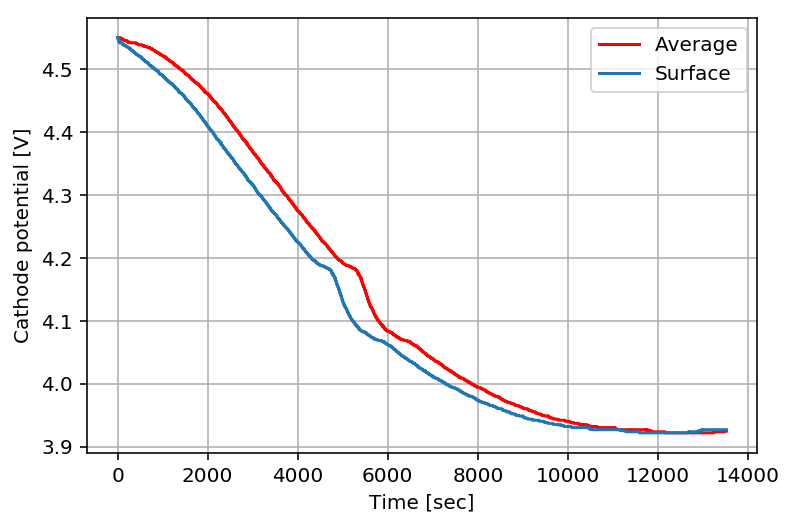

In [0]:
plt.plot(df_sim['Time (sec)'], df_sim['Cathode OCV (V)'], color = 'r', label='Average')
plt.plot(df_sim['Time (sec)'], df_sim['Cathode surface OCV (V)'], label='Surface')
plt.ylabel('Cathode potential [V]')
plt.xlabel('Time [sec]')
plt.legend()
plt.grid()
plt.show()

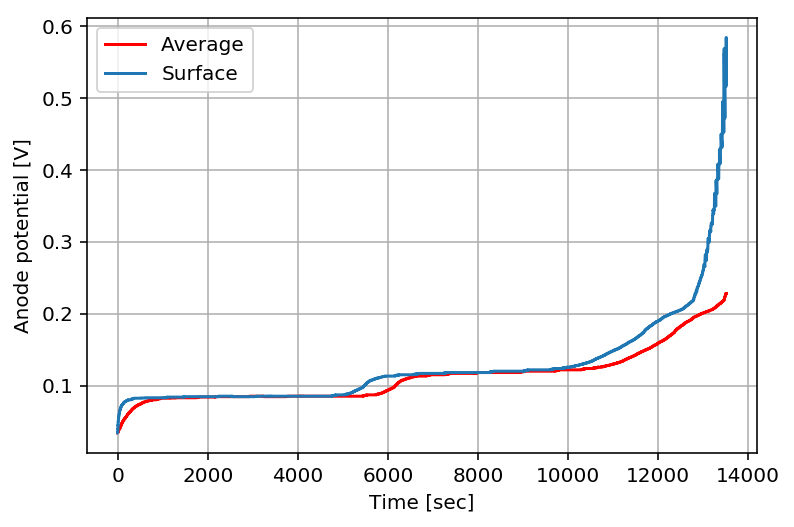

In [0]:
plt.plot(df_sim['Time (sec)'], df_sim['Anode OCV (V)'], color = 'r', label='Average')
plt.plot(df_sim['Time (sec)'], df_sim['Anode surface OCV (V)'], label='Surface')
plt.ylabel('Anode potential [V]')
plt.xlabel('Time [sec]')
plt.legend()
plt.grid()
plt.show()

## Li ion concentration in Liquid phase (Electrolyte)

In [0]:
Deff

3.75e-13

In [0]:
epsilon = 1
Deff = 7.5E-12*0.05 #[m2/sec]
t_plus = 0.363

In [0]:
t1 = time.time()
# Number of partitions of rod (finite elements)
n = 20
dx = L_el/n

t_total = 60*60*5/200 #[sec] run time
dt = 0.005 #[sec] Time partitions
t_total +=dt
# Make an array with positions of middle of each partition
x = np.linspace(dx/2, L_el - dx/2,n)

# Initialize rod to initial temperature distribution.
C = np.ones(len(x))*C_e_0*S_el
dCdt = np.empty(n)

t = np.arange(0,t_total,dt)

time_rlt = np.zeros((len(t)+1))
x_rlt = np.zeros((len(t)+1,len(x)))
C_rlt = np.zeros((len(t)+1,len(C)))
x_rlt[0] = x
C_rlt[0] = C

for jj in range(1,len(t)+1):
    for i in range(1,n-1):

        # Applying discrete definition of second derivative
        dCdt[i] = 1/epsilon*(Deff*((C[i+1] - C[i])/dx - (C[i] - C[i-1])/dx)/dx)# +　(1-t_plus)/F*j*S)
        
    # Taking into account boundary condition. ie. T[0-1] DNE
    dCdt[0] = 1/epsilon*(Deff*((C[1] - C[0])/dx)/dx - 1/dx*(1-t_plus)/F*j_p*S_p)
    dCdt[n-1] = 1/epsilon*(-Deff*((C[n-1] - C[n-2])/dx)/dx + 1/dx*(1-t_plus)/F*j_n*S_n)

    
    # Update temperature data for rod
    C = C + dCdt * dt

    time_rlt[jj] = (jj)*dt
    x_rlt[jj] = x #
    C_rlt[jj] = C #concentration per dx
    if jj % divmod(len(t), 10)[0] == 0:
        print('{}'.format(jj/(len(t)-1)*100),'% processed ')

t2 = time.time()
print('{:.2}'.format(t2-t1),'sec')

10.0 % processed 
20.0 % processed 
30.0 % processed 
40.0 % processed 
50.0 % processed 
60.0 % processed 
70.0 % processed 
80.0 % processed 
90.0 % processed 
100.0 % processed 
0.54 sec


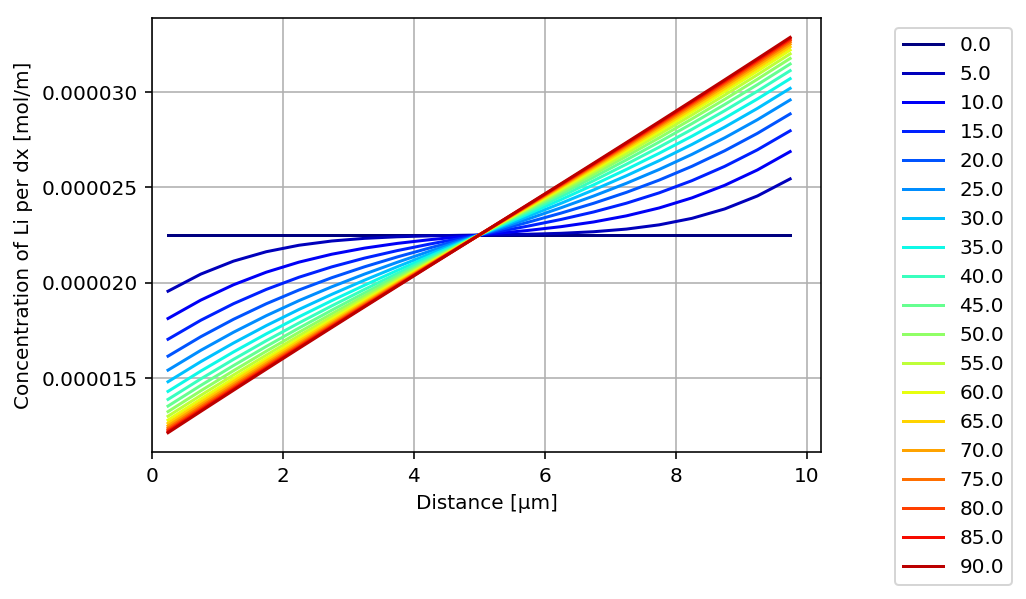

In [0]:
tt=(t_total-dt)/18#[sec] delta time for plot
for ii in range(len(time_rlt[time_rlt % tt == 0])):
    plt.plot(x_rlt[time_rlt % tt == 0][ii]*1E6,C_rlt[time_rlt % tt == 0][ii], label = time_rlt[time_rlt % tt == 0][ii],color=cm.jet(ii/len(time_rlt[time_rlt % tt == 0])))
plt.legend(loc='upper right',
           bbox_to_anchor=(0.9, 0.9, 0.4, .100))
plt.ylabel('Concentration of Li per dx [mol/m]')
plt.xlabel('Distance [μm]')
plt.gca().set_xlim(left=0)
plt.grid()
plt.show()

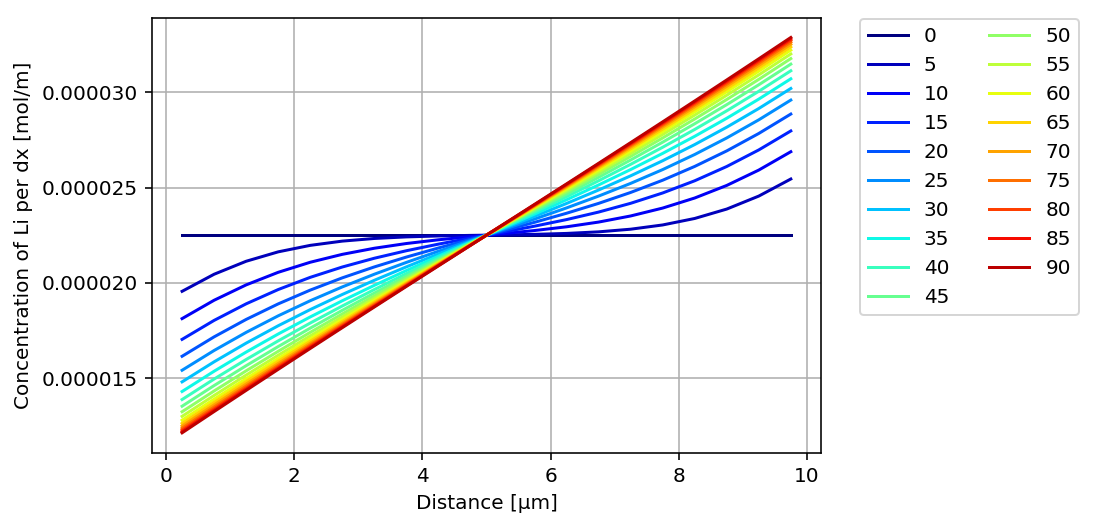

In [0]:
plot_delta_time = 5#[sec]
plot_max_time = t_total#[sec]
for ii in range(int(plot_max_time/plot_delta_time)+1):
    plt.plot(x_rlt[int(plot_delta_time/dt)*ii][:]*1E6, C_rlt[int(plot_delta_time/dt)*ii][:],color=cm.jet(ii/(int(plot_max_time/plot_delta_time)+1)), label=plot_delta_time*ii)
plt.ylabel('Concentration of Li per dx [mol/m]')
plt.xlabel('Distance [μm]')
plt.legend(loc='upper right',
           bbox_to_anchor=(1, 0.92, 0.4, .100),ncol=2)
plt.grid()
plt.show()

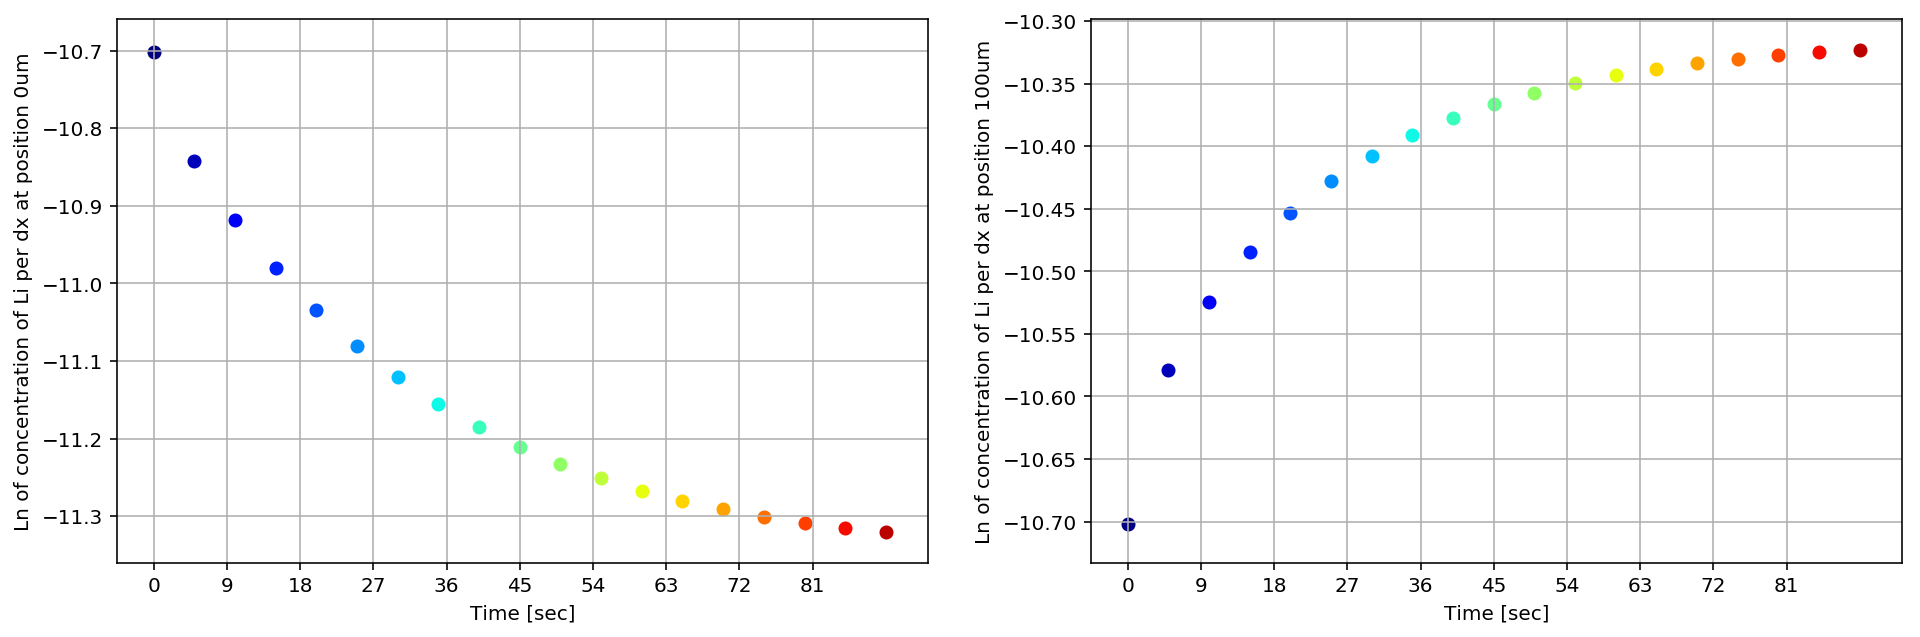

In [0]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16,5))

for ii in range(int(plot_max_time/plot_delta_time)+1):
    ax1.scatter(time_rlt[int(plot_delta_time/dt)*ii], np.log(C_rlt[int(plot_delta_time/dt)*ii][0]),color=cm.jet(ii/(int(plot_max_time/plot_delta_time)+1)), label='Average')
    ax2.scatter(time_rlt[int(plot_delta_time/dt)*ii], np.log(C_rlt[int(plot_delta_time/dt)*ii][19]),color=cm.jet(ii/(int(plot_max_time/plot_delta_time)+1)), label='Average')
ax1.grid()
ax1.set_xlabel('Time [sec]')
ax1.set_ylabel('Ln of concentration of Li per dx at position 0um')
ax1.xaxis.set_ticks(np.arange(0, plot_max_time, plot_max_time/10))
ax2.grid()
ax2.set_xlabel('Time [sec]')
ax2.set_ylabel('Ln of concentration of Li per dx at position 100um')
ax2.xaxis.set_ticks(np.arange(0, plot_max_time, plot_max_time/10))
plt.show()

t1 = time.time()
# Number of partitions of rod (finite elements)
n = 20
dx = L_el/n

t_total = 60*60*5/100 #[sec] run time
dt = 0.005 #[sec] Time partitions
t_total +=dt
# Make an array with positions of middle of each partition
x = np.linspace(dx/2, L_el - dx/2,n)

# Initialize rod to initial temperature distribution.
C = np.ones(len(x))*C_e_0*S_el
dCdt = np.empty(n)

t = np.arange(0,t_total,dt)

time_rlt = np.zeros((len(t)+1))
x_rlt = np.zeros((len(t)+1,len(x)))
C_rlt = np.zeros((len(t)+1,len(C)))
x_rlt[0] = x
C_rlt[0] = C

for jj in range(1,len(t)+1):
    for i in range(1,n-1):

        # Applying discrete definition of second derivative
        dCdt[i] = 1/epsilon*(Deff*((C[i+1] - C[i])/dx - (C[i] - C[i-1])/dx)/dx)# +　(1-t_plus)/F*j*S)
        
    # Taking into account boundary condition. ie. T[0-1] DNE
    dCdt[0] = 1/epsilon*(Deff*((C[1] - C[0])/dx)/dx - 1/dx*(1-t_plus)/F*j_p*S_p)
    dCdt[n-1] = 1/epsilon*(-Deff*((C[n-1] - C[n-2])/dx)/dx + 1/dx*(1-t_plus)/F*j_n*S_n)    
    
    # Update temperature data for rod
    C = C + dCdt * dt

    time_rlt[jj] = (jj)*dt
    x_rlt[jj] = x #
    C_rlt[jj] = C #concentration per dx
    if jj % divmod(len(t), 10)[0] == 0:
        print('{}'.format(jj/(len(t)-1)*100),'% processed ')

t2 = time.time()
print('{:.2}'.format(t2-t1),'sec')

tt=(t_total-dt)/500#[sec] delta time for plot
for ii in range(len(time_rlt[time_rlt % tt == 0])):
    plt.plot(x_rlt[time_rlt % tt == 0][ii]*1E6,C_rlt[time_rlt % tt == 0][ii], label = time_rlt[time_rlt % tt == 0][ii],color=cm.jet(ii/len(time_rlt[time_rlt % tt == 0])))
plt.legend(loc='upper right',
           bbox_to_anchor=(0.9, 0.9, 0.4, .100))
plt.ylabel('Concentration of Li per dx [mol/m]')
plt.xlabel('Distance [μm]')
plt.gca().set_xlim(left=0)
#plt.gca().set_ylim(bottom=0)#.xlim(0,100)
plt.grid()
plt.show()

In [0]:
t1 = time.time()
# Number of partitions of rod (finite elements)
n = 20
dx = L_el/n

t_total = 60*60*5 #[sec] run time
dt = 0.05 #[sec] Time partitions
t_total +=dt
# Make an array with positions of middle of each partition
x = np.linspace(dx/2, L_el - dx/2,n)

# Initialize rod to initial temperature distribution.
C = np.ones(len(x))*C_e_0*S_el
dCdt = np.empty(n)

t = np.arange(0,t_total,dt)

time_rlt = np.zeros((len(t)+1))
x_rlt = np.zeros((len(t)+1,len(x)))
C_rlt = np.zeros((len(t)+1,len(C)))
x_rlt[0] = x
C_rlt[0] = C

for jj in range(1,len(t)+1):
    for i in range(1,n-1):

        # Applying discrete definition of second derivative
        dCdt[i] = 1/epsilon*(Deff*((C[i+1] - C[i])/dx - (C[i] - C[i-1])/dx)/dx)# +　(1-t_plus)/F*j*S)
        
    # Taking into account boundary condition. ie. T[0-1] DNE
    dCdt[0] = 1/epsilon*(Deff*((C[1] - C[0])/dx)/dx - 1/dx*(1-t_plus)/F*j_p*S_p)
    dCdt[n-1] = 1/epsilon*(-Deff*((C[n-1] - C[n-2])/dx)/dx + 1/dx*(1-t_plus)/F*j_n*S_n)
    
    # Update temperature data for rod
    C = C + dCdt * dt

    time_rlt[jj] = (jj)*dt
    x_rlt[jj] = x #
    C_rlt[jj] = C #concentration per dx
    if jj % divmod(len(t), 10)[0] == 0:
        print('{}'.format(jj/(len(t)-1)*100),'% processed ')

t2 = time.time()
print('{:.2}'.format(t2-t1),'sec')

10.0 % processed 
20.0 % processed 
30.0 % processed 
40.0 % processed 
50.0 % processed 
60.0 % processed 
70.0 % processed 
80.0 % processed 
90.0 % processed 
100.0 % processed 
9.1 sec


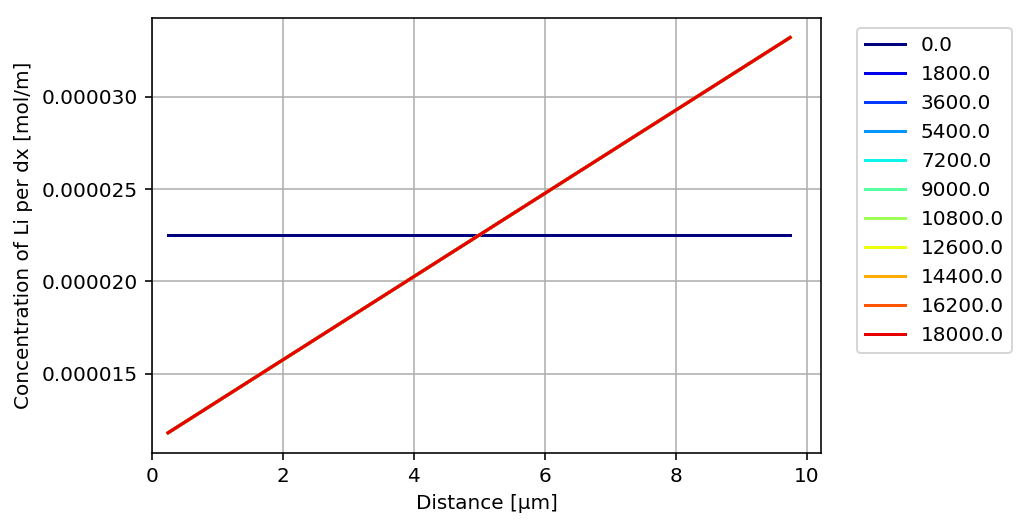

In [0]:
tt=(t_total-dt)/10#[sec] delta time for plot
for ii in range(len(time_rlt[time_rlt % tt == 0])):
    plt.plot(x_rlt[time_rlt % tt == 0][ii]*1E6,C_rlt[time_rlt % tt == 0][ii], label = time_rlt[time_rlt % tt == 0][ii],color=cm.jet(ii/len(time_rlt[time_rlt % tt == 0])))
plt.legend(loc='upper right',
           bbox_to_anchor=(0.9, 0.9, 0.4, .100))
plt.ylabel('Concentration of Li per dx [mol/m]')
plt.xlabel('Distance [μm]')
plt.gca().set_xlim(left=0)
plt.grid()
plt.show()

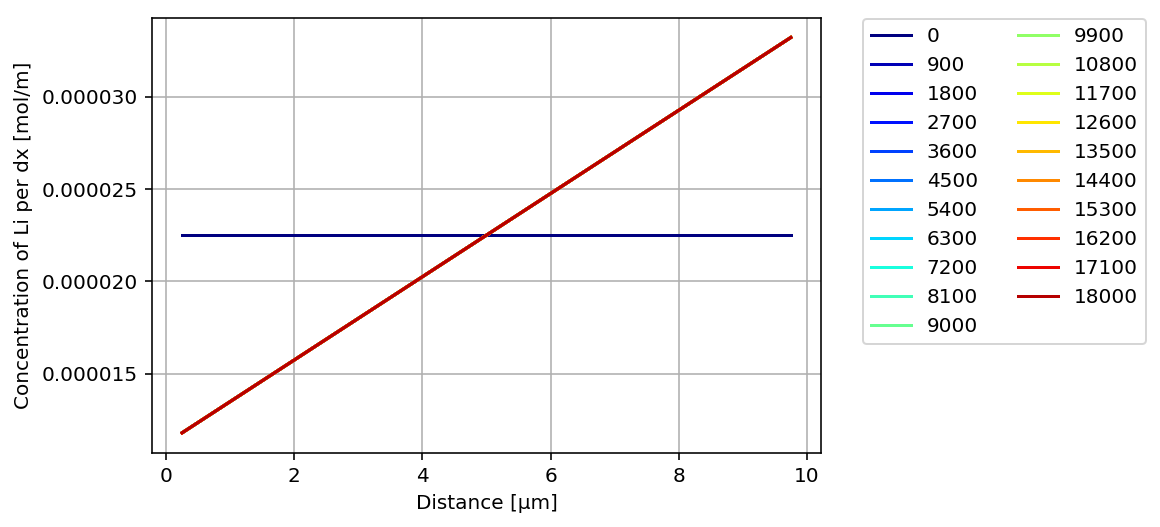

In [0]:
plot_max_time = t_total#[sec]
plot_delta_time = int(plot_max_time/20)#[sec]
for ii in range(int(plot_max_time/plot_delta_time)+1):
    plt.plot(x_rlt[int(plot_delta_time/dt)*ii][:]*1E6, C_rlt[int(plot_delta_time/dt)*ii][:],color=cm.jet(ii/(int(plot_max_time/plot_delta_time)+1)), label=plot_delta_time*ii)
plt.ylabel('Concentration of Li per dx [mol/m]')
plt.xlabel('Distance [μm]')
plt.legend(loc='upper right',
           bbox_to_anchor=(1.1, 0.92, 0.4, .100),ncol=2)
plt.grid()
plt.show()

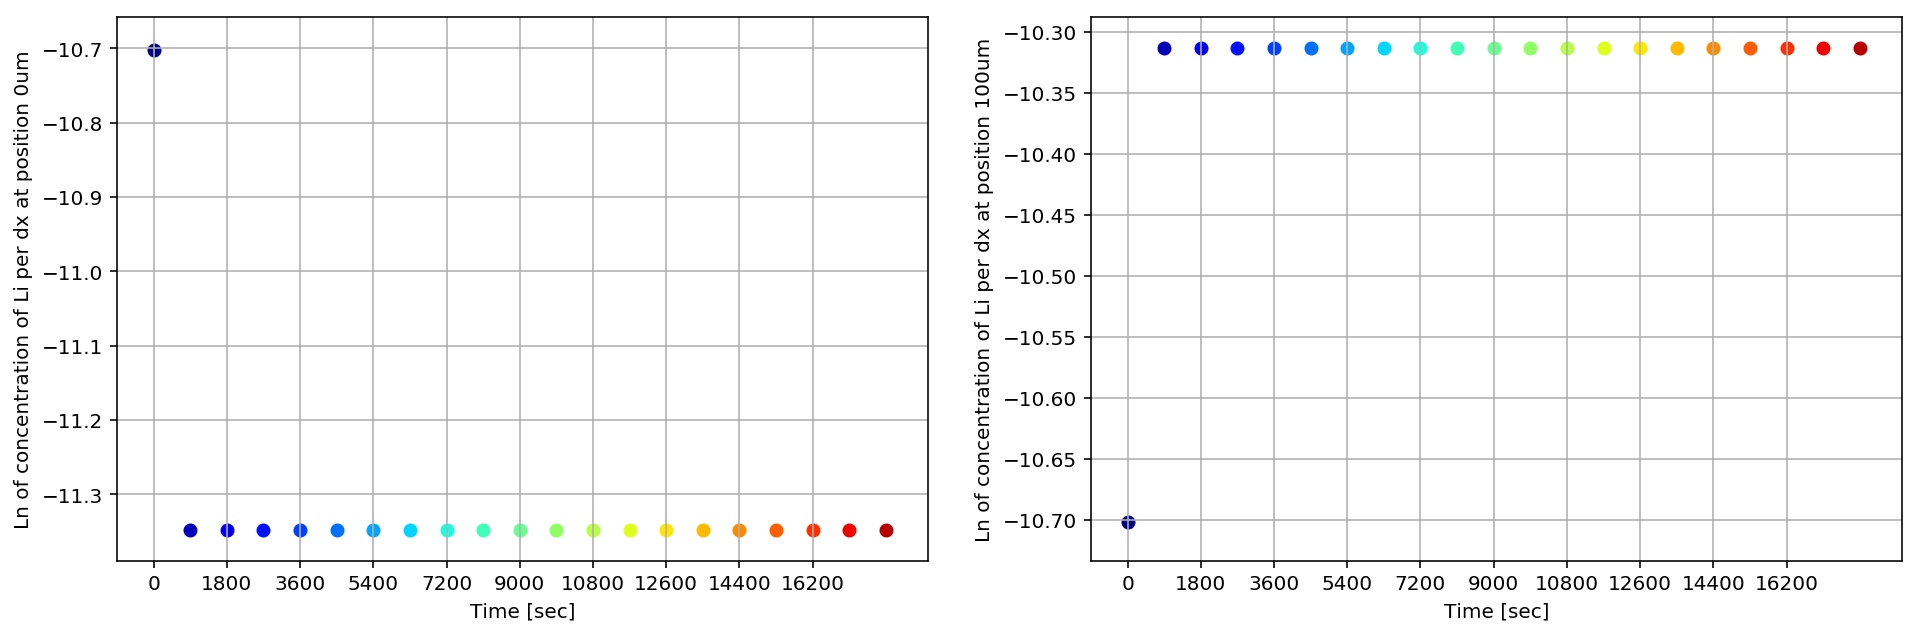

In [0]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16,5))

for ii in range(int(plot_max_time/plot_delta_time)+1):
    ax1.scatter(time_rlt[int(plot_delta_time/dt)*ii], np.log(C_rlt[int(plot_delta_time/dt)*ii][0]),color=cm.jet(ii/(int(plot_max_time/plot_delta_time)+1)), label='Average')
    ax2.scatter(time_rlt[int(plot_delta_time/dt)*ii], np.log(C_rlt[int(plot_delta_time/dt)*ii][19]),color=cm.jet(ii/(int(plot_max_time/plot_delta_time)+1)), label='Average')
ax1.grid()
ax1.set_xlabel('Time [sec]')
ax1.set_ylabel('Ln of concentration of Li per dx at position 0um')
ax1.xaxis.set_ticks(np.arange(0, plot_max_time, plot_max_time/10))
ax2.grid()
ax2.set_xlabel('Time [sec]')
ax2.set_ylabel('Ln of concentration of Li per dx at position 100um')
ax2.xaxis.set_ticks(np.arange(0, plot_max_time, plot_max_time/10))
plt.show()

for ii in range(50):
    plt.plot(x_rlt[72*ii][:]*1E6, C_rlt[72*ii][:],color=cm.jet(ii/50), label='Average')
plt.ylabel('Concentration of Li per dx [mol/m]')
plt.xlabel('Distance [μm]')
plt.grid()
plt.show()

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16,5))

for ii in range(50):
    ax1.scatter(time_rlt[72*ii], np.log(C_rlt[72*ii][0]),color=cm.jet(ii/50), label='Average')
    ax2.scatter(time_rlt[72*ii], np.log(C_rlt[72*ii][19]),color=cm.jet(ii/50), label='Average')
ax1.grid()
ax1.set_xlabel('Time [sec]')
ax1.set_ylabel('Ln of concentration of Li per dx at position 0um')
ax1.xaxis.set_ticks(np.arange(0, 300, 60))
ax2.grid()
ax2.set_xlabel('Time [sec]')
ax2.set_ylabel('Ln of concentration of Li per dx at position 100um')
ax2.xaxis.set_ticks(np.arange(0, 300, 60))
plt.show()

## Concentraion overpotential in electrolyte
\begin{eqnarray*}
\frac{2RT}{F}(0.5-t_+)(\ln{c_{e,k}}(x) -\ln{c_{e,k}}(x=0))
\end{eqnarray*}

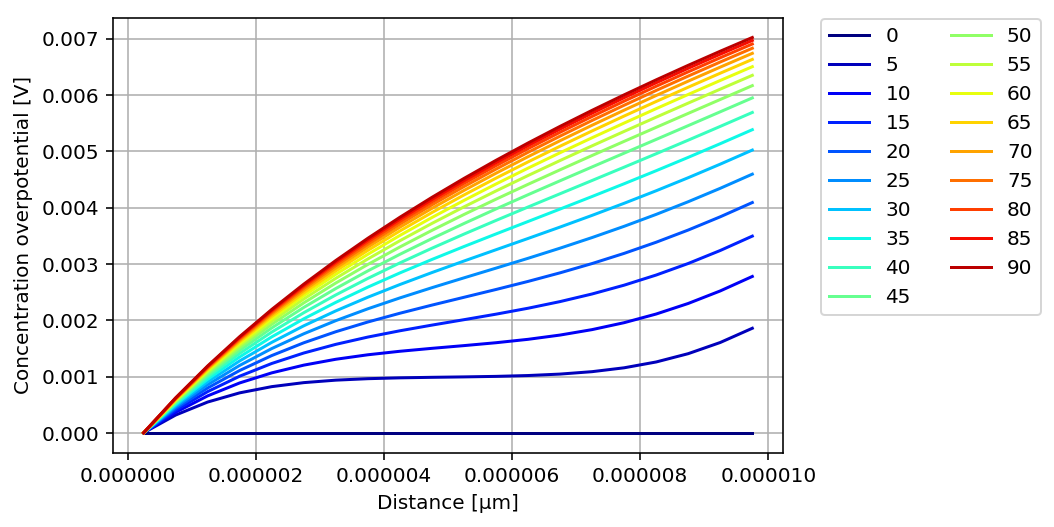

In [0]:
plot_max_time = 90 #[sec]
plot_delta_time = 5 #[sec]

for ii in range(int(plot_max_time/plot_delta_time)+1):
    plt.plot(x_rlt[int(plot_delta_time/dt)*ii][:], 2*R*T/F*(0.5-t_plus)*(np.log(C_rlt[int(plot_delta_time/dt)*ii][:])-np.log(C_rlt[int(plot_delta_time/dt)*ii][0])),color=cm.jet(ii/(int(plot_max_time/plot_delta_time)+1)), label=plot_delta_time*ii)
plt.ylabel('Concentration overpotential [V]')
plt.xlabel('Distance [μm]')
plt.legend(loc='upper right',
           bbox_to_anchor=(1, 0.92, 0.4, .100),ncol=2)
plt.grid()
plt.show()

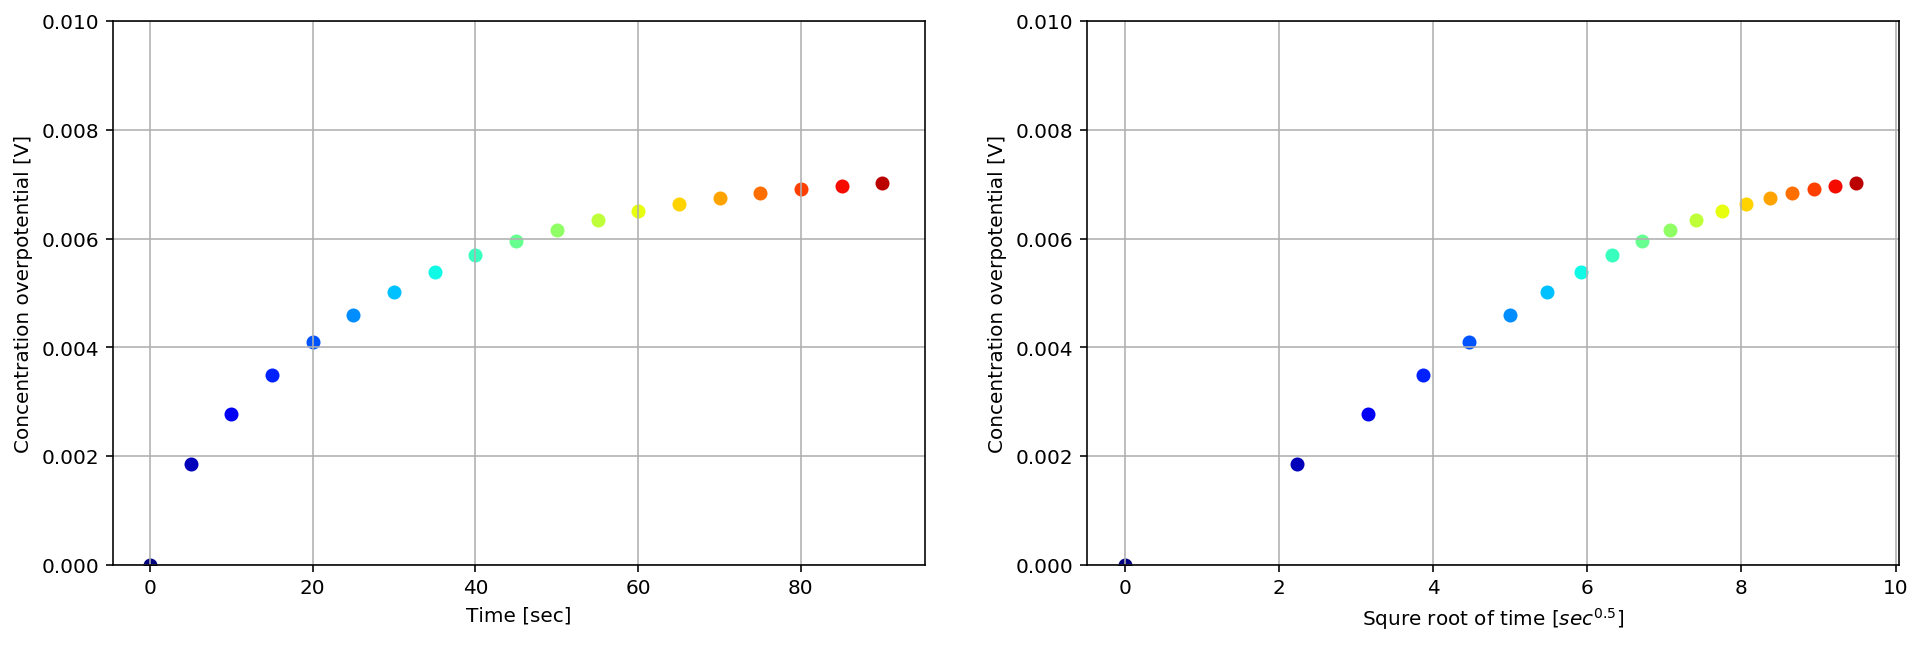

In [0]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (16,5))

for ii in range(int(plot_max_time/plot_delta_time)+1):
    ax1.scatter(time_rlt[int(plot_delta_time/dt)*ii], 2*R*T/F*(0.5-t_plus)*(np.log(C_rlt[int(plot_delta_time/dt)*ii][19])-np.log(C_rlt[int(plot_delta_time/dt)*ii][0])),color=cm.jet(ii/(int(plot_max_time/plot_delta_time)+1)), label='Average')
    ax2.scatter(np.sqrt(time_rlt[int(plot_delta_time/dt)*ii]), 2*R*T/F*(0.5-t_plus)*(np.log(C_rlt[int(plot_delta_time/dt)*ii][19])-np.log(C_rlt[int(plot_delta_time/dt)*ii][0])),color=cm.jet(ii/(int(plot_max_time/plot_delta_time)+1)), label='Average')

ax1.set_ylabel('Concentration overpotential [V]')
ax2.set_ylabel('Concentration overpotential [V]')
ax1.set_ylim(0,0.01)
ax2.set_ylim(0,0.01)
ax1.set_xlabel('Time [sec]')
ax2.set_xlabel('Squre root of time [$sec^{0.5}$]')
ax1.grid()
ax2.grid()
plt.show()

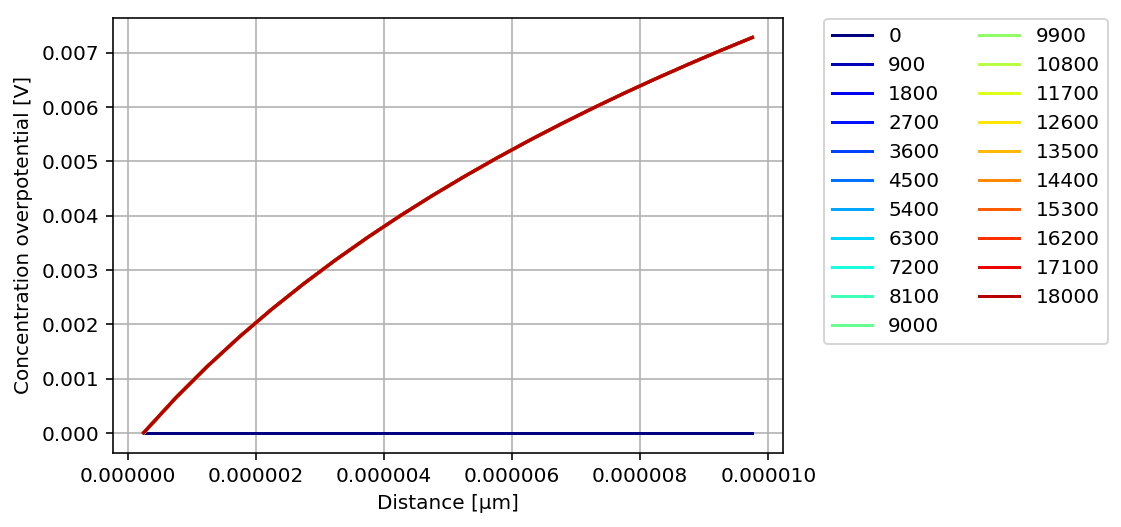

In [0]:
plot_max_time = 18000 #[sec]
plot_delta_time = 900 #[sec]

for ii in range(int(plot_max_time/plot_delta_time)+1):
    plt.plot(x_rlt[int(plot_delta_time/dt)*ii][:], 2*R*T/F*(0.5-t_plus)*(np.log(C_rlt[int(plot_delta_time/dt)*ii][:])-np.log(C_rlt[int(plot_delta_time/dt)*ii][0])),color=cm.jet(ii/(int(plot_max_time/plot_delta_time)+1)), label=plot_delta_time*ii)
plt.ylabel('Concentration overpotential [V]')
plt.xlabel('Distance [μm]')
plt.legend(loc='upper right',
           bbox_to_anchor=(1.1, 0.92, 0.4, .100),ncol=2)
plt.grid()
plt.show()

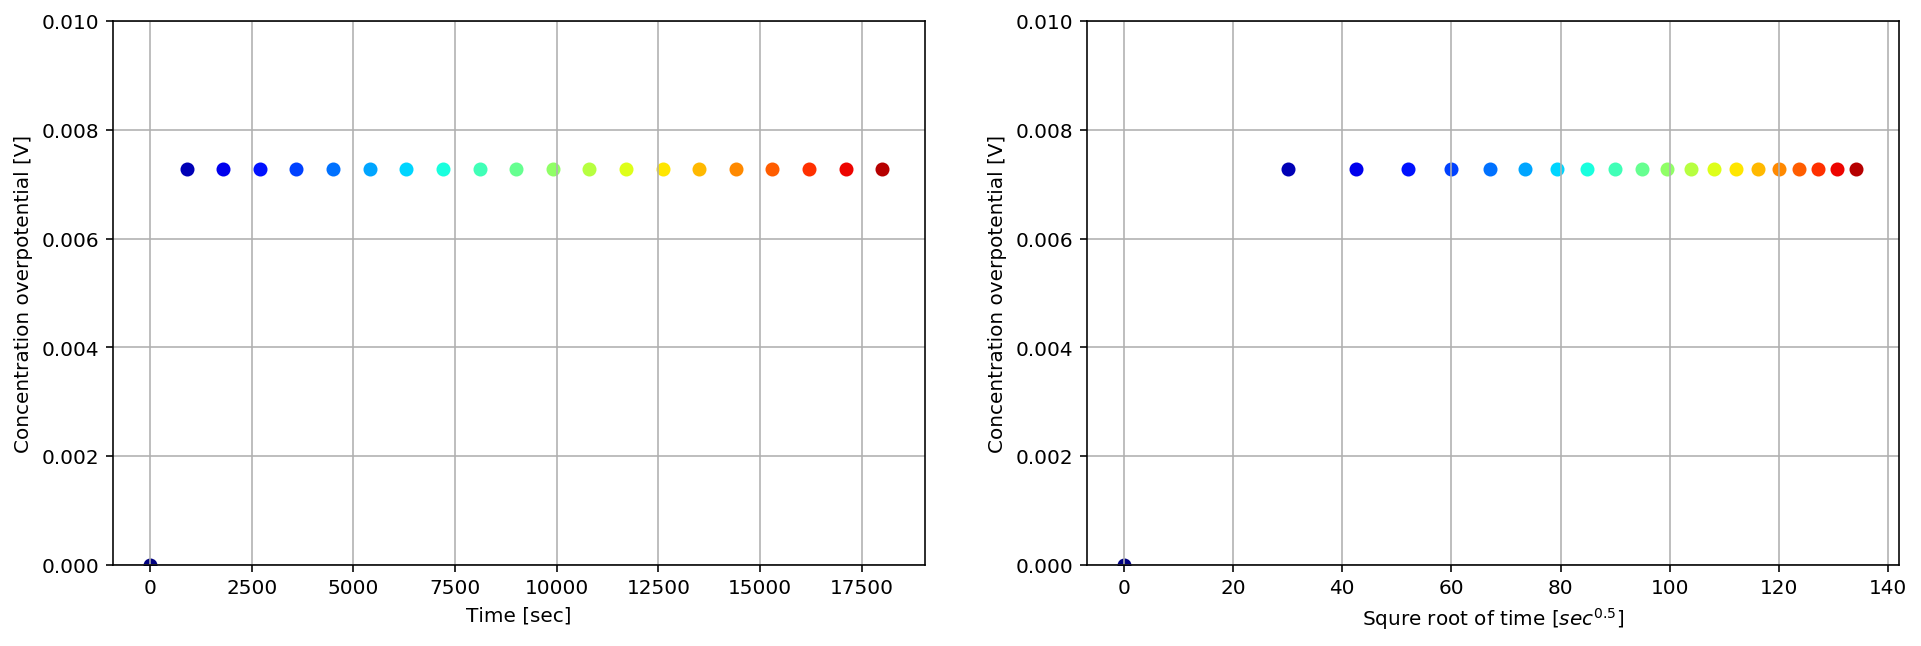

In [0]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (16,5))

for ii in range(int(plot_max_time/plot_delta_time)+1):
    ax1.scatter(time_rlt[int(plot_delta_time/dt)*ii], 2*R*T/F*(0.5-t_plus)*(np.log(C_rlt[int(plot_delta_time/dt)*ii][19])-np.log(C_rlt[int(plot_delta_time/dt)*ii][0])),color=cm.jet(ii/(int(plot_max_time/plot_delta_time)+1)), label='Average')
    ax2.scatter(np.sqrt(time_rlt[int(plot_delta_time/dt)*ii]), 2*R*T/F*(0.5-t_plus)*(np.log(C_rlt[int(plot_delta_time/dt)*ii][19])-np.log(C_rlt[int(plot_delta_time/dt)*ii][0])),color=cm.jet(ii/(int(plot_max_time/plot_delta_time)+1)), label='Average')

ax1.set_ylabel('Concentration overpotential [V]')
ax2.set_ylabel('Concentration overpotential [V]')
ax1.set_ylim(0,0.01)
ax2.set_ylim(0,0.01)
ax1.set_xlabel('Time [sec]')
ax2.set_xlabel('Squre root of time [$sec^{0.5}$]')
ax1.grid()
ax2.grid()
plt.show()

for ii in range(50):
    plt.plot(x_rlt[7200*ii][:], 2*R*T/F*(0.5-t_plus)*(np.log(C_rlt[7200*ii][:])-np.log(C_rlt[7200*ii][0])),color=cm.jet(ii/50), label='Average')
plt.ylabel('Concentration overpotential [V]')
plt.xlabel('Distance [μm]')
plt.grid()
plt.show()

for ii in range(50):
    plt.scatter(time_rlt[7200*ii]/60, 2*R*T/F*(0.5-t_plus)*(np.log(C_rlt[7200*ii][19])-np.log(C_rlt[7200*ii][0])),color=cm.jet(ii/50), label='Average')
plt.ylabel('Concentration overpotential [V]')
plt.ylim(0,0.05)
plt.xlabel('Time [min]')
plt.grid()
plt.show()

## Migration overpotential in electrolyte
\begin{eqnarray*}
\Phi_{e,k}(x,t)=-\frac{x}{\kappa_{eff,k}}\frac{t_+I}{S}
\end{eqnarray*}

\begin{eqnarray*}
\kappa_{eff,k}(x,t)=\epsilon_k^{brugg_k}[4.1253 \times 10^{-2}+5.007 \times 10^{-4}c_{e,k}(x,t)
-4.7212\times10^{-7}c_{e,k}^2(x,t)+1.5094\times10^{-10}c_{e,k}^3(x,t)-1.6018\times10^{-14}c_{e,k}^4(x,t)]
\end{eqnarray*}
unit of $\kappa_{eff,k}$ is [S/m]

In [0]:
def kappa_e(C_el,epsilon_e,brugg_e):
    return epsilon_e**brugg_e*(4.1253*1E-2 + 5.007*1E-4*C_el -4.7212*1E-7*C_el**2
                               + 1.5094*1E-10*C_el**3 - 1.6018*1E-14*C_el**4)

\begin{eqnarray*}
\kappa=0.0158c_e exp(0.85c_e^{1.4}) [S/cm]
\end{eqnarray*}
[K. Smith, C.-Y. Wang / Journal of Power Sources 161 (2006) 628–639]

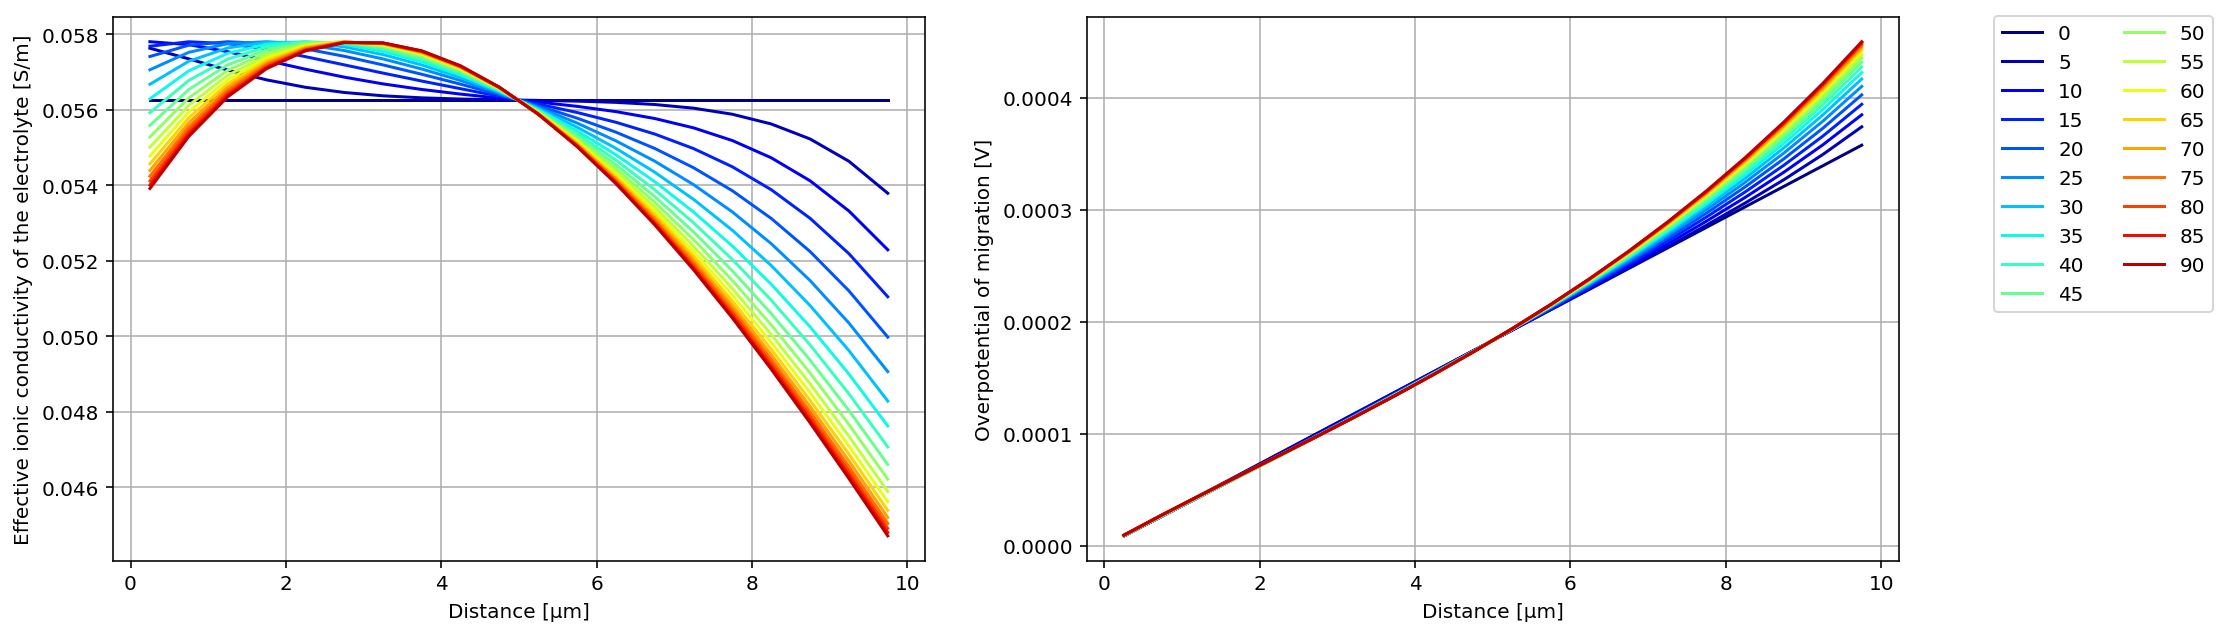

In [0]:
plot_max_time = 90 #[sec]
plot_delta_time = 5 #[sec]

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (16,5))

for ii in range(int(plot_max_time/plot_delta_time)+1):
    ax1.plot(x_rlt[int(plot_delta_time/dt)*ii][:]*1E6, kappa_e(C_rlt[int(plot_delta_time/dt)*ii][:]/S_el,epsilon_e,brugg_e),color=cm.jet(ii/(int(plot_max_time/plot_delta_time)+1)))
    ax2.plot(x_rlt[int(plot_delta_time/dt)*ii][:]*1E6, -x_rlt[int(plot_delta_time/dt)*ii][:]/kappa_e(C_rlt[int(plot_delta_time/dt)*ii][:]/S_el,epsilon_e,brugg_e)*t_plus*(-j_el),color=cm.jet(ii/(int(plot_max_time/plot_delta_time)+1)), label=plot_delta_time*ii)

ax1.set_ylabel('Effective ionic conductivity of the electrolyte [S/m]')
ax1.set_xlabel('Distance [μm]')
ax2.set_ylabel('Overpotential of migration [V]')
ax2.set_xlabel('Distance [μm]')
ax2.legend(loc='upper right',
           bbox_to_anchor=(1, 0.92, 0.4, .100),ncol=2)

ax1.grid()
ax2.grid()
plt.show()

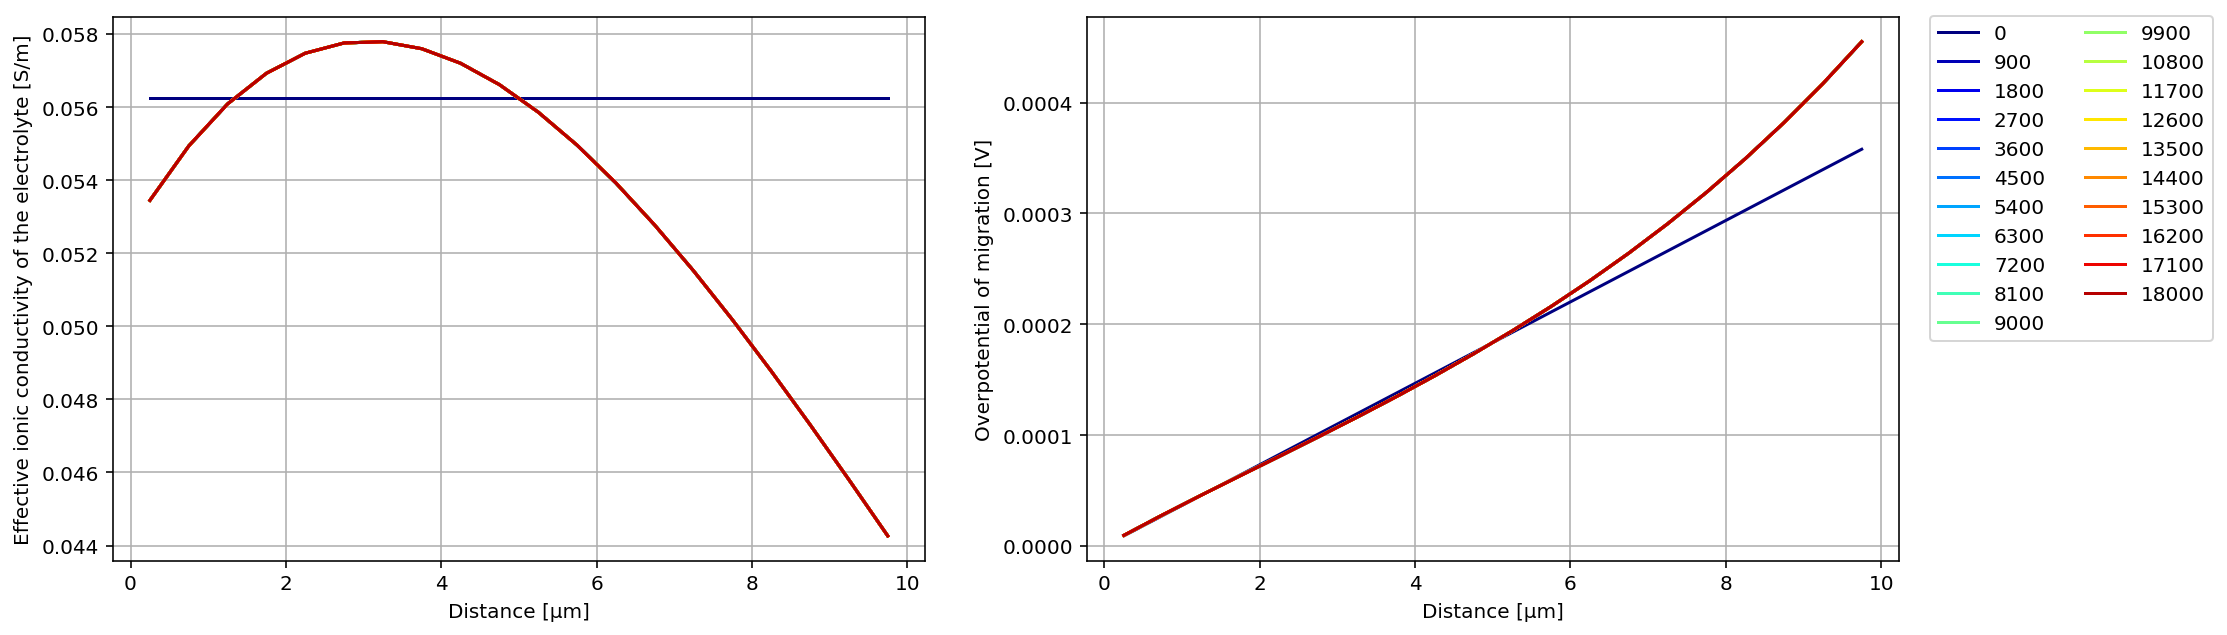

In [0]:
plot_max_time = 18000 #[sec]
plot_delta_time = 900 #[sec]

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (16,5))

for ii in range(int(plot_max_time/plot_delta_time)+1):
    ax1.plot(x_rlt[int(plot_delta_time/dt)*ii][:]*1E6, kappa_e(C_rlt[int(plot_delta_time/dt)*ii][:]/S_el,epsilon_e,brugg_e),color=cm.jet(ii/(int(plot_max_time/plot_delta_time)+1)))
    ax2.plot(x_rlt[int(plot_delta_time/dt)*ii][:]*1E6, -x_rlt[int(plot_delta_time/dt)*ii][:]/kappa_e(C_rlt[int(plot_delta_time/dt)*ii][:]/S_el,epsilon_e,brugg_e)*t_plus*(-j_el),color=cm.jet(ii/(int(plot_max_time/plot_delta_time)+1)), label=plot_delta_time*ii)

ax1.set_ylabel('Effective ionic conductivity of the electrolyte [S/m]')
ax1.set_xlabel('Distance [μm]')
ax2.set_ylabel('Overpotential of migration [V]')
ax2.set_xlabel('Distance [μm]')
ax2.legend(loc='upper right',
           bbox_to_anchor=(1, 0.92, 0.4, .100),ncol=2)

ax1.grid()
ax2.grid()
plt.show()

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (16,5))

for ii in range(50):
    ax1.plot(x_rlt[72*ii][:]*1E6, kappa_e(C_rlt[72*ii][:]/S_el,epsilon_e,brugg_e),color=cm.jet(ii/50), label='Average')
    ax2.plot(x_rlt[7200*ii][:]*1E6, kappa_e(C_rlt[7200*ii][:]/S_el,epsilon_e,brugg_e),color=cm.jet(ii/50), label='Average')

ax1.set_ylabel('Effective ionic conductivity of the electrolyte [S/m]')
ax1.set_xlabel('Distance [μm]')
ax2.set_ylabel('Effective ionic conductivity of the electrolyte [S/m]')
ax2.set_xlabel('Distance [μm]')

ax1.grid()
ax2.grid()
plt.show()

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (16,5))

for ii in range(50):
    ax1.plot(x_rlt[72*ii][:]*1E6, -x_rlt[72*ii][:]/kappa_e(C_rlt[72*ii][:]/S_el,epsilon_e,brugg_e)*t_plus*(-j_el),color=cm.jet(ii/50), label='Average')
    ax2.plot(x_rlt[7200*ii][:]*1E6, -x_rlt[7200*ii][:]/kappa_e(C_rlt[7200*ii][:]/S_el,epsilon_e,brugg_e)*t_plus*(-j_el),color=cm.jet(ii/50), label='Average')

ax1.set_ylabel('Overpotential of migration [V]')
ax1.set_xlabel('Distance [μm]')
ax2.set_ylabel('Overpotential of migration [V]')
ax2.set_xlabel('Distance [μm]')

ax1.grid()
ax2.grid()
plt.show()

## Overpotential by foil electronic resistance
\begin{eqnarray*}
\rho(T) = \rho_0[1+\alpha(T-T_0)]
\end{eqnarray*}

In [0]:
#resistivity at 294.15K (20deg.C)
rho_0_Al = 2.82E-8#[ohm m]
rho_0_Cu = 1.68E-8#[ohm m]
alpha_Al = 0.0039#[/K]
alpha_Cu = 0.003862#[/K]

In [0]:
#Overpotential by foil resistance
DV_Al = rho_0_Al * (1 + alpha_Al*(T - temp_0)) * L_Al / S_Al *I
DV_Cu = rho_0_Cu * (1 + alpha_Cu*(T - temp_0)) * L_Cu / S_Cu *I
print(DV_Al)
print(DV_Cu)

1.2118810880000004e-10
5.414409907200001e-11


In [0]:
df_sim['DV_Al (V)'] = rho_0_Al * (1 + alpha_Al*(T - temp_0)) * L_Al / S_Al *I
df_sim['DV_Cu (V)'] = rho_0_Cu * (1 + alpha_Cu*(T - temp_0)) * L_Cu / S_Cu *I

In [0]:
C_rlt[:len(df_sim),19]

array([  2.25000000e-05,   2.25845061e-05,   2.26626743e-05, ...,
         3.32041071e-05,   3.32041071e-05,   3.32041071e-05])

In [0]:
df_sim["C_el_p"] = C_rlt[:len(df_sim),0]/S_el
df_sim["C_el_n"] = C_rlt[:len(df_sim),19]/S_el
df_sim

,Time (sec),C_s_p_surface (mol/m3),C_s_n_surface (mol/m3),Cathode x of surface (-),Anode x of surface (-),Cathode current density (A/m2),Anode current density (A/m2),Cathode capacity (Ah),Anode capacity (Ah),DOD (%),...,j_0_n (A/m2),DV_eta_p (V),DV_eta_n (V),DV_el_conc_p (V),DV_el_conc_n (V),DV_el_mig_p (V),DV_el_mig_n (V),Cathode CCV (V),Anode CCV (V),Cell CCV (V)
0,0.00,4787.648000,13368.948882,0.200320,0.169631,1.28,1.28,0.000000e+00,0.000000e+00,0.000000,...,0.927477,0.042886,0.033101,0.000000,0.000000,0.000184,0.000184,4.507650,0.067246,4.440404
1,0.05,4788.311313,13368.252972,0.200348,0.169674,1.28,1.28,1.777778e-12,1.777778e-12,0.000351,...,0.929312,0.042950,0.033043,0.000026,0.000026,0.000184,0.000184,4.507560,0.067162,4.440398
2,0.10,4788.972968,13367.560867,0.200375,0.169717,1.28,1.28,3.555556e-12,3.555556e-12,0.000703,...,0.931012,0.043010,0.032990,0.000051,0.000051,0.000184,0.000184,4.507475,0.067084,4.440391
3,0.15,4789.632973,13366.872526,0.200403,0.169759,1.28,1.28,5.333333e-12,5.333333e-12,0.001054,...,0.932599,0.043065,0.032940,0.000074,0.000074,0.000184,0.000184,4.507397,0.067012,4.440385
4,0.20,4790.291336,13366.187908,0.200431,0.169802,1.28,1.28,7.111111e-12,7.111111e-12,0.001406,...,0.934089,0.043118,0.032894,0.000095,0.000095,0.000184,0.000184,4.507323,0.066944,4.440380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270343,13517.15,23476.034577,994.086164,0.982261,0.938256,1.28,1.28,4.806098e-07,4.806098e-07,95.016989,...,0.722570,0.106545,0.040996,0.003641,0.003641,0.000233,0.000233,3.816561,0.559762,3.256798
270344,13517.20,23476.100908,994.042669,0.982264,0.938258,1.28,1.28,4.806116e-07,4.806116e-07,95.017340,...,0.722555,0.106549,0.040997,0.003641,0.003641,0.000233,0.000233,3.816557,0.559763,3.256794
270345,13517.25,23476.167239,993.999175,0.982266,0.938261,1.28,1.28,4.806133e-07,4.806133e-07,95.017692,...,0.722540,0.106553,0.040997,0.003641,0.003641,0.000233,0.000233,3.816553,0.558521,3.258032
270346,13517.30,23476.233571,993.955681,0.982269,0.938264,1.28,1.28,4.806151e-07,4.806151e-07,95.018043,...,0.722526,0.106557,0.040998,0.003641,0.003641,0.000233,0.000233,3.816549,0.557279,3.259270


## Overpotential by Butler-volmer equation

\begin{eqnarray*}
j = j_0 \left( \exp \left[\frac{\alpha_a zF\eta}{RT}\right] - \exp \left[-\frac{\alpha_c zF\eta}{RT}\right]\right)\\
j_0 = zFk^o(C_e)^{\alpha_a}(C_{s,max}-C_s)^{\alpha_a}(C_s)^{\alpha_c}
\end{eqnarray*}

\begin{eqnarray*}
\eta = \frac{RT}{\alpha zF}ln\left(\frac{j}{2j_0} + \sqrt{\left(\frac{j}{2j_0}\right)^2 + 1} \right)
\end{eqnarray*}

In [0]:
df_sim.columns

Index(['Time (sec)', 'C_s_p_surface (mol/m3)', 'C_s_n_surface (mol/m3)',
       'Cathode x of surface (-)', 'Anode x of surface (-)',
       'Cathode current density (A/m2)', 'Anode current density (A/m2)',
       'Cathode capacity (Ah)', 'Anode capacity (Ah)', 'DOD (%)',
       'Cathode x (-)', 'Cathode OCV (V)', 'Anode x (-)', 'Anode OCV (V)',
       'Cell OCV (V)', 'Cathode surface OCV (V)', 'Anode surface OCV (V)',
       'DV_Al (V)', 'DV_Cu (V)', 'C_el_p', 'C_el_n', 'j_0_p (A/m2)',
       'j_0_n (A/m2)', 'DV_eta_p (V)', 'DV_eta_n (V)', 'DV_el_conc_p (V)',
       'DV_el_conc_n (V)', 'DV_el_mig_p (V)', 'DV_el_mig_n (V)',
       'Cathode CCV (V)', 'Anode CCV (V)', 'Cell CCV (V)'],
      dtype='object')

In [0]:
df_sim['j_0_p (A/m2)'] = z*F*k_o_p*df_sim['C_el_p']**alpha*(C_s_max_p - df_sim['C_s_p_surface (mol/m3)'])**alpha*(df_sim['C_s_p_surface (mol/m3)'])**alpha#[A/m2]
df_sim['j_0_n (A/m2)'] = z*F*k_o_n*df_sim['C_el_n']**alpha*(C_s_max_n - df_sim['C_s_n_surface (mol/m3)'])**alpha*(df_sim['C_s_n_surface (mol/m3)'])**alpha#[A/m2]
df_sim['DV_eta_p (V)'] = (R*T)/(alpha*z*F)*np.log(df_sim['Cathode current density (A/m2)']/(2*df_sim['j_0_p (A/m2)']) + ((df_sim['Cathode current density (A/m2)']/(2*df_sim['j_0_p (A/m2)']))**2 + 1)**0.5)
df_sim['DV_eta_n (V)'] = (R*T)/(alpha*z*F)*np.log(df_sim['Anode current density (A/m2)']/(2*df_sim['j_0_n (A/m2)']) + ((df_sim['Anode current density (A/m2)']/(2*df_sim['j_0_n (A/m2)']))**2 + 1)**0.5)

In [0]:
df_sim['DV_el_conc_p (V)'] = (2*R*T/F*(0.5-t_plus)*(np.log(C_rlt[:len(df_sim),19])-np.log(C_rlt[:len(df_sim),0])))/2
df_sim['DV_el_conc_n (V)'] = (2*R*T/F*(0.5-t_plus)*(np.log(C_rlt[:len(df_sim),19])-np.log(C_rlt[:len(df_sim),0])))/2

In [0]:
df_sim['DV_el_mig_p (V)'] = (-L_el/kappa_e(C_rlt[:len(df_sim),19]/S_el,epsilon_e,brugg_e)*t_plus*(-j_el))/2
df_sim['DV_el_mig_n (V)'] = (-L_el/kappa_e(C_rlt[:len(df_sim),19]/S_el,epsilon_e,brugg_e)*t_plus*(-j_el))/2

In [0]:
df_sim['Cathode CCV (V)'] = df_sim['Cathode surface OCV (V)']  - df_sim['DV_Al (V)'] - df_sim['DV_eta_p (V)'] - df_sim['DV_el_conc_p (V)'] - df_sim['DV_el_mig_p (V)']
df_sim['Anode CCV (V)'] = df_sim['Anode surface OCV (V)']  + df_sim['DV_Cu (V)'] + df_sim['DV_eta_n (V)'] - df_sim['DV_el_conc_n (V)'] - df_sim['DV_el_mig_n (V)']
df_sim['Cell CCV (V)'] = df_sim['Cathode CCV (V)'] - df_sim['Anode CCV (V)']
df_sim = df_sim.dropna()
df_sim

,Time (sec),C_s_p_surface (mol/m3),C_s_n_surface (mol/m3),Cathode x of surface (-),Anode x of surface (-),Cathode current density (A/m2),Anode current density (A/m2),Cathode capacity (Ah),Anode capacity (Ah),DOD (%),...,j_0_n (A/m2),DV_eta_p (V),DV_eta_n (V),DV_el_conc_p (V),DV_el_conc_n (V),DV_el_mig_p (V),DV_el_mig_n (V),Cathode CCV (V),Anode CCV (V),Cell CCV (V)
0,0.00,4787.648000,13368.948882,0.200320,0.169631,1.28,1.28,0.000000e+00,0.000000e+00,0.000000,...,0.927477,0.042886,0.033101,0.000000,0.000000,0.000184,0.000184,4.507650,0.067246,4.440404
1,0.05,4788.311313,13368.252972,0.200348,0.169674,1.28,1.28,1.777778e-12,1.777778e-12,0.000351,...,0.929312,0.042950,0.033043,0.000026,0.000026,0.000184,0.000184,4.507560,0.067162,4.440398
2,0.10,4788.972968,13367.560867,0.200375,0.169717,1.28,1.28,3.555556e-12,3.555556e-12,0.000703,...,0.931012,0.043010,0.032990,0.000051,0.000051,0.000184,0.000184,4.507475,0.067084,4.440391
3,0.15,4789.632973,13366.872526,0.200403,0.169759,1.28,1.28,5.333333e-12,5.333333e-12,0.001054,...,0.932599,0.043065,0.032940,0.000074,0.000074,0.000184,0.000184,4.507397,0.067012,4.440385
4,0.20,4790.291336,13366.187908,0.200431,0.169802,1.28,1.28,7.111111e-12,7.111111e-12,0.001406,...,0.934089,0.043118,0.032894,0.000095,0.000095,0.000184,0.000184,4.507323,0.066944,4.440380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270343,13517.15,23476.034577,994.086164,0.982261,0.938256,1.28,1.28,4.806098e-07,4.806098e-07,95.016989,...,0.722570,0.106545,0.040996,0.003641,0.003641,0.000233,0.000233,3.816561,0.559762,3.256798
270344,13517.20,23476.100908,994.042669,0.982264,0.938258,1.28,1.28,4.806116e-07,4.806116e-07,95.017340,...,0.722555,0.106549,0.040997,0.003641,0.003641,0.000233,0.000233,3.816557,0.559763,3.256794
270345,13517.25,23476.167239,993.999175,0.982266,0.938261,1.28,1.28,4.806133e-07,4.806133e-07,95.017692,...,0.722540,0.106553,0.040997,0.003641,0.003641,0.000233,0.000233,3.816553,0.558521,3.258032
270346,13517.30,23476.233571,993.955681,0.982269,0.938264,1.28,1.28,4.806151e-07,4.806151e-07,95.018043,...,0.722526,0.106557,0.040998,0.003641,0.003641,0.000233,0.000233,3.816549,0.557279,3.259270


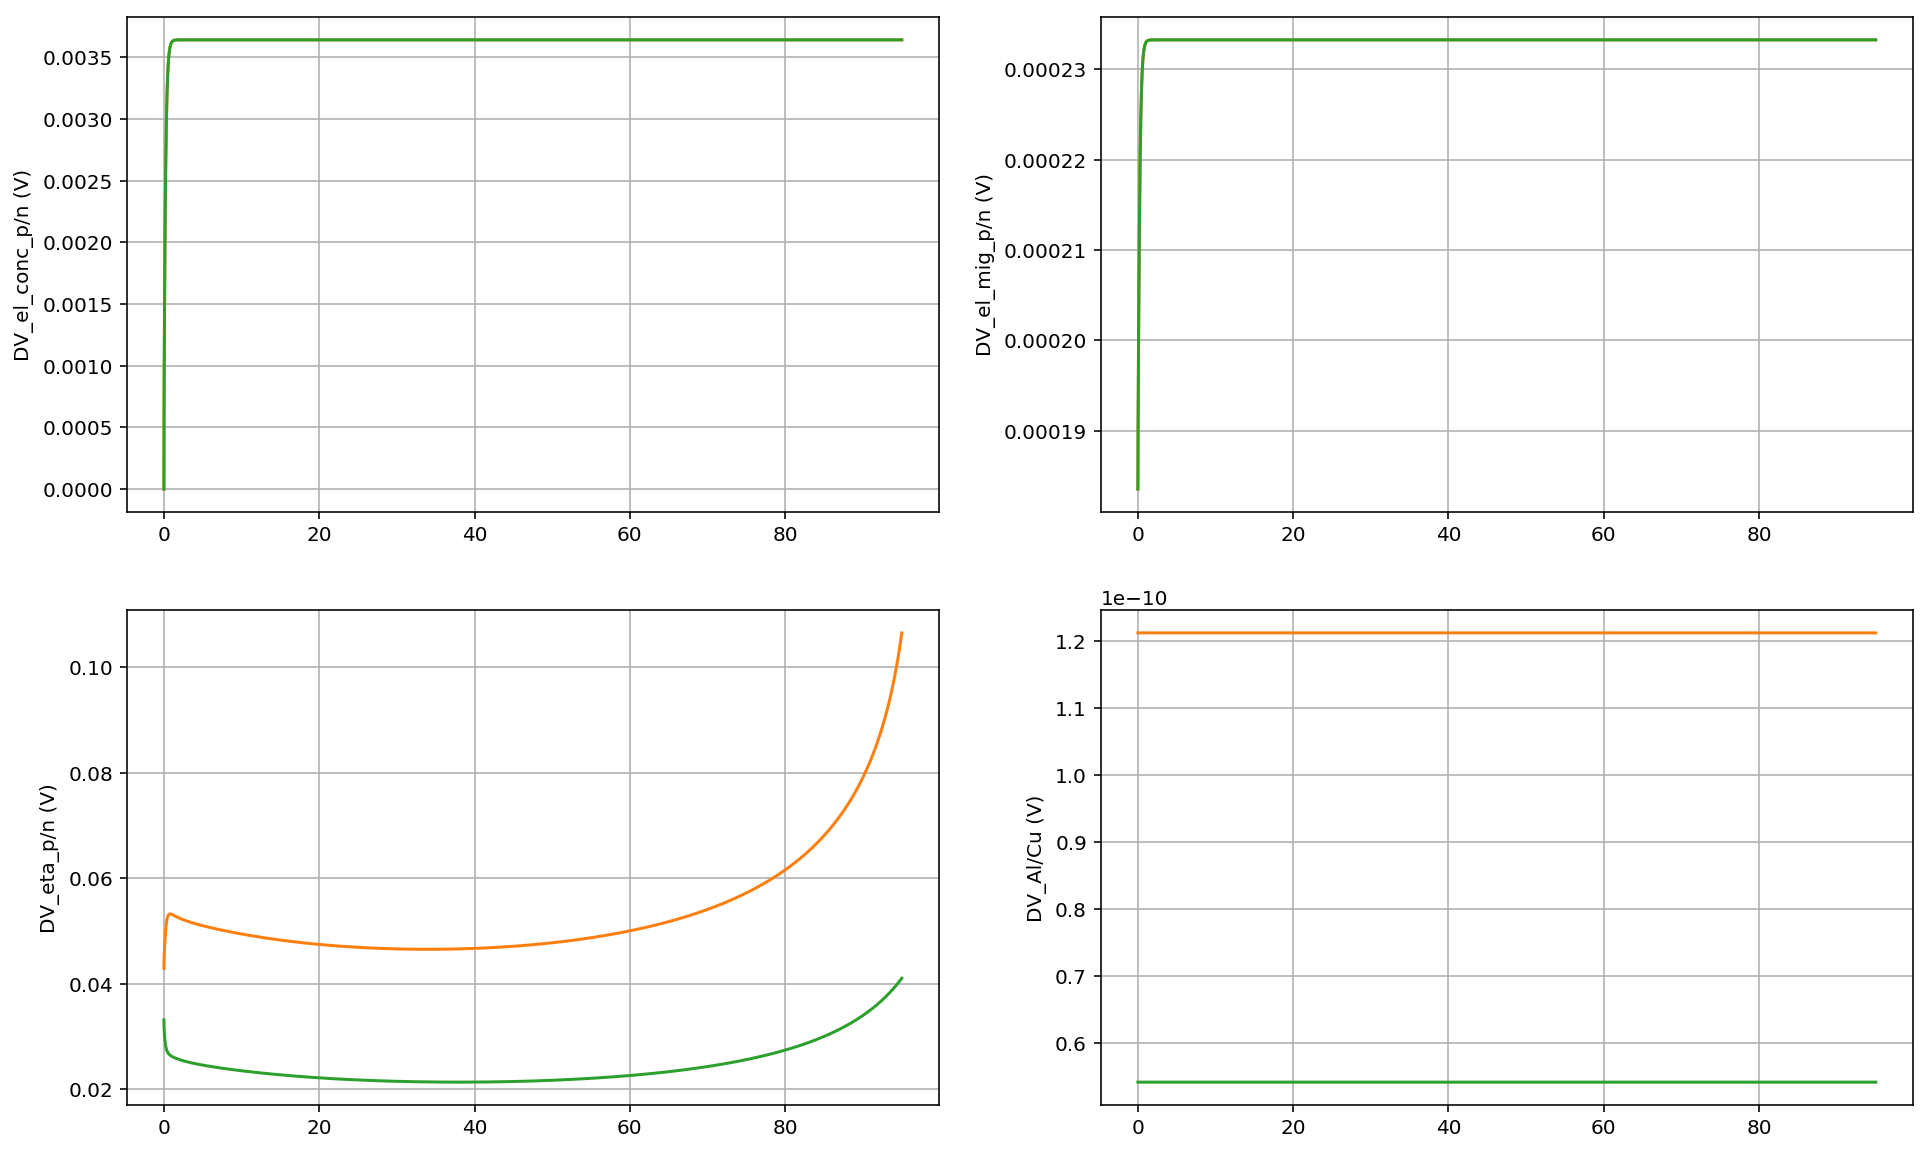

In [0]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (16,10))
ax1.plot(df_sim['DOD (%)'],df_sim['DV_el_conc_p (V)'],color = new_colors[1])
ax1.plot(df_sim['DOD (%)'],df_sim['DV_el_conc_n (V)'],color = new_colors[2])

ax2.plot(df_sim['DOD (%)'],df_sim['DV_el_mig_p (V)'],color = new_colors[1])
ax2.plot(df_sim['DOD (%)'],df_sim['DV_el_mig_n (V)'],color = new_colors[2])

ax3.plot(df_sim['DOD (%)'],df_sim['DV_eta_p (V)'],color = new_colors[1])
ax3.plot(df_sim['DOD (%)'],df_sim['DV_eta_n (V)'],color = new_colors[2])

ax4.plot(df_sim['DOD (%)'],df_sim['DV_Al (V)'],color = new_colors[1])
ax4.plot(df_sim['DOD (%)'],df_sim['DV_Cu (V)'],color = new_colors[2])

ax1.set_ylabel('DV_el_conc_p/n (V)')
ax2.set_ylabel('DV_el_mig_p/n (V)')
ax3.set_ylabel('DV_eta_p/n (V)')
ax4.set_ylabel('DV_Al/Cu (V)')

ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()

plt.show()

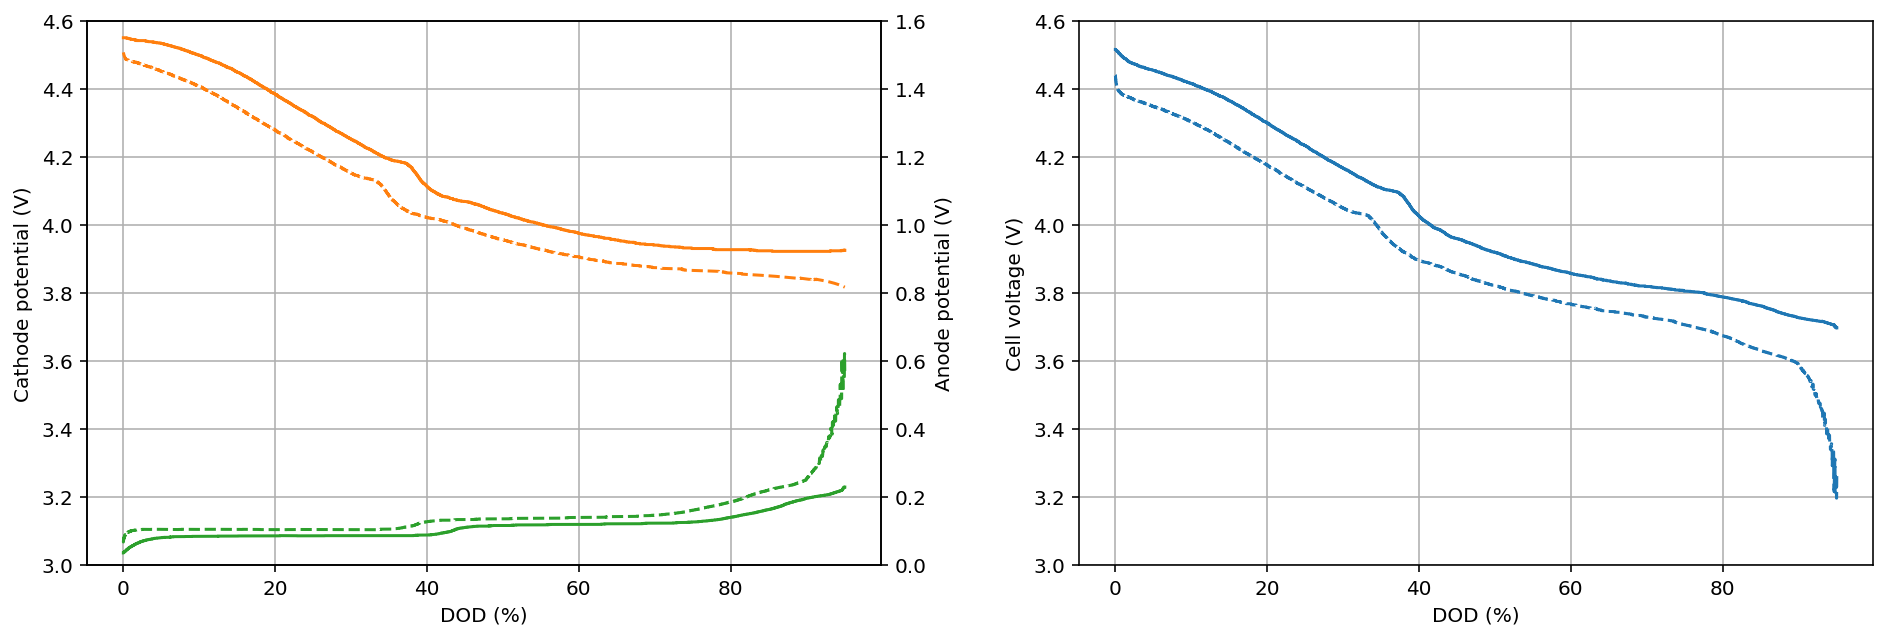

In [0]:
fig, (ax1,ax3) = plt.subplots(1,2,figsize=(16, 5))
plt.subplots_adjust(wspace=0.25)
ax2 = ax1.twinx()
ax1.plot(df_sim['DOD (%)'], df_sim['Cathode OCV (V)'], color = new_colors[1])
ax1.plot(df_sim['DOD (%)'], df_sim['Cathode CCV (V)'],'--', color = new_colors[1])
ax1.set_ylabel('Cathode potential (V)')
ax2.plot(df_sim['DOD (%)'], df_sim['Anode OCV (V)'], color = new_colors[2])
ax2.plot(df_sim['DOD (%)'], df_sim['Anode CCV (V)'],'--', color = new_colors[2])
ax2.set_ylabel('Anode potential (V)')
ax1.set_xlabel('DOD (%)')

ax1.set_ylim([3, 4.6])
ax2.set_ylim([0, 1.6])
ax1.grid()

ax3.plot(df_sim['DOD (%)'], df_sim['Cell OCV (V)'], color = new_colors[0])
ax3.plot(df_sim['DOD (%)'], df_sim['Cell CCV (V)'],'--', color = new_colors[0])
ax3.set_ylabel('Cell voltage (V)')
ax3.set_xlabel('DOD (%)')
ax3.set_ylim([3, 4.6])

ax3.grid()

plt.show()

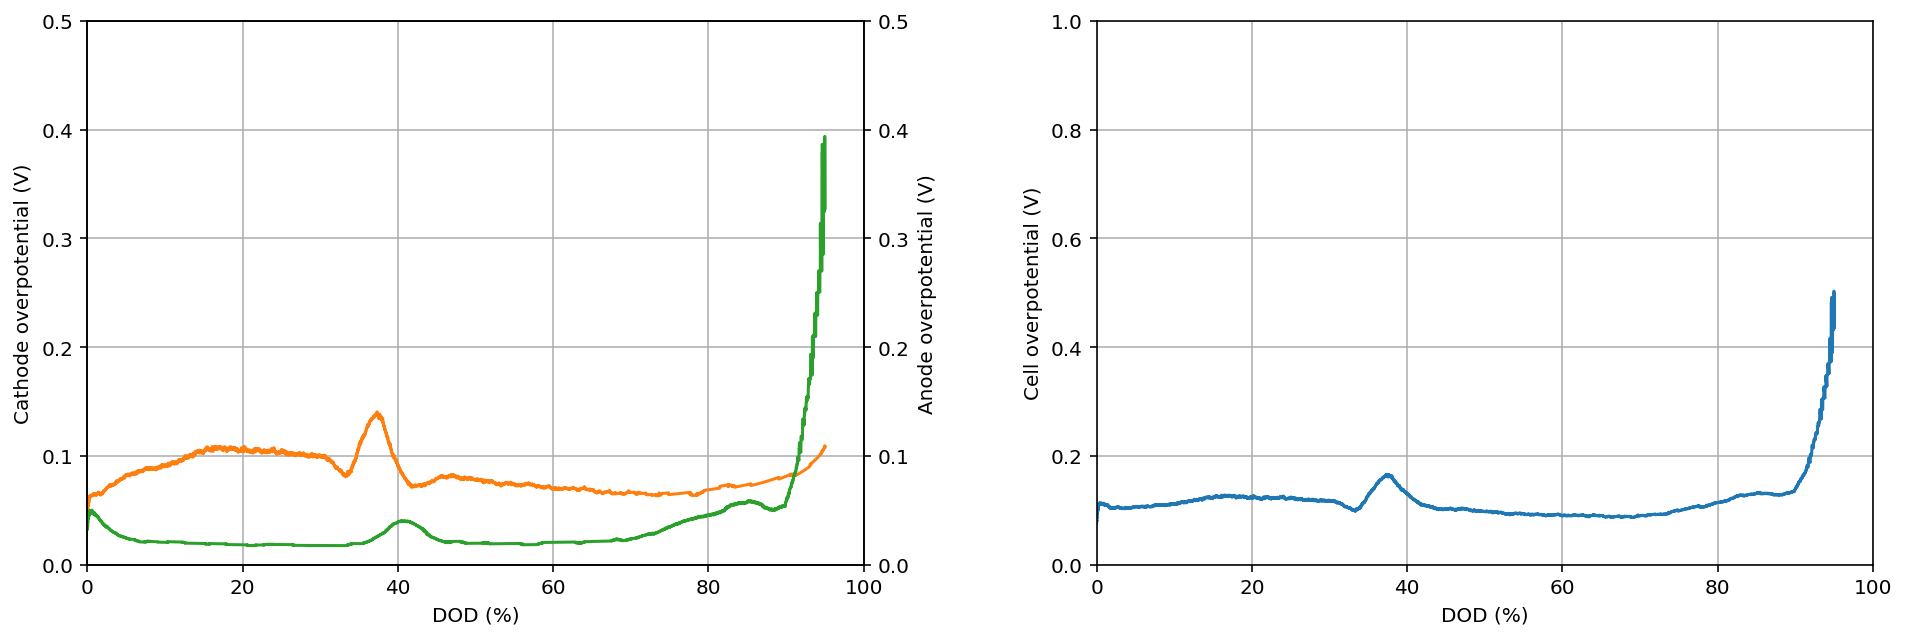

In [0]:
fig, (ax1,ax3) = plt.subplots(1,2,figsize=(16, 5))
plt.subplots_adjust(wspace=0.3)
ax2 = ax1.twinx()
ax1.plot(df_sim['DOD (%)'], (df_sim['Cathode OCV (V)'] - df_sim['Cathode CCV (V)']), color = new_colors[1])
ax1.set_ylabel('Cathode overpotential (V)')
ax2.plot(df_sim['DOD (%)'], (df_sim['Anode CCV (V)'] - df_sim['Anode OCV (V)']), color = new_colors[2])
ax2.set_ylabel('Anode overpotential (V)')
ax1.set_xlabel('DOD (%)')
ax1.set_ylim([0, 0.5])
ax2.set_ylim([0, 0.5])
ax1.set_xlim([0, 100])
ax1.grid()

ax3.plot(df_sim['DOD (%)'], (df_sim['Cell OCV (V)'] - df_sim['Cell CCV (V)']), color = new_colors[0])
ax3.set_ylabel('Cell overpotential (V)')
ax3.set_xlabel('DOD (%)')
ax3.set_ylim([0, 1.0])
ax3.set_xlim([0, 100])
ax3.grid()

plt.show()

## Appendix